In [1]:
import numpy as np
import pandas as pd
import h5py

In [2]:
file = 'C:/Users/CCheny/Documents/UC San Diego - Junction/Bioinformatics/MS2-Autoencoder/chemical_split_data.hdf5'
f = h5py.File(file, 'r')
dataset_low = f['low_peaks']
dataset_high = f['high_peaks']
print(dataset_low.shape)
print(dataset_high.shape)

(110881, 2000)
(110881, 2000)


In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [19]:
def generator(X_data, y_data, batch_size):
    print('generator initiated')
    steps_per_epoch = X_data.shape[0]
    number_of_batches = steps_per_epoch // batch_size
    i = 0
    
    while True:
        X_batch = dataset_low[i*batch_size:(i+1)*batch_size]
        y_batch = dataset_high[i*batch_size:(i+1)*batch_size]
        i += 1
        yield X_batch, y_batch
        print('\ngenerator yielded a batch %s' %i)
        
        if i >= number_of_batches:
            i = 0

In [6]:
input_size = 2000
encoding_dim = 100

input_scan = Input(shape=(input_size, ))
hidden_1 = Dense(1000, activation='relu')(input_scan) #encoded is the encoded representation of the input
hidden_2 = Dense(500, activation='relu')(hidden_1)
encoded = Dense(encoding_dim, activation='relu')(hidden_2)
hidden_3 = Dense(500, activation='relu')(encoded)
hidden_4 = Dense(1000, activation='relu')(hidden_3)
decoded = Dense(input_size, activation='relu')(hidden_4) #decoded is the reconstruction of the input

autoencoder = Model(input_scan, decoded) #this model maps an input to its reconstructions

In [7]:
autoencoder.compile(optimizer='adadelta', loss='cosine_proximity', metrics=['accuracy'])

In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              2002

In [20]:
batch_size = 100
autoencoder.fit_generator(generator=generator(dataset_low, dataset_high, batch_size), 
                          max_queue_size=10, 
                          steps_per_epoch=dataset_low.shape[0] // batch_size, 
                          epochs=50)

generator initiated

generator yielded a batch 1

generator yielded a batch 2

generator yielded a batch 3

generator yielded a batch 4

generator yielded a batch 5

generator yielded a batch 6

generator yielded a batch 7

generator yielded a batch 8

generator yielded a batch 9

generator yielded a batch 10
Epoch 1/50

generator yielded a batch 11
   1/1108 [..............................] - ETA: 34s - loss: -0.4179 - accuracy: 0.2900
generator yielded a batch 12

generator yielded a batch 13
   3/1108 [..............................] - ETA: 34s - loss: -0.3630 - accuracy: 0.1567
generator yielded a batch 14

generator yielded a batch 15
   5/1108 [..............................] - ETA: 34s - loss: -0.4190 - accuracy: 0.2200
generator yielded a batch 16

generator yielded a batch 17
   7/1108 [..............................] - ETA: 36s - loss: -0.4743 - accuracy: 0.2643
generator yielded a batch 18

generator yielded a batch 19
   9/1108 [..............................] - ETA: 36s - 

 107/1108 [=>............................] - ETA: 33s - loss: -0.6101 - accuracy: 0.5086
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 33s - loss: -0.6086 - accuracy: 0.5070
generator yielded a batch 120

generator yielded a batch 121
 111/1108 [==>...........................] - ETA: 33s - loss: -0.6072 - accuracy: 0.5050
generator yielded a batch 122

generator yielded a batch 123
 113/1108 [==>...........................] - ETA: 33s - loss: -0.6062 - accuracy: 0.5042
generator yielded a batch 124

generator yielded a batch 125
 115/1108 [==>...........................] - ETA: 33s - loss: -0.6040 - accuracy: 0.5032
generator yielded a batch 126

generator yielded a batch 127
 117/1108 [==>...........................] - ETA: 32s - loss: -0.6031 - accuracy: 0.5017
generator yielded a batch 128

generator yielded a batch 129
 119/1108 [==>...........................] - ETA: 32s - loss: -0.6024 - accuracy: 0.4993
generator y

 217/1108 [====>.........................] - ETA: 29s - loss: -0.5624 - accuracy: 0.4650
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 29s - loss: -0.5612 - accuracy: 0.4623
generator yielded a batch 230

generator yielded a batch 231
 221/1108 [====>.........................] - ETA: 29s - loss: -0.5615 - accuracy: 0.4618
generator yielded a batch 232

generator yielded a batch 233
 223/1108 [=====>........................] - ETA: 29s - loss: -0.5607 - accuracy: 0.4613
generator yielded a batch 234

generator yielded a batch 235
 225/1108 [=====>........................] - ETA: 29s - loss: -0.5612 - accuracy: 0.4619
generator yielded a batch 236

generator yielded a batch 237
 227/1108 [=====>........................] - ETA: 29s - loss: -0.5619 - accuracy: 0.4614
generator yielded a batch 238

generator yielded a batch 239
 229/1108 [=====>........................] - ETA: 29s - loss: -0.5626 - accuracy: 0.4618
generator y

 327/1108 [=======>......................] - ETA: 25s - loss: -0.5219 - accuracy: 0.4144
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 25s - loss: -0.5187 - accuracy: 0.4119
generator yielded a batch 340

generator yielded a batch 341
 331/1108 [=======>......................] - ETA: 25s - loss: -0.5156 - accuracy: 0.4094
generator yielded a batch 342

generator yielded a batch 343
 333/1108 [========>.....................] - ETA: 25s - loss: -0.5125 - accuracy: 0.4070
generator yielded a batch 344

generator yielded a batch 345
 335/1108 [========>.....................] - ETA: 25s - loss: -0.5094 - accuracy: 0.4045
generator yielded a batch 346

generator yielded a batch 347
 337/1108 [========>.....................] - ETA: 25s - loss: -0.5064 - accuracy: 0.4021
generator yielded a batch 348

generator yielded a batch 349
 339/1108 [========>.....................] - ETA: 25s - loss: -0.5034 - accuracy: 0.3998
generator y

 437/1108 [==========>...................] - ETA: 22s - loss: -0.3905 - accuracy: 0.3101
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 22s - loss: -0.3887 - accuracy: 0.3087
generator yielded a batch 450

generator yielded a batch 451
 441/1108 [==========>...................] - ETA: 22s - loss: -0.3870 - accuracy: 0.3073
generator yielded a batch 452

generator yielded a batch 453
 443/1108 [==========>...................] - ETA: 22s - loss: -0.3852 - accuracy: 0.3059
generator yielded a batch 454

generator yielded a batch 455
 445/1108 [===========>..................] - ETA: 22s - loss: -0.3835 - accuracy: 0.3045
generator yielded a batch 456

generator yielded a batch 457
 447/1108 [===========>..................] - ETA: 21s - loss: -0.3818 - accuracy: 0.3032
generator yielded a batch 458

generator yielded a batch 459
 449/1108 [===========>..................] - ETA: 21s - loss: -0.3801 - accuracy: 0.3018
generator y

 547/1108 [=============>................] - ETA: 18s - loss: -0.3120 - accuracy: 0.2478
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3109 - accuracy: 0.2468
generator yielded a batch 560

generator yielded a batch 561
 551/1108 [=============>................] - ETA: 18s - loss: -0.3097 - accuracy: 0.2460
generator yielded a batch 562

generator yielded a batch 563
 553/1108 [=============>................] - ETA: 18s - loss: -0.3086 - accuracy: 0.2451
generator yielded a batch 564

generator yielded a batch 565
 555/1108 [==============>...............] - ETA: 18s - loss: -0.3075 - accuracy: 0.2442
generator yielded a batch 566

generator yielded a batch 567
 557/1108 [==============>...............] - ETA: 18s - loss: -0.3064 - accuracy: 0.2433
generator yielded a batch 568

generator yielded a batch 569
 559/1108 [==============>...............] - ETA: 18s - loss: -0.3053 - accuracy: 0.2424
generator y

 657/1108 [================>.............] - ETA: 14s - loss: -0.2598 - accuracy: 0.2063
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 14s - loss: -0.2590 - accuracy: 0.2056
generator yielded a batch 670

generator yielded a batch 671
 661/1108 [================>.............] - ETA: 14s - loss: -0.2582 - accuracy: 0.2050
generator yielded a batch 672

generator yielded a batch 673
 663/1108 [================>.............] - ETA: 14s - loss: -0.2574 - accuracy: 0.2044
generator yielded a batch 674

generator yielded a batch 675
 665/1108 [=================>............] - ETA: 14s - loss: -0.2566 - accuracy: 0.2038
generator yielded a batch 676

generator yielded a batch 677
 667/1108 [=================>............] - ETA: 14s - loss: -0.2559 - accuracy: 0.2032
generator yielded a batch 678

generator yielded a batch 679
 669/1108 [=================>............] - ETA: 14s - loss: -0.2551 - accuracy: 0.2026
generator y

 767/1108 [===================>..........] - ETA: 11s - loss: -0.2225 - accuracy: 0.1767
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2219 - accuracy: 0.1762
generator yielded a batch 780

generator yielded a batch 781
 771/1108 [===================>..........] - ETA: 11s - loss: -0.2213 - accuracy: 0.1758
generator yielded a batch 782

generator yielded a batch 783
 773/1108 [===================>..........] - ETA: 11s - loss: -0.2208 - accuracy: 0.1753
generator yielded a batch 784

generator yielded a batch 785
 775/1108 [===================>..........] - ETA: 11s - loss: -0.2202 - accuracy: 0.1749
generator yielded a batch 786

generator yielded a batch 787
 777/1108 [====================>.........] - ETA: 11s - loss: -0.2196 - accuracy: 0.1744
generator yielded a batch 788

generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 10s - loss: -0.2191 - accuracy: 0.1740
generator y

 877/1108 [======================>.......] - ETA: 7s - loss: -0.1946 - accuracy: 0.1545
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.1942 - accuracy: 0.1542
generator yielded a batch 890

generator yielded a batch 891
 881/1108 [======================>.......] - ETA: 7s - loss: -0.1937 - accuracy: 0.1538
generator yielded a batch 892

generator yielded a batch 893
 883/1108 [======================>.......] - ETA: 7s - loss: -0.1933 - accuracy: 0.1535
generator yielded a batch 894

generator yielded a batch 895
 885/1108 [======================>.......] - ETA: 7s - loss: -0.1928 - accuracy: 0.1531
generator yielded a batch 896

generator yielded a batch 897
 887/1108 [=======================>......] - ETA: 7s - loss: -0.1924 - accuracy: 0.1528
generator yielded a batch 898

generator yielded a batch 899
 889/1108 [=======================>......] - ETA: 7s - loss: -0.1920 - accuracy: 0.1524
generator yielded 

 987/1108 [=========================>....] - ETA: 4s - loss: -0.1729 - accuracy: 0.1373
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.1726 - accuracy: 0.1370
generator yielded a batch 1000

generator yielded a batch 1001
 991/1108 [=========================>....] - ETA: 3s - loss: -0.1722 - accuracy: 0.1368
generator yielded a batch 1002

generator yielded a batch 1003
 993/1108 [=========================>....] - ETA: 3s - loss: -0.1719 - accuracy: 0.1365
generator yielded a batch 1004

generator yielded a batch 1005
 995/1108 [=========================>....] - ETA: 3s - loss: -0.1715 - accuracy: 0.1362
generator yielded a batch 1006

generator yielded a batch 1007
 997/1108 [=========================>....] - ETA: 3s - loss: -0.1712 - accuracy: 0.1359
generator yielded a batch 1008

generator yielded a batch 1009
 999/1108 [==========================>...] - ETA: 3s - loss: -0.1708 - accuracy: 0.1357
generato

  97/1108 [=>............................] - ETA: 33s - loss: -0.6312 - accuracy: 0.5393
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.6315 - accuracy: 0.5404
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.6289 - accuracy: 0.5369
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.6258 - accuracy: 0.5349
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 33s - loss: -0.6232 - accuracy: 0.5304
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 33s - loss: -0.6208 - accuracy: 0.5293
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 32s - loss: -0.6192 - accuracy: 0.5280
generator y

 207/1108 [====>.........................] - ETA: 29s - loss: -0.5725 - accuracy: 0.4826
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.5736 - accuracy: 0.4842
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 29s - loss: -0.5738 - accuracy: 0.4840
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.5743 - accuracy: 0.4829
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.5740 - accuracy: 0.4833
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 29s - loss: -0.5731 - accuracy: 0.4812
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 29s - loss: -0.5721 - accuracy: 0.4789
generator y

 317/1108 [=======>......................] - ETA: 25s - loss: -0.5501 - accuracy: 0.4416
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 25s - loss: -0.5467 - accuracy: 0.4388
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 25s - loss: -0.5433 - accuracy: 0.4361
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 25s - loss: -0.5399 - accuracy: 0.4334
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 25s - loss: -0.5366 - accuracy: 0.4307
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 25s - loss: -0.5333 - accuracy: 0.4281
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 25s - loss: -0.5301 - accuracy: 0.4255
generator y

 427/1108 [==========>...................] - ETA: 22s - loss: -0.4084 - accuracy: 0.3278
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4065 - accuracy: 0.3263
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4046 - accuracy: 0.3248
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4028 - accuracy: 0.3233
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4009 - accuracy: 0.3218
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 22s - loss: -0.3991 - accuracy: 0.3203
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 21s - loss: -0.3972 - accuracy: 0.3189
generator y

 537/1108 [=============>................] - ETA: 18s - loss: -0.3248 - accuracy: 0.2607
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3235 - accuracy: 0.2597
generator yielded a batch 550

generator yielded a batch 551
 541/1108 [=============>................] - ETA: 18s - loss: -0.3224 - accuracy: 0.2588
generator yielded a batch 552

generator yielded a batch 553
 543/1108 [=============>................] - ETA: 18s - loss: -0.3212 - accuracy: 0.2578
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 18s - loss: -0.3200 - accuracy: 0.2569
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 18s - loss: -0.3188 - accuracy: 0.2559
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3177 - accuracy: 0.2550
generator y


generator yielded a batch 657
 647/1108 [================>.............] - ETA: 15s - loss: -0.2695 - accuracy: 0.2164
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 15s - loss: -0.2687 - accuracy: 0.2157
generator yielded a batch 660

generator yielded a batch 661
 651/1108 [================>.............] - ETA: 15s - loss: -0.2679 - accuracy: 0.2150
generator yielded a batch 662

generator yielded a batch 663
 653/1108 [================>.............] - ETA: 15s - loss: -0.2671 - accuracy: 0.2144
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 15s - loss: -0.2662 - accuracy: 0.2137
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 14s - loss: -0.2654 - accuracy: 0.2131
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 14s - loss: -0.2646

 865/1108 [======================>.......] - ETA: 8s - loss: -0.2016 - accuracy: 0.1618
generator yielded a batch 876

generator yielded a batch 877
 867/1108 [======================>.......] - ETA: 8s - loss: -0.2011 - accuracy: 0.1615
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2007 - accuracy: 0.1611
generator yielded a batch 880

generator yielded a batch 881
 871/1108 [======================>.......] - ETA: 7s - loss: -0.2002 - accuracy: 0.1607
generator yielded a batch 882

generator yielded a batch 883
 873/1108 [======================>.......] - ETA: 7s - loss: -0.1998 - accuracy: 0.1604
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.1993 - accuracy: 0.1600
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.1989 - accuracy: 0.1596
generator yielded 

1083/1108 [============================>.] - ETA: 0s - loss: -0.1610 - accuracy: 0.1293
generator yielded a batch 1094

generator yielded a batch 1095
1085/1108 [============================>.] - ETA: 0s - loss: -0.1607 - accuracy: 0.1290
generator yielded a batch 1096

generator yielded a batch 1097
1087/1108 [============================>.] - ETA: 0s - loss: -0.1604 - accuracy: 0.1288
generator yielded a batch 1098

generator yielded a batch 1099
1089/1108 [============================>.] - ETA: 0s - loss: -0.1601 - accuracy: 0.1285
generator yielded a batch 1100

generator yielded a batch 1101
1091/1108 [============================>.] - ETA: 0s - loss: -0.1598 - accuracy: 0.1283
generator yielded a batch 1102

generator yielded a batch 1103
1093/1108 [============================>.] - ETA: 0s - loss: -0.1596 - accuracy: 0.1281
generator yielded a batch 1104

generator yielded a batch 1105
1095/1108 [============================>.] - ETA: 0s - loss: -0.1593 - accuracy: 0.1278
genera

generator yielded a batch 202
 192/1108 [====>.........................] - ETA: 31s - loss: -0.5927 - accuracy: 0.5041
generator yielded a batch 203

generator yielded a batch 204
 194/1108 [====>.........................] - ETA: 30s - loss: -0.5885 - accuracy: 0.5001
generator yielded a batch 205

generator yielded a batch 206
 196/1108 [====>.........................] - ETA: 30s - loss: -0.5871 - accuracy: 0.4981
generator yielded a batch 207

generator yielded a batch 208
 198/1108 [====>.........................] - ETA: 30s - loss: -0.5879 - accuracy: 0.4964
generator yielded a batch 209

generator yielded a batch 210
 200/1108 [====>.........................] - ETA: 30s - loss: -0.5877 - accuracy: 0.4976
generator yielded a batch 211

generator yielded a batch 212
 202/1108 [====>.........................] - ETA: 30s - loss: -0.5869 - accuracy: 0.4960
generator yielded a batch 213

generator yielded a batch 214
 204/1108 [====>.........................] - ETA: 30s - loss: -0.5848 

 389/1108 [=========>....................] - ETA: 31s - loss: -0.4554 - accuracy: 0.3659
generator yielded a batch 400

generator yielded a batch 401
 391/1108 [=========>....................] - ETA: 31s - loss: -0.4531 - accuracy: 0.3641
generator yielded a batch 402

generator yielded a batch 403
 393/1108 [=========>....................] - ETA: 31s - loss: -0.4508 - accuracy: 0.3622
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 31s - loss: -0.4485 - accuracy: 0.3604
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 31s - loss: -0.4462 - accuracy: 0.3586
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 30s - loss: -0.4440 - accuracy: 0.3568
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 30s - loss: -0.4418 - accuracy: 0.3550
generator y

 499/1108 [============>.................] - ETA: 25s - loss: -0.3550 - accuracy: 0.2853
generator yielded a batch 510

generator yielded a batch 511
 501/1108 [============>.................] - ETA: 25s - loss: -0.3536 - accuracy: 0.2841
generator yielded a batch 512

generator yielded a batch 513
 503/1108 [============>.................] - ETA: 25s - loss: -0.3522 - accuracy: 0.2830
generator yielded a batch 514

generator yielded a batch 515
 505/1108 [============>.................] - ETA: 24s - loss: -0.3508 - accuracy: 0.2819
generator yielded a batch 516

generator yielded a batch 517
 507/1108 [============>.................] - ETA: 24s - loss: -0.3494 - accuracy: 0.2808
generator yielded a batch 518

generator yielded a batch 519
 509/1108 [============>.................] - ETA: 24s - loss: -0.3480 - accuracy: 0.2797
generator yielded a batch 520

generator yielded a batch 521
 511/1108 [============>.................] - ETA: 24s - loss: -0.3467 - accuracy: 0.2786
generator y

 609/1108 [===============>..............] - ETA: 19s - loss: -0.2909 - accuracy: 0.2337
generator yielded a batch 620

generator yielded a batch 621
 611/1108 [===============>..............] - ETA: 19s - loss: -0.2899 - accuracy: 0.2330
generator yielded a batch 622

generator yielded a batch 623
 613/1108 [===============>..............] - ETA: 19s - loss: -0.2890 - accuracy: 0.2322
generator yielded a batch 624

generator yielded a batch 625
 615/1108 [===============>..............] - ETA: 19s - loss: -0.2881 - accuracy: 0.2315
generator yielded a batch 626

generator yielded a batch 627
 617/1108 [===============>..............] - ETA: 19s - loss: -0.2871 - accuracy: 0.2307
generator yielded a batch 628

generator yielded a batch 629
 619/1108 [===============>..............] - ETA: 19s - loss: -0.2862 - accuracy: 0.2300
generator yielded a batch 630

generator yielded a batch 631
 621/1108 [===============>..............] - ETA: 19s - loss: -0.2853 - accuracy: 0.2292
generator y


generator yielded a batch 729
 719/1108 [==================>...........] - ETA: 15s - loss: -0.2464 - accuracy: 0.1980
generator yielded a batch 730

generator yielded a batch 731
 721/1108 [==================>...........] - ETA: 15s - loss: -0.2457 - accuracy: 0.1974
generator yielded a batch 732

generator yielded a batch 733
 723/1108 [==================>...........] - ETA: 15s - loss: -0.2450 - accuracy: 0.1969
generator yielded a batch 734

generator yielded a batch 735
 725/1108 [==================>...........] - ETA: 14s - loss: -0.2443 - accuracy: 0.1963
generator yielded a batch 736

generator yielded a batch 737
 727/1108 [==================>...........] - ETA: 14s - loss: -0.2437 - accuracy: 0.1958
generator yielded a batch 738

generator yielded a batch 739
 729/1108 [==================>...........] - ETA: 14s - loss: -0.2430 - accuracy: 0.1953
generator yielded a batch 740

generator yielded a batch 741
 731/1108 [==================>...........] - ETA: 14s - loss: -0.2423

 937/1108 [========================>.....] - ETA: 6s - loss: -0.1891 - accuracy: 0.1519
generator yielded a batch 948

generator yielded a batch 949
 939/1108 [========================>.....] - ETA: 6s - loss: -0.1887 - accuracy: 0.1516
generator yielded a batch 950

generator yielded a batch 951
 941/1108 [========================>.....] - ETA: 6s - loss: -0.1883 - accuracy: 0.1513
generator yielded a batch 952

generator yielded a batch 953
 943/1108 [========================>.....] - ETA: 6s - loss: -0.1879 - accuracy: 0.1510
generator yielded a batch 954

generator yielded a batch 955
 945/1108 [========================>.....] - ETA: 6s - loss: -0.1875 - accuracy: 0.1506
generator yielded a batch 956

generator yielded a batch 957
 947/1108 [========================>.....] - ETA: 6s - loss: -0.1871 - accuracy: 0.1503
generator yielded a batch 958

generator yielded a batch 959
 949/1108 [========================>.....] - ETA: 6s - loss: -0.1867 - accuracy: 0.1500
generator yielded 

  39/1108 [>.............................] - ETA: 34s - loss: -0.6095 - accuracy: 0.4667
generator yielded a batch 50

generator yielded a batch 51
  41/1108 [>.............................] - ETA: 34s - loss: -0.6204 - accuracy: 0.4827
generator yielded a batch 52

generator yielded a batch 53
  43/1108 [>.............................] - ETA: 34s - loss: -0.6329 - accuracy: 0.5016
generator yielded a batch 54

generator yielded a batch 55
  45/1108 [>.............................] - ETA: 34s - loss: -0.6398 - accuracy: 0.5071
generator yielded a batch 56

generator yielded a batch 57
  47/1108 [>.............................] - ETA: 34s - loss: -0.6487 - accuracy: 0.5211
generator yielded a batch 58

generator yielded a batch 59
  49/1108 [>.............................] - ETA: 34s - loss: -0.6566 - accuracy: 0.5318
generator yielded a batch 60

generator yielded a batch 61
  51/1108 [>.............................] - ETA: 34s - loss: -0.6583 - accuracy: 0.5347
generator yielded a bat

 149/1108 [===>..........................] - ETA: 31s - loss: -0.6522 - accuracy: 0.5573
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 31s - loss: -0.6554 - accuracy: 0.5618
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 31s - loss: -0.6575 - accuracy: 0.5659
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 31s - loss: -0.6601 - accuracy: 0.5708
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 30s - loss: -0.6617 - accuracy: 0.5736
generator yielded a batch 168

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 30s - loss: -0.6639 - accuracy: 0.5770
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 30s - loss: -0.6620 - accuracy: 0.5755
generator y

 259/1108 [======>.......................] - ETA: 27s - loss: -0.6022 - accuracy: 0.4930
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 27s - loss: -0.6024 - accuracy: 0.4927
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 27s - loss: -0.6036 - accuracy: 0.4944
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 27s - loss: -0.6047 - accuracy: 0.4951
generator yielded a batch 276

generator yielded a batch 277
 267/1108 [======>.......................] - ETA: 27s - loss: -0.6063 - accuracy: 0.4971
generator yielded a batch 278

generator yielded a batch 279
 269/1108 [======>.......................] - ETA: 27s - loss: -0.6069 - accuracy: 0.4964
generator yielded a batch 280

generator yielded a batch 281
 271/1108 [======>.......................] - ETA: 27s - loss: -0.6084 - accuracy: 0.4982
generator y

 369/1108 [========>.....................] - ETA: 23s - loss: -0.4869 - accuracy: 0.3964
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 23s - loss: -0.4843 - accuracy: 0.3942
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 23s - loss: -0.4817 - accuracy: 0.3921
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 23s - loss: -0.4791 - accuracy: 0.3900
generator yielded a batch 386

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 23s - loss: -0.4766 - accuracy: 0.3880
generator yielded a batch 388

generator yielded a batch 389
 379/1108 [=========>....................] - ETA: 23s - loss: -0.4741 - accuracy: 0.3859
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 23s - loss: -0.4716 - accuracy: 0.3839
generator y

 479/1108 [===========>..................] - ETA: 20s - loss: -0.3751 - accuracy: 0.3053
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.3735 - accuracy: 0.3041
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 20s - loss: -0.3720 - accuracy: 0.3028
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 20s - loss: -0.3705 - accuracy: 0.3016
generator yielded a batch 496

generator yielded a batch 497
 487/1108 [============>.................] - ETA: 20s - loss: -0.3689 - accuracy: 0.3003
generator yielded a batch 498

generator yielded a batch 499
 489/1108 [============>.................] - ETA: 20s - loss: -0.3674 - accuracy: 0.2991
generator yielded a batch 500

generator yielded a batch 501
 491/1108 [============>.................] - ETA: 20s - loss: -0.3659 - accuracy: 0.2979
generator y

 589/1108 [==============>...............] - ETA: 16s - loss: -0.3050 - accuracy: 0.2483
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 16s - loss: -0.3040 - accuracy: 0.2475
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 16s - loss: -0.3030 - accuracy: 0.2466
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 16s - loss: -0.3020 - accuracy: 0.2458
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 16s - loss: -0.3010 - accuracy: 0.2450
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 16s - loss: -0.3000 - accuracy: 0.2442
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 16s - loss: -0.2990 - accuracy: 0.2434
generator y

 699/1108 [=================>............] - ETA: 13s - loss: -0.2570 - accuracy: 0.2092
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2563 - accuracy: 0.2086
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2556 - accuracy: 0.2081
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2549 - accuracy: 0.2075
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2541 - accuracy: 0.2069
generator yielded a batch 718

generator yielded a batch 719
 709/1108 [==================>...........] - ETA: 13s - loss: -0.2534 - accuracy: 0.2063
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 13s - loss: -0.2527 - accuracy: 0.2057
generator y

 809/1108 [====================>.........] - ETA: 9s - loss: -0.2221 - accuracy: 0.1808
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2215 - accuracy: 0.1803
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2210 - accuracy: 0.1799
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2205 - accuracy: 0.1795
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2199 - accuracy: 0.1790
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 9s - loss: -0.2194 - accuracy: 0.1786
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2188 - accuracy: 0.1781
generator yielded 

 919/1108 [=======================>......] - ETA: 6s - loss: -0.1955 - accuracy: 0.1592
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.1951 - accuracy: 0.1588
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.1947 - accuracy: 0.1585
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 5s - loss: -0.1942 - accuracy: 0.1581
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 5s - loss: -0.1938 - accuracy: 0.1578
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 5s - loss: -0.1934 - accuracy: 0.1574
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 5s - loss: -0.1930 - accuracy: 0.1571
generator yielded 

1029/1108 [==========================>...] - ETA: 2s - loss: -0.1746 - accuracy: 0.1421
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1743 - accuracy: 0.1419
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1739 - accuracy: 0.1416
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1736 - accuracy: 0.1413
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1733 - accuracy: 0.1410
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1729 - accuracy: 0.1408
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1726 - accuracy: 0.1405
genera

 139/1108 [==>...........................] - ETA: 32s - loss: -0.6490 - accuracy: 0.5494
generator yielded a batch 150

generator yielded a batch 151
 141/1108 [==>...........................] - ETA: 32s - loss: -0.6510 - accuracy: 0.5518
generator yielded a batch 152

generator yielded a batch 153
 143/1108 [==>...........................] - ETA: 32s - loss: -0.6519 - accuracy: 0.5535
generator yielded a batch 154

generator yielded a batch 155
 145/1108 [==>...........................] - ETA: 32s - loss: -0.6555 - accuracy: 0.5597
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 32s - loss: -0.6544 - accuracy: 0.5588
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 32s - loss: -0.6562 - accuracy: 0.5621
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 32s - loss: -0.6594 - accuracy: 0.5666
generator y

 249/1108 [=====>........................] - ETA: 28s - loss: -0.6018 - accuracy: 0.4945
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 28s - loss: -0.6029 - accuracy: 0.4948
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 28s - loss: -0.6037 - accuracy: 0.4933
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 28s - loss: -0.6046 - accuracy: 0.4938
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 28s - loss: -0.6051 - accuracy: 0.4955
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 28s - loss: -0.6059 - accuracy: 0.4961
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 28s - loss: -0.6061 - accuracy: 0.4958
generator y

 359/1108 [========>.....................] - ETA: 24s - loss: -0.5042 - accuracy: 0.4115
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 24s - loss: -0.5014 - accuracy: 0.4093
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 24s - loss: -0.4987 - accuracy: 0.4070
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 24s - loss: -0.4959 - accuracy: 0.4048
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 24s - loss: -0.4932 - accuracy: 0.4026
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 24s - loss: -0.4906 - accuracy: 0.4004
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 24s - loss: -0.4879 - accuracy: 0.3982
generator y

 469/1108 [===========>..................] - ETA: 21s - loss: -0.3860 - accuracy: 0.3150
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 21s - loss: -0.3843 - accuracy: 0.3137
generator yielded a batch 482

generator yielded a batch 483
 473/1108 [===========>..................] - ETA: 20s - loss: -0.3827 - accuracy: 0.3123
generator yielded a batch 484

generator yielded a batch 485
 475/1108 [===========>..................] - ETA: 20s - loss: -0.3811 - accuracy: 0.3110
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 20s - loss: -0.3795 - accuracy: 0.3097
generator yielded a batch 488

generator yielded a batch 489
 479/1108 [===========>..................] - ETA: 20s - loss: -0.3779 - accuracy: 0.3084
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.3763 - accuracy: 0.3072
generator y

 579/1108 [==============>...............] - ETA: 17s - loss: -0.3126 - accuracy: 0.2552
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3116 - accuracy: 0.2543
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 17s - loss: -0.3105 - accuracy: 0.2534
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 17s - loss: -0.3094 - accuracy: 0.2525
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3084 - accuracy: 0.2517
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 17s - loss: -0.3073 - accuracy: 0.2508
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 17s - loss: -0.3063 - accuracy: 0.2500
generator y

 689/1108 [=================>............] - ETA: 13s - loss: -0.2627 - accuracy: 0.2144
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 13s - loss: -0.2620 - accuracy: 0.2138
generator yielded a batch 702

generator yielded a batch 703
 693/1108 [=================>............] - ETA: 13s - loss: -0.2612 - accuracy: 0.2132
generator yielded a batch 704

generator yielded a batch 705
 695/1108 [=================>............] - ETA: 13s - loss: -0.2605 - accuracy: 0.2126
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2597 - accuracy: 0.2120
generator yielded a batch 708

generator yielded a batch 709
 699/1108 [=================>............] - ETA: 13s - loss: -0.2590 - accuracy: 0.2114
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2582 - accuracy: 0.2108
generator y

 799/1108 [====================>.........] - ETA: 10s - loss: -0.2266 - accuracy: 0.1849
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 10s - loss: -0.2260 - accuracy: 0.1844
generator yielded a batch 812

generator yielded a batch 813
 803/1108 [====================>.........] - ETA: 10s - loss: -0.2254 - accuracy: 0.1840
generator yielded a batch 814

generator yielded a batch 815
 805/1108 [====================>.........] - ETA: 10s - loss: -0.2249 - accuracy: 0.1835
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 9s - loss: -0.2243 - accuracy: 0.1831 
generator yielded a batch 818

generator yielded a batch 819
 809/1108 [====================>.........] - ETA: 9s - loss: -0.2238 - accuracy: 0.1826
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2232 - accuracy: 0.1822
generator yie

 909/1108 [=======================>......] - ETA: 6s - loss: -0.1991 - accuracy: 0.1625
generator yielded a batch 920

generator yielded a batch 921
 911/1108 [=======================>......] - ETA: 6s - loss: -0.1987 - accuracy: 0.1622
generator yielded a batch 922

generator yielded a batch 923
 913/1108 [=======================>......] - ETA: 6s - loss: -0.1983 - accuracy: 0.1618
generator yielded a batch 924

generator yielded a batch 925
 915/1108 [=======================>......] - ETA: 6s - loss: -0.1978 - accuracy: 0.1615
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.1974 - accuracy: 0.1611
generator yielded a batch 928

generator yielded a batch 929
 919/1108 [=======================>......] - ETA: 6s - loss: -0.1970 - accuracy: 0.1608
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.1965 - accuracy: 0.1604
generator yielded 

1019/1108 [==========================>...] - ETA: 2s - loss: -0.1776 - accuracy: 0.1450
generator yielded a batch 1030

generator yielded a batch 1031
1021/1108 [==========================>...] - ETA: 2s - loss: -0.1773 - accuracy: 0.1447
generator yielded a batch 1032

generator yielded a batch 1033
1023/1108 [==========================>...] - ETA: 2s - loss: -0.1769 - accuracy: 0.1444
generator yielded a batch 1034

generator yielded a batch 1035
1025/1108 [==========================>...] - ETA: 2s - loss: -0.1766 - accuracy: 0.1441
generator yielded a batch 1036

generator yielded a batch 1037
1027/1108 [==========================>...] - ETA: 2s - loss: -0.1763 - accuracy: 0.1439
generator yielded a batch 1038

generator yielded a batch 1039
1029/1108 [==========================>...] - ETA: 2s - loss: -0.1759 - accuracy: 0.1436
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1756 - accuracy: 0.1433
genera

  19/1108 [..............................] - ETA: 34s - loss: -0.5599 - accuracy: 0.3995
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 35s - loss: -0.5670 - accuracy: 0.4176
generator yielded a batch 32

generator yielded a batch 33
  23/1108 [..............................] - ETA: 35s - loss: -0.5736 - accuracy: 0.4330
generator yielded a batch 34

generator yielded a batch 35
  25/1108 [..............................] - ETA: 34s - loss: -0.5807 - accuracy: 0.4420
generator yielded a batch 36

generator yielded a batch 37
  27/1108 [..............................] - ETA: 34s - loss: -0.5871 - accuracy: 0.4444
generator yielded a batch 38

generator yielded a batch 39
  29/1108 [..............................] - ETA: 34s - loss: -0.5941 - accuracy: 0.4448
generator yielded a batch 40

generator yielded a batch 41
  31/1108 [..............................] - ETA: 34s - loss: -0.5970 - accuracy: 0.4500
generator yielded a bat

 239/1108 [=====>........................] - ETA: 28s - loss: -0.6028 - accuracy: 0.5018
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 28s - loss: -0.6034 - accuracy: 0.5022
generator yielded a batch 252

generator yielded a batch 253
 243/1108 [=====>........................] - ETA: 28s - loss: -0.6040 - accuracy: 0.5016
generator yielded a batch 254

generator yielded a batch 255
 245/1108 [=====>........................] - ETA: 28s - loss: -0.6053 - accuracy: 0.5009
generator yielded a batch 256

generator yielded a batch 257
 247/1108 [=====>........................] - ETA: 28s - loss: -0.6061 - accuracy: 0.5019
generator yielded a batch 258

generator yielded a batch 259
 249/1108 [=====>........................] - ETA: 28s - loss: -0.6072 - accuracy: 0.5006
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 27s - loss: -0.6082 - accuracy: 0.5008
generator y

 349/1108 [========>.....................] - ETA: 24s - loss: -0.5233 - accuracy: 0.4289
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 24s - loss: -0.5203 - accuracy: 0.4264
generator yielded a batch 362

generator yielded a batch 363
 353/1108 [========>.....................] - ETA: 24s - loss: -0.5174 - accuracy: 0.4240
generator yielded a batch 364

generator yielded a batch 365
 355/1108 [========>.....................] - ETA: 24s - loss: -0.5145 - accuracy: 0.4216
generator yielded a batch 366

generator yielded a batch 367
 357/1108 [========>.....................] - ETA: 24s - loss: -0.5116 - accuracy: 0.4193
generator yielded a batch 368

generator yielded a batch 369
 359/1108 [========>.....................] - ETA: 24s - loss: -0.5087 - accuracy: 0.4169
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 24s - loss: -0.5059 - accuracy: 0.4146
generator y

 459/1108 [===========>..................] - ETA: 21s - loss: -0.3979 - accuracy: 0.3261
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 21s - loss: -0.3962 - accuracy: 0.3247
generator yielded a batch 472

generator yielded a batch 473
 463/1108 [===========>..................] - ETA: 20s - loss: -0.3945 - accuracy: 0.3233
generator yielded a batch 474

generator yielded a batch 475
 465/1108 [===========>..................] - ETA: 20s - loss: -0.3928 - accuracy: 0.3219
generator yielded a batch 476

generator yielded a batch 477
 467/1108 [===========>..................] - ETA: 20s - loss: -0.3911 - accuracy: 0.3205
generator yielded a batch 478

generator yielded a batch 479
 469/1108 [===========>..................] - ETA: 20s - loss: -0.3894 - accuracy: 0.3191
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 20s - loss: -0.3878 - accuracy: 0.3178
generator y

 569/1108 [==============>...............] - ETA: 17s - loss: -0.3210 - accuracy: 0.2631
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 17s - loss: -0.3198 - accuracy: 0.2621
generator yielded a batch 582

generator yielded a batch 583
 573/1108 [==============>...............] - ETA: 17s - loss: -0.3187 - accuracy: 0.2612
generator yielded a batch 584

generator yielded a batch 585
 575/1108 [==============>...............] - ETA: 17s - loss: -0.3176 - accuracy: 0.2603
generator yielded a batch 586

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 17s - loss: -0.3165 - accuracy: 0.2594
generator yielded a batch 588

generator yielded a batch 589
 579/1108 [==============>...............] - ETA: 17s - loss: -0.3154 - accuracy: 0.2585
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3143 - accuracy: 0.2576
generator y

 679/1108 [=================>............] - ETA: 13s - loss: -0.2690 - accuracy: 0.2204
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 13s - loss: -0.2682 - accuracy: 0.2198
generator yielded a batch 692

generator yielded a batch 693
 683/1108 [=================>............] - ETA: 13s - loss: -0.2674 - accuracy: 0.2192
generator yielded a batch 694

generator yielded a batch 695
 685/1108 [=================>............] - ETA: 13s - loss: -0.2666 - accuracy: 0.2185
generator yielded a batch 696

generator yielded a batch 697
 687/1108 [=================>............] - ETA: 13s - loss: -0.2658 - accuracy: 0.2179
generator yielded a batch 698

generator yielded a batch 699
 689/1108 [=================>............] - ETA: 13s - loss: -0.2651 - accuracy: 0.2172
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 13s - loss: -0.2643 - accuracy: 0.2166
generator y

 789/1108 [====================>.........] - ETA: 10s - loss: -0.2315 - accuracy: 0.1897
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2309 - accuracy: 0.1892
generator yielded a batch 802

generator yielded a batch 803
 793/1108 [====================>.........] - ETA: 10s - loss: -0.2303 - accuracy: 0.1888
generator yielded a batch 804

generator yielded a batch 805
 795/1108 [====================>.........] - ETA: 10s - loss: -0.2297 - accuracy: 0.1883
generator yielded a batch 806

generator yielded a batch 807
 797/1108 [====================>.........] - ETA: 10s - loss: -0.2292 - accuracy: 0.1878
generator yielded a batch 808

generator yielded a batch 809
 799/1108 [====================>.........] - ETA: 10s - loss: -0.2286 - accuracy: 0.1873
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 9s - loss: -0.2280 - accuracy: 0.1869 
generator y

 899/1108 [=======================>......] - ETA: 6s - loss: -0.2032 - accuracy: 0.1665
generator yielded a batch 910

generator yielded a batch 911
 901/1108 [=======================>......] - ETA: 6s - loss: -0.2027 - accuracy: 0.1661
generator yielded a batch 912

generator yielded a batch 913
 903/1108 [=======================>......] - ETA: 6s - loss: -0.2023 - accuracy: 0.1658
generator yielded a batch 914

generator yielded a batch 915
 905/1108 [=======================>......] - ETA: 6s - loss: -0.2018 - accuracy: 0.1654
generator yielded a batch 916

generator yielded a batch 917
 907/1108 [=======================>......] - ETA: 6s - loss: -0.2014 - accuracy: 0.1650
generator yielded a batch 918

generator yielded a batch 919
 909/1108 [=======================>......] - ETA: 6s - loss: -0.2009 - accuracy: 0.1647
generator yielded a batch 920

generator yielded a batch 921
 911/1108 [=======================>......] - ETA: 6s - loss: -0.2005 - accuracy: 0.1643
generator yielded 

1009/1108 [==========================>...] - ETA: 3s - loss: -0.1810 - accuracy: 0.1483
generator yielded a batch 1020

generator yielded a batch 1021
1011/1108 [==========================>...] - ETA: 3s - loss: -0.1806 - accuracy: 0.1481
generator yielded a batch 1022

generator yielded a batch 1023
1013/1108 [==========================>...] - ETA: 3s - loss: -0.1803 - accuracy: 0.1478
generator yielded a batch 1024

generator yielded a batch 1025
1015/1108 [==========================>...] - ETA: 3s - loss: -0.1799 - accuracy: 0.1475
generator yielded a batch 1026

generator yielded a batch 1027
1017/1108 [==========================>...] - ETA: 2s - loss: -0.1796 - accuracy: 0.1472
generator yielded a batch 1028

generator yielded a batch 1029
1019/1108 [==========================>...] - ETA: 2s - loss: -0.1792 - accuracy: 0.1469
generator yielded a batch 1030

generator yielded a batch 1031
1021/1108 [==========================>...] - ETA: 2s - loss: -0.1789 - accuracy: 0.1466
genera

   9/1108 [..............................] - ETA: 36s - loss: -0.5266 - accuracy: 0.3000
generator yielded a batch 20

generator yielded a batch 21
  11/1108 [..............................] - ETA: 35s - loss: -0.5231 - accuracy: 0.3218
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 35s - loss: -0.5345 - accuracy: 0.3408
generator yielded a batch 24

generator yielded a batch 25
  15/1108 [..............................] - ETA: 35s - loss: -0.5472 - accuracy: 0.3713
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 36s - loss: -0.5604 - accuracy: 0.3994
generator yielded a batch 28

generator yielded a batch 29
  19/1108 [..............................] - ETA: 35s - loss: -0.5639 - accuracy: 0.4037
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 35s - loss: -0.5706 - accuracy: 0.4205
generator yielded a bat

 229/1108 [=====>........................] - ETA: 28s - loss: -0.6037 - accuracy: 0.5081
generator yielded a batch 240

generator yielded a batch 241
 231/1108 [=====>........................] - ETA: 28s - loss: -0.6048 - accuracy: 0.5084
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 28s - loss: -0.6059 - accuracy: 0.5081
generator yielded a batch 244

generator yielded a batch 245
 235/1108 [=====>........................] - ETA: 28s - loss: -0.6067 - accuracy: 0.5070
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 28s - loss: -0.6070 - accuracy: 0.5070
generator yielded a batch 248

generator yielded a batch 249
 239/1108 [=====>........................] - ETA: 28s - loss: -0.6081 - accuracy: 0.5058
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 28s - loss: -0.6087 - accuracy: 0.5062
generator y

 339/1108 [========>.....................] - ETA: 24s - loss: -0.5433 - accuracy: 0.4456
generator yielded a batch 350

generator yielded a batch 351
 341/1108 [========>.....................] - ETA: 24s - loss: -0.5401 - accuracy: 0.4430
generator yielded a batch 352

generator yielded a batch 353
 343/1108 [========>.....................] - ETA: 24s - loss: -0.5369 - accuracy: 0.4404
generator yielded a batch 354

generator yielded a batch 355
 345/1108 [========>.....................] - ETA: 24s - loss: -0.5338 - accuracy: 0.4378
generator yielded a batch 356

generator yielded a batch 357
 347/1108 [========>.....................] - ETA: 24s - loss: -0.5307 - accuracy: 0.4353
generator yielded a batch 358

generator yielded a batch 359
 349/1108 [========>.....................] - ETA: 24s - loss: -0.5277 - accuracy: 0.4328
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 24s - loss: -0.5247 - accuracy: 0.4303
generator y

 449/1108 [===========>..................] - ETA: 21s - loss: -0.4102 - accuracy: 0.3364
generator yielded a batch 460

generator yielded a batch 461
 451/1108 [===========>..................] - ETA: 21s - loss: -0.4084 - accuracy: 0.3349
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 21s - loss: -0.4066 - accuracy: 0.3334
generator yielded a batch 464

generator yielded a batch 465
 455/1108 [===========>..................] - ETA: 21s - loss: -0.4048 - accuracy: 0.3320
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 21s - loss: -0.4030 - accuracy: 0.3305
generator yielded a batch 468

generator yielded a batch 469
 459/1108 [===========>..................] - ETA: 21s - loss: -0.4012 - accuracy: 0.3291
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 20s - loss: -0.3995 - accuracy: 0.3277
generator y

 559/1108 [==============>...............] - ETA: 17s - loss: -0.3295 - accuracy: 0.2702
generator yielded a batch 570

generator yielded a batch 571
 561/1108 [==============>...............] - ETA: 17s - loss: -0.3283 - accuracy: 0.2693
generator yielded a batch 572

generator yielded a batch 573
 563/1108 [==============>...............] - ETA: 17s - loss: -0.3271 - accuracy: 0.2683
generator yielded a batch 574

generator yielded a batch 575
 565/1108 [==============>...............] - ETA: 17s - loss: -0.3260 - accuracy: 0.2673
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 17s - loss: -0.3248 - accuracy: 0.2664
generator yielded a batch 578

generator yielded a batch 579
 569/1108 [==============>...............] - ETA: 17s - loss: -0.3237 - accuracy: 0.2655
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 17s - loss: -0.3225 - accuracy: 0.2645
generator y

 669/1108 [=================>............] - ETA: 14s - loss: -0.2753 - accuracy: 0.2258
generator yielded a batch 680

generator yielded a batch 681
 671/1108 [=================>............] - ETA: 14s - loss: -0.2745 - accuracy: 0.2251
generator yielded a batch 682

generator yielded a batch 683
 673/1108 [=================>............] - ETA: 14s - loss: -0.2737 - accuracy: 0.2244
generator yielded a batch 684

generator yielded a batch 685
 675/1108 [=================>............] - ETA: 14s - loss: -0.2728 - accuracy: 0.2238
generator yielded a batch 686

generator yielded a batch 687
 677/1108 [=================>............] - ETA: 14s - loss: -0.2720 - accuracy: 0.2231
generator yielded a batch 688

generator yielded a batch 689
 679/1108 [=================>............] - ETA: 14s - loss: -0.2712 - accuracy: 0.2225
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 13s - loss: -0.2704 - accuracy: 0.2218
generator y

 779/1108 [====================>.........] - ETA: 10s - loss: -0.2364 - accuracy: 0.1939
generator yielded a batch 790

generator yielded a batch 791
 781/1108 [====================>.........] - ETA: 10s - loss: -0.2358 - accuracy: 0.1934
generator yielded a batch 792

generator yielded a batch 793
 783/1108 [====================>.........] - ETA: 10s - loss: -0.2352 - accuracy: 0.1929
generator yielded a batch 794

generator yielded a batch 795
 785/1108 [====================>.........] - ETA: 10s - loss: -0.2346 - accuracy: 0.1924
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2340 - accuracy: 0.1919
generator yielded a batch 798

generator yielded a batch 799
 789/1108 [====================>.........] - ETA: 10s - loss: -0.2334 - accuracy: 0.1914
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2328 - accuracy: 0.1910
generator y

 889/1108 [=======================>......] - ETA: 7s - loss: -0.2072 - accuracy: 0.1699
generator yielded a batch 900

generator yielded a batch 901
 891/1108 [=======================>......] - ETA: 7s - loss: -0.2067 - accuracy: 0.1695
generator yielded a batch 902

generator yielded a batch 903
 893/1108 [=======================>......] - ETA: 7s - loss: -0.2062 - accuracy: 0.1691
generator yielded a batch 904

generator yielded a batch 905
 895/1108 [=======================>......] - ETA: 6s - loss: -0.2058 - accuracy: 0.1688
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 6s - loss: -0.2053 - accuracy: 0.1684
generator yielded a batch 908

generator yielded a batch 909
 899/1108 [=======================>......] - ETA: 6s - loss: -0.2049 - accuracy: 0.1680
generator yielded a batch 910

generator yielded a batch 911
 901/1108 [=======================>......] - ETA: 6s - loss: -0.2044 - accuracy: 0.1676
generator yielded 

 999/1108 [==========================>...] - ETA: 3s - loss: -0.1844 - accuracy: 0.1512
generator yielded a batch 1010

generator yielded a batch 1011
1001/1108 [==========================>...] - ETA: 3s - loss: -0.1840 - accuracy: 0.1509
generator yielded a batch 1012

generator yielded a batch 1013
1003/1108 [==========================>...] - ETA: 3s - loss: -0.1836 - accuracy: 0.1506
generator yielded a batch 1014

generator yielded a batch 1015
1005/1108 [==========================>...] - ETA: 3s - loss: -0.1833 - accuracy: 0.1503
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1829 - accuracy: 0.1500
generator yielded a batch 1018

generator yielded a batch 1019
1009/1108 [==========================>...] - ETA: 3s - loss: -0.1825 - accuracy: 0.1497
generator yielded a batch 1020

generator yielded a batch 1021
1011/1108 [==========================>...] - ETA: 3s - loss: -0.1822 - accuracy: 0.1494
genera

 107/1108 [=>............................] - ETA: 32s - loss: -0.6526 - accuracy: 0.5641
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 32s - loss: -0.6508 - accuracy: 0.5627
generator yielded a batch 120

generator yielded a batch 121
 111/1108 [==>...........................] - ETA: 32s - loss: -0.6494 - accuracy: 0.5608
generator yielded a batch 122

generator yielded a batch 123
 113/1108 [==>...........................] - ETA: 32s - loss: -0.6482 - accuracy: 0.5595
generator yielded a batch 124

generator yielded a batch 125
 115/1108 [==>...........................] - ETA: 32s - loss: -0.6457 - accuracy: 0.5581
generator yielded a batch 126

generator yielded a batch 127
 117/1108 [==>...........................] - ETA: 32s - loss: -0.6446 - accuracy: 0.5562
generator yielded a batch 128

generator yielded a batch 129
 119/1108 [==>...........................] - ETA: 32s - loss: -0.6439 - accuracy: 0.5536
generator y

 217/1108 [====>.........................] - ETA: 28s - loss: -0.6054 - accuracy: 0.5121
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 28s - loss: -0.6050 - accuracy: 0.5103
generator yielded a batch 230

generator yielded a batch 231
 221/1108 [====>.........................] - ETA: 28s - loss: -0.6057 - accuracy: 0.5114
generator yielded a batch 232

generator yielded a batch 233
 223/1108 [=====>........................] - ETA: 28s - loss: -0.6052 - accuracy: 0.5108
generator yielded a batch 234

generator yielded a batch 235
 225/1108 [=====>........................] - ETA: 28s - loss: -0.6058 - accuracy: 0.5116
generator yielded a batch 236

generator yielded a batch 237
 227/1108 [=====>........................] - ETA: 28s - loss: -0.6064 - accuracy: 0.5105
generator yielded a batch 238

generator yielded a batch 239
 229/1108 [=====>........................] - ETA: 28s - loss: -0.6069 - accuracy: 0.5108
generator y

 327/1108 [=======>......................] - ETA: 25s - loss: -0.5658 - accuracy: 0.4639
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 25s - loss: -0.5624 - accuracy: 0.4611
generator yielded a batch 340

generator yielded a batch 341
 331/1108 [=======>......................] - ETA: 25s - loss: -0.5590 - accuracy: 0.4583
generator yielded a batch 342

generator yielded a batch 343
 333/1108 [========>.....................] - ETA: 25s - loss: -0.5556 - accuracy: 0.4555
generator yielded a batch 344

generator yielded a batch 345
 335/1108 [========>.....................] - ETA: 25s - loss: -0.5523 - accuracy: 0.4528
generator yielded a batch 346

generator yielded a batch 347
 337/1108 [========>.....................] - ETA: 25s - loss: -0.5491 - accuracy: 0.4501
generator yielded a batch 348

generator yielded a batch 349
 339/1108 [========>.....................] - ETA: 25s - loss: -0.5458 - accuracy: 0.4475
generator y

 437/1108 [==========>...................] - ETA: 22s - loss: -0.4234 - accuracy: 0.3471
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 21s - loss: -0.4215 - accuracy: 0.3455
generator yielded a batch 450

generator yielded a batch 451
 441/1108 [==========>...................] - ETA: 21s - loss: -0.4196 - accuracy: 0.3440
generator yielded a batch 452

generator yielded a batch 453
 443/1108 [==========>...................] - ETA: 21s - loss: -0.4177 - accuracy: 0.3424
generator yielded a batch 454

generator yielded a batch 455
 445/1108 [===========>..................] - ETA: 21s - loss: -0.4158 - accuracy: 0.3409
generator yielded a batch 456

generator yielded a batch 457
 447/1108 [===========>..................] - ETA: 21s - loss: -0.4139 - accuracy: 0.3394
generator yielded a batch 458

generator yielded a batch 459
 449/1108 [===========>..................] - ETA: 21s - loss: -0.4121 - accuracy: 0.3378
generator y

 547/1108 [=============>................] - ETA: 18s - loss: -0.3383 - accuracy: 0.2773
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3370 - accuracy: 0.2763
generator yielded a batch 560

generator yielded a batch 561
 551/1108 [=============>................] - ETA: 18s - loss: -0.3358 - accuracy: 0.2753
generator yielded a batch 562

generator yielded a batch 563
 553/1108 [=============>................] - ETA: 18s - loss: -0.3346 - accuracy: 0.2743
generator yielded a batch 564

generator yielded a batch 565
 555/1108 [==============>...............] - ETA: 18s - loss: -0.3334 - accuracy: 0.2733
generator yielded a batch 566

generator yielded a batch 567
 557/1108 [==============>...............] - ETA: 18s - loss: -0.3322 - accuracy: 0.2723
generator yielded a batch 568

generator yielded a batch 569
 559/1108 [==============>...............] - ETA: 18s - loss: -0.3310 - accuracy: 0.2714
generator y

 657/1108 [================>.............] - ETA: 14s - loss: -0.2816 - accuracy: 0.2309
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 14s - loss: -0.2808 - accuracy: 0.2302
generator yielded a batch 670

generator yielded a batch 671
 661/1108 [================>.............] - ETA: 14s - loss: -0.2799 - accuracy: 0.2295
generator yielded a batch 672

generator yielded a batch 673
 663/1108 [================>.............] - ETA: 14s - loss: -0.2791 - accuracy: 0.2288
generator yielded a batch 674

generator yielded a batch 675
 665/1108 [=================>............] - ETA: 14s - loss: -0.2782 - accuracy: 0.2281
generator yielded a batch 676

generator yielded a batch 677
 667/1108 [=================>............] - ETA: 14s - loss: -0.2774 - accuracy: 0.2274
generator yielded a batch 678

generator yielded a batch 679
 669/1108 [=================>............] - ETA: 14s - loss: -0.2766 - accuracy: 0.2267
generator y

 767/1108 [===================>..........] - ETA: 11s - loss: -0.2412 - accuracy: 0.1978
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2406 - accuracy: 0.1973
generator yielded a batch 780

generator yielded a batch 781
 771/1108 [===================>..........] - ETA: 11s - loss: -0.2400 - accuracy: 0.1967
generator yielded a batch 782

generator yielded a batch 783
 773/1108 [===================>..........] - ETA: 10s - loss: -0.2394 - accuracy: 0.1962
generator yielded a batch 784

generator yielded a batch 785
 775/1108 [===================>..........] - ETA: 10s - loss: -0.2388 - accuracy: 0.1957
generator yielded a batch 786

generator yielded a batch 787
 777/1108 [====================>.........] - ETA: 10s - loss: -0.2381 - accuracy: 0.1952
generator yielded a batch 788

generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 10s - loss: -0.2375 - accuracy: 0.1947
generator y

 877/1108 [======================>.......] - ETA: 7s - loss: -0.2110 - accuracy: 0.1730
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2105 - accuracy: 0.1726
generator yielded a batch 890

generator yielded a batch 891
 881/1108 [======================>.......] - ETA: 7s - loss: -0.2100 - accuracy: 0.1722
generator yielded a batch 892

generator yielded a batch 893
 883/1108 [======================>.......] - ETA: 7s - loss: -0.2095 - accuracy: 0.1718
generator yielded a batch 894

generator yielded a batch 895
 885/1108 [======================>.......] - ETA: 7s - loss: -0.2091 - accuracy: 0.1714
generator yielded a batch 896

generator yielded a batch 897
 887/1108 [=======================>......] - ETA: 7s - loss: -0.2086 - accuracy: 0.1710
generator yielded a batch 898

generator yielded a batch 899
 889/1108 [=======================>......] - ETA: 7s - loss: -0.2081 - accuracy: 0.1706
generator yielded 

 987/1108 [=========================>....] - ETA: 3s - loss: -0.1875 - accuracy: 0.1537
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.1871 - accuracy: 0.1534
generator yielded a batch 1000

generator yielded a batch 1001
 991/1108 [=========================>....] - ETA: 3s - loss: -0.1867 - accuracy: 0.1531
generator yielded a batch 1002

generator yielded a batch 1003
 993/1108 [=========================>....] - ETA: 3s - loss: -0.1863 - accuracy: 0.1528
generator yielded a batch 1004

generator yielded a batch 1005
 995/1108 [=========================>....] - ETA: 3s - loss: -0.1860 - accuracy: 0.1525
generator yielded a batch 1006

generator yielded a batch 1007
 997/1108 [=========================>....] - ETA: 3s - loss: -0.1856 - accuracy: 0.1521
generator yielded a batch 1008

generator yielded a batch 1009
 999/1108 [==========================>...] - ETA: 3s - loss: -0.1852 - accuracy: 0.1518
generato

  97/1108 [=>............................] - ETA: 33s - loss: -0.6651 - accuracy: 0.5773
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.6649 - accuracy: 0.5777
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.6622 - accuracy: 0.5738
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.6598 - accuracy: 0.5720
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 33s - loss: -0.6573 - accuracy: 0.5679
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 33s - loss: -0.6550 - accuracy: 0.5667
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 33s - loss: -0.6532 - accuracy: 0.5652
generator y

 207/1108 [====>.........................] - ETA: 29s - loss: -0.6059 - accuracy: 0.5163
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6070 - accuracy: 0.5178
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 29s - loss: -0.6072 - accuracy: 0.5173
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.6075 - accuracy: 0.5160
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.6077 - accuracy: 0.5167
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 29s - loss: -0.6073 - accuracy: 0.5155
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 29s - loss: -0.6070 - accuracy: 0.5136
generator y

 317/1108 [=======>......................] - ETA: 25s - loss: -0.5856 - accuracy: 0.4828
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 25s - loss: -0.5819 - accuracy: 0.4798
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 25s - loss: -0.5783 - accuracy: 0.4768
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 25s - loss: -0.5747 - accuracy: 0.4739
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 25s - loss: -0.5712 - accuracy: 0.4710
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 25s - loss: -0.5677 - accuracy: 0.4681
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 25s - loss: -0.5643 - accuracy: 0.4652
generator y

 427/1108 [==========>...................] - ETA: 22s - loss: -0.4348 - accuracy: 0.3585
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4327 - accuracy: 0.3568
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4307 - accuracy: 0.3551
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4287 - accuracy: 0.3535
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 21s - loss: -0.4268 - accuracy: 0.3519
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 21s - loss: -0.4248 - accuracy: 0.3503
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 21s - loss: -0.4229 - accuracy: 0.3487
generator y

 537/1108 [=============>................] - ETA: 18s - loss: -0.3457 - accuracy: 0.2850
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3444 - accuracy: 0.2840
generator yielded a batch 550

generator yielded a batch 551
 541/1108 [=============>................] - ETA: 18s - loss: -0.3431 - accuracy: 0.2829
generator yielded a batch 552

generator yielded a batch 553
 543/1108 [=============>................] - ETA: 18s - loss: -0.3419 - accuracy: 0.2819
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 18s - loss: -0.3406 - accuracy: 0.2808
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 18s - loss: -0.3394 - accuracy: 0.2798
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3381 - accuracy: 0.2788
generator y

 647/1108 [================>.............] - ETA: 15s - loss: -0.2869 - accuracy: 0.2366
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 14s - loss: -0.2860 - accuracy: 0.2358
generator yielded a batch 660

generator yielded a batch 661
 651/1108 [================>.............] - ETA: 14s - loss: -0.2852 - accuracy: 0.2351
generator yielded a batch 662

generator yielded a batch 663
 653/1108 [================>.............] - ETA: 14s - loss: -0.2843 - accuracy: 0.2344
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 14s - loss: -0.2834 - accuracy: 0.2337
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 14s - loss: -0.2826 - accuracy: 0.2330
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 14s - loss: -0.2817 - accuracy: 0.2323
generator y

 757/1108 [===================>..........] - ETA: 11s - loss: -0.2452 - accuracy: 0.2022
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 11s - loss: -0.2446 - accuracy: 0.2017
generator yielded a batch 770

generator yielded a batch 771
 761/1108 [===================>..........] - ETA: 11s - loss: -0.2439 - accuracy: 0.2011
generator yielded a batch 772

generator yielded a batch 773
 763/1108 [===================>..........] - ETA: 11s - loss: -0.2433 - accuracy: 0.2006
generator yielded a batch 774

generator yielded a batch 775
 765/1108 [===================>..........] - ETA: 11s - loss: -0.2427 - accuracy: 0.2001
generator yielded a batch 776

generator yielded a batch 777
 767/1108 [===================>..........] - ETA: 11s - loss: -0.2420 - accuracy: 0.1996
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2414 - accuracy: 0.1990
generator y

 867/1108 [======================>.......] - ETA: 7s - loss: -0.2141 - accuracy: 0.1765
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2136 - accuracy: 0.1761
generator yielded a batch 880

generator yielded a batch 881
 871/1108 [======================>.......] - ETA: 7s - loss: -0.2131 - accuracy: 0.1757
generator yielded a batch 882

generator yielded a batch 883
 873/1108 [======================>.......] - ETA: 7s - loss: -0.2126 - accuracy: 0.1753
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.2122 - accuracy: 0.1749
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.2117 - accuracy: 0.1745
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2112 - accuracy: 0.1741
generator yielded 

 977/1108 [=========================>....] - ETA: 4s - loss: -0.1900 - accuracy: 0.1567
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.1896 - accuracy: 0.1563
generator yielded a batch 990

generator yielded a batch 991
 981/1108 [=========================>....] - ETA: 4s - loss: -0.1892 - accuracy: 0.1560
generator yielded a batch 992

generator yielded a batch 993
 983/1108 [=========================>....] - ETA: 4s - loss: -0.1889 - accuracy: 0.1557
generator yielded a batch 994

generator yielded a batch 995
 985/1108 [=========================>....] - ETA: 4s - loss: -0.1885 - accuracy: 0.1554
generator yielded a batch 996

generator yielded a batch 997
 987/1108 [=========================>....] - ETA: 3s - loss: -0.1881 - accuracy: 0.1551
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.1877 - accuracy: 0.1548
generator yielded 

  87/1108 [=>............................] - ETA: 33s - loss: -0.6631 - accuracy: 0.5716
generator yielded a batch 98

generator yielded a batch 99
  89/1108 [=>............................] - ETA: 32s - loss: -0.6650 - accuracy: 0.5746
generator yielded a batch 100

generator yielded a batch 101
  91/1108 [=>............................] - ETA: 33s - loss: -0.6657 - accuracy: 0.5777
generator yielded a batch 102

generator yielded a batch 103
  93/1108 [=>............................] - ETA: 32s - loss: -0.6658 - accuracy: 0.5752
generator yielded a batch 104

generator yielded a batch 105
  95/1108 [=>............................] - ETA: 32s - loss: -0.6678 - accuracy: 0.5807
generator yielded a batch 106

generator yielded a batch 107
  97/1108 [=>............................] - ETA: 32s - loss: -0.6679 - accuracy: 0.5799
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 32s - loss: -0.6677 - accuracy: 0.5802
generator yie

 197/1108 [====>.........................] - ETA: 29s - loss: -0.6161 - accuracy: 0.5249
generator yielded a batch 208

generator yielded a batch 209
 199/1108 [====>.........................] - ETA: 29s - loss: -0.6153 - accuracy: 0.5250
generator yielded a batch 210

generator yielded a batch 211
 201/1108 [====>.........................] - ETA: 29s - loss: -0.6147 - accuracy: 0.5247
generator yielded a batch 212

generator yielded a batch 213
 203/1108 [====>.........................] - ETA: 29s - loss: -0.6134 - accuracy: 0.5225
generator yielded a batch 214

generator yielded a batch 215
 205/1108 [====>.........................] - ETA: 29s - loss: -0.6106 - accuracy: 0.5207
generator yielded a batch 216

generator yielded a batch 217
 207/1108 [====>.........................] - ETA: 29s - loss: -0.6089 - accuracy: 0.5172
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6100 - accuracy: 0.5187
generator y

 307/1108 [=======>......................] - ETA: 25s - loss: -0.6077 - accuracy: 0.5012
generator yielded a batch 318

generator yielded a batch 319
 309/1108 [=======>......................] - ETA: 25s - loss: -0.6037 - accuracy: 0.4979
generator yielded a batch 320

generator yielded a batch 321
 311/1108 [=======>......................] - ETA: 25s - loss: -0.5999 - accuracy: 0.4947
generator yielded a batch 322

generator yielded a batch 323
 313/1108 [=======>......................] - ETA: 25s - loss: -0.5960 - accuracy: 0.4916
generator yielded a batch 324

generator yielded a batch 325
 315/1108 [=======>......................] - ETA: 25s - loss: -0.5922 - accuracy: 0.4884
generator yielded a batch 326

generator yielded a batch 327
 317/1108 [=======>......................] - ETA: 25s - loss: -0.5885 - accuracy: 0.4854
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 25s - loss: -0.5848 - accuracy: 0.4823
generator y

 417/1108 [==========>...................] - ETA: 22s - loss: -0.4474 - accuracy: 0.3690
generator yielded a batch 428

generator yielded a batch 429
 419/1108 [==========>...................] - ETA: 22s - loss: -0.4452 - accuracy: 0.3672
generator yielded a batch 430

generator yielded a batch 431
 421/1108 [==========>...................] - ETA: 22s - loss: -0.4431 - accuracy: 0.3655
generator yielded a batch 432

generator yielded a batch 433
 423/1108 [==========>...................] - ETA: 22s - loss: -0.4410 - accuracy: 0.3637
generator yielded a batch 434

generator yielded a batch 435
 425/1108 [==========>...................] - ETA: 22s - loss: -0.4390 - accuracy: 0.3620
generator yielded a batch 436

generator yielded a batch 437
 427/1108 [==========>...................] - ETA: 22s - loss: -0.4369 - accuracy: 0.3603
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4349 - accuracy: 0.3586
generator y

 527/1108 [=============>................] - ETA: 18s - loss: -0.3540 - accuracy: 0.2920
generator yielded a batch 538

generator yielded a batch 539
 529/1108 [=============>................] - ETA: 18s - loss: -0.3527 - accuracy: 0.2909
generator yielded a batch 540

generator yielded a batch 541
 531/1108 [=============>................] - ETA: 18s - loss: -0.3513 - accuracy: 0.2898
generator yielded a batch 542

generator yielded a batch 543
 533/1108 [=============>................] - ETA: 18s - loss: -0.3500 - accuracy: 0.2887
generator yielded a batch 544

generator yielded a batch 545
 535/1108 [=============>................] - ETA: 18s - loss: -0.3487 - accuracy: 0.2876
generator yielded a batch 546

generator yielded a batch 547
 537/1108 [=============>................] - ETA: 18s - loss: -0.3474 - accuracy: 0.2865
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3461 - accuracy: 0.2855
generator y

 637/1108 [================>.............] - ETA: 15s - loss: -0.2929 - accuracy: 0.2415
generator yielded a batch 648

generator yielded a batch 649
 639/1108 [================>.............] - ETA: 15s - loss: -0.2920 - accuracy: 0.2408
generator yielded a batch 650

generator yielded a batch 651
 641/1108 [================>.............] - ETA: 15s - loss: -0.2910 - accuracy: 0.2400
generator yielded a batch 652

generator yielded a batch 653
 643/1108 [================>.............] - ETA: 15s - loss: -0.2901 - accuracy: 0.2393
generator yielded a batch 654

generator yielded a batch 655
 645/1108 [================>.............] - ETA: 15s - loss: -0.2892 - accuracy: 0.2385
generator yielded a batch 656

generator yielded a batch 657
 647/1108 [================>.............] - ETA: 14s - loss: -0.2883 - accuracy: 0.2378
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 14s - loss: -0.2875 - accuracy: 0.2371
generator y

 747/1108 [===================>..........] - ETA: 11s - loss: -0.2497 - accuracy: 0.2060
generator yielded a batch 758

generator yielded a batch 759
 749/1108 [===================>..........] - ETA: 11s - loss: -0.2491 - accuracy: 0.2054
generator yielded a batch 760

generator yielded a batch 761
 751/1108 [===================>..........] - ETA: 11s - loss: -0.2484 - accuracy: 0.2049
generator yielded a batch 762

generator yielded a batch 763
 753/1108 [===================>..........] - ETA: 11s - loss: -0.2478 - accuracy: 0.2043
generator yielded a batch 764

generator yielded a batch 765
 755/1108 [===================>..........] - ETA: 11s - loss: -0.2471 - accuracy: 0.2038
generator yielded a batch 766

generator yielded a batch 767
 757/1108 [===================>..........] - ETA: 11s - loss: -0.2464 - accuracy: 0.2032
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 11s - loss: -0.2458 - accuracy: 0.2027
generator y

 857/1108 [======================>.......] - ETA: 8s - loss: -0.2177 - accuracy: 0.1795
generator yielded a batch 868

generator yielded a batch 869
 859/1108 [======================>.......] - ETA: 8s - loss: -0.2172 - accuracy: 0.1791
generator yielded a batch 870

generator yielded a batch 871
 861/1108 [======================>.......] - ETA: 8s - loss: -0.2167 - accuracy: 0.1787
generator yielded a batch 872

generator yielded a batch 873
 863/1108 [======================>.......] - ETA: 7s - loss: -0.2162 - accuracy: 0.1783
generator yielded a batch 874

generator yielded a batch 875
 865/1108 [======================>.......] - ETA: 7s - loss: -0.2157 - accuracy: 0.1779
generator yielded a batch 876

generator yielded a batch 877
 867/1108 [======================>.......] - ETA: 7s - loss: -0.2152 - accuracy: 0.1775
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2147 - accuracy: 0.1771
generator yielded 

 967/1108 [=========================>....] - ETA: 4s - loss: -0.1929 - accuracy: 0.1591
generator yielded a batch 978

generator yielded a batch 979
 969/1108 [=========================>....] - ETA: 4s - loss: -0.1925 - accuracy: 0.1588
generator yielded a batch 980

generator yielded a batch 981
 971/1108 [=========================>....] - ETA: 4s - loss: -0.1921 - accuracy: 0.1585
generator yielded a batch 982

generator yielded a batch 983
 973/1108 [=========================>....] - ETA: 4s - loss: -0.1917 - accuracy: 0.1581
generator yielded a batch 984

generator yielded a batch 985
 975/1108 [=========================>....] - ETA: 4s - loss: -0.1913 - accuracy: 0.1578
generator yielded a batch 986

generator yielded a batch 987
 977/1108 [=========================>....] - ETA: 4s - loss: -0.1909 - accuracy: 0.1575
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.1906 - accuracy: 0.1572
generator yielded 

  75/1108 [=>............................] - ETA: 33s - loss: -0.6718 - accuracy: 0.5773
generator yielded a batch 86

generator yielded a batch 87
  77/1108 [=>............................] - ETA: 33s - loss: -0.6683 - accuracy: 0.5731
generator yielded a batch 88

generator yielded a batch 89
  79/1108 [=>............................] - ETA: 33s - loss: -0.6664 - accuracy: 0.5718
generator yielded a batch 90

generator yielded a batch 91
  81/1108 [=>............................] - ETA: 33s - loss: -0.6638 - accuracy: 0.5719
generator yielded a batch 92

generator yielded a batch 93
  83/1108 [=>............................] - ETA: 33s - loss: -0.6629 - accuracy: 0.5706
generator yielded a batch 94

generator yielded a batch 95
  85/1108 [=>............................] - ETA: 33s - loss: -0.6634 - accuracy: 0.5729
generator yielded a batch 96

generator yielded a batch 97
  87/1108 [=>............................] - ETA: 33s - loss: -0.6657 - accuracy: 0.5778
generator yielded a bat

 185/1108 [====>.........................] - ETA: 29s - loss: -0.6317 - accuracy: 0.5466
generator yielded a batch 196

generator yielded a batch 197
 187/1108 [====>.........................] - ETA: 29s - loss: -0.6276 - accuracy: 0.5422
generator yielded a batch 198

generator yielded a batch 199
 189/1108 [====>.........................] - ETA: 29s - loss: -0.6247 - accuracy: 0.5388
generator yielded a batch 200

generator yielded a batch 201
 191/1108 [====>.........................] - ETA: 29s - loss: -0.6237 - accuracy: 0.5366
generator yielded a batch 202

generator yielded a batch 203
 193/1108 [====>.........................] - ETA: 29s - loss: -0.6218 - accuracy: 0.5341
generator yielded a batch 204

generator yielded a batch 205
 195/1108 [====>.........................] - ETA: 29s - loss: -0.6174 - accuracy: 0.5297
generator yielded a batch 206

generator yielded a batch 207
 197/1108 [====>.........................] - ETA: 29s - loss: -0.6188 - accuracy: 0.5307
generator y

 295/1108 [======>.......................] - ETA: 26s - loss: -0.6354 - accuracy: 0.5263
generator yielded a batch 306

generator yielded a batch 307
 297/1108 [=======>......................] - ETA: 26s - loss: -0.6311 - accuracy: 0.5227
generator yielded a batch 308

generator yielded a batch 309
 299/1108 [=======>......................] - ETA: 26s - loss: -0.6269 - accuracy: 0.5192
generator yielded a batch 310

generator yielded a batch 311
 301/1108 [=======>......................] - ETA: 26s - loss: -0.6227 - accuracy: 0.5158
generator yielded a batch 312

generator yielded a batch 313
 303/1108 [=======>......................] - ETA: 26s - loss: -0.6186 - accuracy: 0.5124
generator yielded a batch 314

generator yielded a batch 315
 305/1108 [=======>......................] - ETA: 26s - loss: -0.6145 - accuracy: 0.5090
generator yielded a batch 316

generator yielded a batch 317
 307/1108 [=======>......................] - ETA: 25s - loss: -0.6105 - accuracy: 0.5057
generator y

 405/1108 [=========>....................] - ETA: 22s - loss: -0.4628 - accuracy: 0.3833
generator yielded a batch 416

generator yielded a batch 417
 407/1108 [==========>...................] - ETA: 22s - loss: -0.4605 - accuracy: 0.3814
generator yielded a batch 418

generator yielded a batch 419
 409/1108 [==========>...................] - ETA: 22s - loss: -0.4583 - accuracy: 0.3796
generator yielded a batch 420

generator yielded a batch 421
 411/1108 [==========>...................] - ETA: 22s - loss: -0.4560 - accuracy: 0.3777
generator yielded a batch 422

generator yielded a batch 423
 413/1108 [==========>...................] - ETA: 22s - loss: -0.4538 - accuracy: 0.3759
generator yielded a batch 424

generator yielded a batch 425
 415/1108 [==========>...................] - ETA: 22s - loss: -0.4516 - accuracy: 0.3741
generator yielded a batch 426

generator yielded a batch 427
 417/1108 [==========>...................] - ETA: 22s - loss: -0.4495 - accuracy: 0.3723
generator y

 515/1108 [============>.................] - ETA: 19s - loss: -0.3639 - accuracy: 0.3015
generator yielded a batch 526

generator yielded a batch 527
 517/1108 [============>.................] - ETA: 19s - loss: -0.3625 - accuracy: 0.3003
generator yielded a batch 528

generator yielded a batch 529
 519/1108 [=============>................] - ETA: 19s - loss: -0.3611 - accuracy: 0.2991
generator yielded a batch 530

generator yielded a batch 531
 521/1108 [=============>................] - ETA: 19s - loss: -0.3598 - accuracy: 0.2980
generator yielded a batch 532

generator yielded a batch 533
 523/1108 [=============>................] - ETA: 18s - loss: -0.3584 - accuracy: 0.2968
generator yielded a batch 534

generator yielded a batch 535
 525/1108 [=============>................] - ETA: 18s - loss: -0.3570 - accuracy: 0.2957
generator yielded a batch 536

generator yielded a batch 537
 527/1108 [=============>................] - ETA: 18s - loss: -0.3557 - accuracy: 0.2946
generator y

 625/1108 [===============>..............] - ETA: 15s - loss: -0.2999 - accuracy: 0.2484
generator yielded a batch 636

generator yielded a batch 637
 627/1108 [===============>..............] - ETA: 15s - loss: -0.2989 - accuracy: 0.2476
generator yielded a batch 638

generator yielded a batch 639
 629/1108 [================>.............] - ETA: 15s - loss: -0.2980 - accuracy: 0.2468
generator yielded a batch 640

generator yielded a batch 641
 631/1108 [================>.............] - ETA: 15s - loss: -0.2970 - accuracy: 0.2460
generator yielded a batch 642

generator yielded a batch 643
 633/1108 [================>.............] - ETA: 15s - loss: -0.2961 - accuracy: 0.2453
generator yielded a batch 644

generator yielded a batch 645
 635/1108 [================>.............] - ETA: 15s - loss: -0.2952 - accuracy: 0.2445
generator yielded a batch 646

generator yielded a batch 647
 637/1108 [================>.............] - ETA: 15s - loss: -0.2942 - accuracy: 0.2437
generator y

 735/1108 [==================>...........] - ETA: 12s - loss: -0.2550 - accuracy: 0.2112
generator yielded a batch 746

generator yielded a batch 747
 737/1108 [==================>...........] - ETA: 12s - loss: -0.2543 - accuracy: 0.2107
generator yielded a batch 748

generator yielded a batch 749
 739/1108 [===================>..........] - ETA: 11s - loss: -0.2536 - accuracy: 0.2101
generator yielded a batch 750

generator yielded a batch 751
 741/1108 [===================>..........] - ETA: 11s - loss: -0.2529 - accuracy: 0.2095
generator yielded a batch 752

generator yielded a batch 753
 743/1108 [===================>..........] - ETA: 11s - loss: -0.2523 - accuracy: 0.2090
generator yielded a batch 754

generator yielded a batch 755
 745/1108 [===================>..........] - ETA: 11s - loss: -0.2516 - accuracy: 0.2084
generator yielded a batch 756

generator yielded a batch 757
 747/1108 [===================>..........] - ETA: 11s - loss: -0.2509 - accuracy: 0.2078
generator y

 845/1108 [=====================>........] - ETA: 8s - loss: -0.2218 - accuracy: 0.1837
generator yielded a batch 856

generator yielded a batch 857
 847/1108 [=====================>........] - ETA: 8s - loss: -0.2213 - accuracy: 0.1833
generator yielded a batch 858

generator yielded a batch 859
 849/1108 [=====================>........] - ETA: 8s - loss: -0.2208 - accuracy: 0.1829
generator yielded a batch 860

generator yielded a batch 861
 851/1108 [======================>.......] - ETA: 8s - loss: -0.2202 - accuracy: 0.1824
generator yielded a batch 862

generator yielded a batch 863
 853/1108 [======================>.......] - ETA: 8s - loss: -0.2197 - accuracy: 0.1820
generator yielded a batch 864

generator yielded a batch 865
 855/1108 [======================>.......] - ETA: 8s - loss: -0.2192 - accuracy: 0.1816
generator yielded a batch 866

generator yielded a batch 867
 857/1108 [======================>.......] - ETA: 8s - loss: -0.2187 - accuracy: 0.1812
generator yielded 

 955/1108 [========================>.....] - ETA: 4s - loss: -0.1963 - accuracy: 0.1626
generator yielded a batch 966

generator yielded a batch 967
 957/1108 [========================>.....] - ETA: 4s - loss: -0.1959 - accuracy: 0.1622
generator yielded a batch 968

generator yielded a batch 969
 959/1108 [========================>.....] - ETA: 4s - loss: -0.1954 - accuracy: 0.1619
generator yielded a batch 970

generator yielded a batch 971
 961/1108 [=========================>....] - ETA: 4s - loss: -0.1950 - accuracy: 0.1616
generator yielded a batch 972

generator yielded a batch 973
 963/1108 [=========================>....] - ETA: 4s - loss: -0.1946 - accuracy: 0.1612
generator yielded a batch 974

generator yielded a batch 975
 965/1108 [=========================>....] - ETA: 4s - loss: -0.1942 - accuracy: 0.1609
generator yielded a batch 976

generator yielded a batch 977
 967/1108 [=========================>....] - ETA: 4s - loss: -0.1938 - accuracy: 0.1605
generator yielded 

  63/1108 [>.............................] - ETA: 34s - loss: -0.6945 - accuracy: 0.5870
generator yielded a batch 74

generator yielded a batch 75
  65/1108 [>.............................] - ETA: 34s - loss: -0.6892 - accuracy: 0.5802
generator yielded a batch 76

generator yielded a batch 77
  67/1108 [>.............................] - ETA: 34s - loss: -0.6851 - accuracy: 0.5755
generator yielded a batch 78

generator yielded a batch 79
  69/1108 [>.............................] - ETA: 34s - loss: -0.6824 - accuracy: 0.5738
generator yielded a batch 80

generator yielded a batch 81
  71/1108 [>.............................] - ETA: 34s - loss: -0.6792 - accuracy: 0.5738
generator yielded a batch 82

generator yielded a batch 83
  73/1108 [>.............................] - ETA: 34s - loss: -0.6760 - accuracy: 0.5742
generator yielded a batch 84

generator yielded a batch 85
  75/1108 [=>............................] - ETA: 34s - loss: -0.6749 - accuracy: 0.5783
generator yielded a bat

 173/1108 [===>..........................] - ETA: 30s - loss: -0.6548 - accuracy: 0.5695
generator yielded a batch 184

generator yielded a batch 185
 175/1108 [===>..........................] - ETA: 30s - loss: -0.6513 - accuracy: 0.5663
generator yielded a batch 186

generator yielded a batch 187
 177/1108 [===>..........................] - ETA: 30s - loss: -0.6479 - accuracy: 0.5623
generator yielded a batch 188

generator yielded a batch 189
 179/1108 [===>..........................] - ETA: 30s - loss: -0.6440 - accuracy: 0.5590
generator yielded a batch 190

generator yielded a batch 191
 181/1108 [===>..........................] - ETA: 30s - loss: -0.6412 - accuracy: 0.5553
generator yielded a batch 192

generator yielded a batch 193
 183/1108 [===>..........................] - ETA: 30s - loss: -0.6368 - accuracy: 0.5511
generator yielded a batch 194

generator yielded a batch 195
 185/1108 [====>.........................] - ETA: 30s - loss: -0.6347 - accuracy: 0.5481
generator y

 283/1108 [======>.......................] - ETA: 27s - loss: -0.6373 - accuracy: 0.5258
generator yielded a batch 294

generator yielded a batch 295
 285/1108 [======>.......................] - ETA: 27s - loss: -0.6380 - accuracy: 0.5267
generator yielded a batch 296

generator yielded a batch 297
 287/1108 [======>.......................] - ETA: 27s - loss: -0.6394 - accuracy: 0.5284
generator yielded a batch 298

generator yielded a batch 299
 289/1108 [======>.......................] - ETA: 27s - loss: -0.6389 - accuracy: 0.5280
generator yielded a batch 300

generator yielded a batch 301
 291/1108 [======>.......................] - ETA: 27s - loss: -0.6383 - accuracy: 0.5270
generator yielded a batch 302

generator yielded a batch 303
 293/1108 [======>.......................] - ETA: 26s - loss: -0.6388 - accuracy: 0.5282
generator yielded a batch 304

generator yielded a batch 305
 295/1108 [======>.......................] - ETA: 26s - loss: -0.6382 - accuracy: 0.5262
generator y

 393/1108 [=========>....................] - ETA: 23s - loss: -0.4791 - accuracy: 0.3950
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 23s - loss: -0.4766 - accuracy: 0.3930
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 23s - loss: -0.4742 - accuracy: 0.3910
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 23s - loss: -0.4719 - accuracy: 0.3890
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 23s - loss: -0.4695 - accuracy: 0.3871
generator yielded a batch 412

generator yielded a batch 413
 403/1108 [=========>....................] - ETA: 23s - loss: -0.4672 - accuracy: 0.3852
generator yielded a batch 414

generator yielded a batch 415
 405/1108 [=========>....................] - ETA: 23s - loss: -0.4649 - accuracy: 0.3833
generator y

 503/1108 [============>.................] - ETA: 20s - loss: -0.3743 - accuracy: 0.3086
generator yielded a batch 514

generator yielded a batch 515
 505/1108 [============>.................] - ETA: 19s - loss: -0.3728 - accuracy: 0.3074
generator yielded a batch 516

generator yielded a batch 517
 507/1108 [============>.................] - ETA: 19s - loss: -0.3714 - accuracy: 0.3062
generator yielded a batch 518

generator yielded a batch 519
 509/1108 [============>.................] - ETA: 19s - loss: -0.3699 - accuracy: 0.3050
generator yielded a batch 520

generator yielded a batch 521
 511/1108 [============>.................] - ETA: 19s - loss: -0.3684 - accuracy: 0.3038
generator yielded a batch 522

generator yielded a batch 523
 513/1108 [============>.................] - ETA: 19s - loss: -0.3670 - accuracy: 0.3026
generator yielded a batch 524

generator yielded a batch 525
 515/1108 [============>.................] - ETA: 19s - loss: -0.3656 - accuracy: 0.3014
generator y

 613/1108 [===============>..............] - ETA: 16s - loss: -0.3071 - accuracy: 0.2532
generator yielded a batch 624

generator yielded a batch 625
 615/1108 [===============>..............] - ETA: 16s - loss: -0.3061 - accuracy: 0.2524
generator yielded a batch 626

generator yielded a batch 627
 617/1108 [===============>..............] - ETA: 16s - loss: -0.3051 - accuracy: 0.2516
generator yielded a batch 628

generator yielded a batch 629
 619/1108 [===============>..............] - ETA: 16s - loss: -0.3042 - accuracy: 0.2508
generator yielded a batch 630

generator yielded a batch 631
 621/1108 [===============>..............] - ETA: 16s - loss: -0.3032 - accuracy: 0.2500
generator yielded a batch 632

generator yielded a batch 633
 623/1108 [===============>..............] - ETA: 15s - loss: -0.3022 - accuracy: 0.2492
generator yielded a batch 634

generator yielded a batch 635
 625/1108 [===============>..............] - ETA: 15s - loss: -0.3012 - accuracy: 0.2484
generator y

 723/1108 [==================>...........] - ETA: 12s - loss: -0.2604 - accuracy: 0.2147
generator yielded a batch 734

generator yielded a batch 735
 725/1108 [==================>...........] - ETA: 12s - loss: -0.2597 - accuracy: 0.2141
generator yielded a batch 736

generator yielded a batch 737
 727/1108 [==================>...........] - ETA: 12s - loss: -0.2590 - accuracy: 0.2135
generator yielded a batch 738

generator yielded a batch 739
 729/1108 [==================>...........] - ETA: 12s - loss: -0.2583 - accuracy: 0.2129
generator yielded a batch 740

generator yielded a batch 741
 731/1108 [==================>...........] - ETA: 12s - loss: -0.2576 - accuracy: 0.2124
generator yielded a batch 742

generator yielded a batch 743
 733/1108 [==================>...........] - ETA: 12s - loss: -0.2569 - accuracy: 0.2118
generator yielded a batch 744

generator yielded a batch 745
 735/1108 [==================>...........] - ETA: 12s - loss: -0.2562 - accuracy: 0.2112
generator y

 833/1108 [=====================>........] - ETA: 9s - loss: -0.2260 - accuracy: 0.1864
generator yielded a batch 844

generator yielded a batch 845
 835/1108 [=====================>........] - ETA: 8s - loss: -0.2255 - accuracy: 0.1859
generator yielded a batch 846

generator yielded a batch 847
 837/1108 [=====================>........] - ETA: 8s - loss: -0.2249 - accuracy: 0.1855
generator yielded a batch 848

generator yielded a batch 849
 839/1108 [=====================>........] - ETA: 8s - loss: -0.2244 - accuracy: 0.1850
generator yielded a batch 850

generator yielded a batch 851
 841/1108 [=====================>........] - ETA: 8s - loss: -0.2239 - accuracy: 0.1846
generator yielded a batch 852

generator yielded a batch 853
 843/1108 [=====================>........] - ETA: 8s - loss: -0.2233 - accuracy: 0.1841
generator yielded a batch 854

generator yielded a batch 855
 845/1108 [=====================>........] - ETA: 8s - loss: -0.2228 - accuracy: 0.1837
generator yielded 

 943/1108 [========================>.....] - ETA: 5s - loss: -0.1997 - accuracy: 0.1646
generator yielded a batch 954

generator yielded a batch 955
 945/1108 [========================>.....] - ETA: 5s - loss: -0.1992 - accuracy: 0.1643
generator yielded a batch 956

generator yielded a batch 957
 947/1108 [========================>.....] - ETA: 5s - loss: -0.1988 - accuracy: 0.1639
generator yielded a batch 958

generator yielded a batch 959
 949/1108 [========================>.....] - ETA: 5s - loss: -0.1984 - accuracy: 0.1636
generator yielded a batch 960

generator yielded a batch 961
 951/1108 [========================>.....] - ETA: 5s - loss: -0.1980 - accuracy: 0.1632
generator yielded a batch 962

generator yielded a batch 963
 953/1108 [========================>.....] - ETA: 5s - loss: -0.1976 - accuracy: 0.1629
generator yielded a batch 964

generator yielded a batch 965
 955/1108 [========================>.....] - ETA: 5s - loss: -0.1971 - accuracy: 0.1625
generator yielded 

  51/1108 [>.............................] - ETA: 34s - loss: -0.6855 - accuracy: 0.5608
generator yielded a batch 62

generator yielded a batch 63
  53/1108 [>.............................] - ETA: 34s - loss: -0.6899 - accuracy: 0.5683
generator yielded a batch 64

generator yielded a batch 65
  55/1108 [>.............................] - ETA: 34s - loss: -0.6967 - accuracy: 0.5765
generator yielded a batch 66

generator yielded a batch 67
  57/1108 [>.............................] - ETA: 33s - loss: -0.6988 - accuracy: 0.5825
generator yielded a batch 68

generator yielded a batch 69
  59/1108 [>.............................] - ETA: 33s - loss: -0.7032 - accuracy: 0.5905
generator yielded a batch 70

generator yielded a batch 71
  61/1108 [>.............................] - ETA: 33s - loss: -0.7009 - accuracy: 0.5893
generator yielded a batch 72

generator yielded a batch 73
  63/1108 [>.............................] - ETA: 33s - loss: -0.6963 - accuracy: 0.5867
generator yielded a bat

 161/1108 [===>..........................] - ETA: 30s - loss: -0.6883 - accuracy: 0.6023
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 30s - loss: -0.6822 - accuracy: 0.5966
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 30s - loss: -0.6764 - accuracy: 0.5908
generator yielded a batch 176

generator yielded a batch 177
 167/1108 [===>..........................] - ETA: 30s - loss: -0.6713 - accuracy: 0.5859
generator yielded a batch 178

generator yielded a batch 179
 169/1108 [===>..........................] - ETA: 30s - loss: -0.6668 - accuracy: 0.5823
generator yielded a batch 180

generator yielded a batch 181
 171/1108 [===>..........................] - ETA: 30s - loss: -0.6615 - accuracy: 0.5764
generator yielded a batch 182

generator yielded a batch 183
 173/1108 [===>..........................] - ETA: 30s - loss: -0.6570 - accuracy: 0.5717
generator y

 271/1108 [======>.......................] - ETA: 27s - loss: -0.6387 - accuracy: 0.5286
generator yielded a batch 282

generator yielded a batch 283
 273/1108 [======>.......................] - ETA: 27s - loss: -0.6399 - accuracy: 0.5301
generator yielded a batch 284

generator yielded a batch 285
 275/1108 [======>.......................] - ETA: 27s - loss: -0.6415 - accuracy: 0.5318
generator yielded a batch 286

generator yielded a batch 287
 277/1108 [======>.......................] - ETA: 27s - loss: -0.6429 - accuracy: 0.5342
generator yielded a batch 288

generator yielded a batch 289
 279/1108 [======>.......................] - ETA: 26s - loss: -0.6440 - accuracy: 0.5355
generator yielded a batch 290

generator yielded a batch 291
 281/1108 [======>.......................] - ETA: 26s - loss: -0.6419 - accuracy: 0.5324
generator yielded a batch 292

generator yielded a batch 293
 283/1108 [======>.......................] - ETA: 26s - loss: -0.6396 - accuracy: 0.5294
generator y

 381/1108 [=========>....................] - ETA: 23s - loss: -0.4961 - accuracy: 0.4108
generator yielded a batch 392

generator yielded a batch 393
 383/1108 [=========>....................] - ETA: 23s - loss: -0.4935 - accuracy: 0.4086
generator yielded a batch 394

generator yielded a batch 395
 385/1108 [=========>....................] - ETA: 23s - loss: -0.4910 - accuracy: 0.4065
generator yielded a batch 396

generator yielded a batch 397
 387/1108 [=========>....................] - ETA: 23s - loss: -0.4884 - accuracy: 0.4044
generator yielded a batch 398

generator yielded a batch 399
 389/1108 [=========>....................] - ETA: 23s - loss: -0.4859 - accuracy: 0.4023
generator yielded a batch 400

generator yielded a batch 401
 391/1108 [=========>....................] - ETA: 23s - loss: -0.4834 - accuracy: 0.4003
generator yielded a batch 402

generator yielded a batch 403
 393/1108 [=========>....................] - ETA: 23s - loss: -0.4810 - accuracy: 0.3982
generator y

 491/1108 [============>.................] - ETA: 20s - loss: -0.3850 - accuracy: 0.3188
generator yielded a batch 502

generator yielded a batch 503
 493/1108 [============>.................] - ETA: 19s - loss: -0.3834 - accuracy: 0.3175
generator yielded a batch 504

generator yielded a batch 505
 495/1108 [============>.................] - ETA: 19s - loss: -0.3819 - accuracy: 0.3162
generator yielded a batch 506

generator yielded a batch 507
 497/1108 [============>.................] - ETA: 19s - loss: -0.3803 - accuracy: 0.3149
generator yielded a batch 508

generator yielded a batch 509
 499/1108 [============>.................] - ETA: 19s - loss: -0.3788 - accuracy: 0.3136
generator yielded a batch 510

generator yielded a batch 511
 501/1108 [============>.................] - ETA: 19s - loss: -0.3773 - accuracy: 0.3124
generator yielded a batch 512

generator yielded a batch 513
 503/1108 [============>.................] - ETA: 19s - loss: -0.3758 - accuracy: 0.3112
generator y

 601/1108 [===============>..............] - ETA: 16s - loss: -0.3145 - accuracy: 0.2604
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 16s - loss: -0.3135 - accuracy: 0.2596
generator yielded a batch 614

generator yielded a batch 615
 605/1108 [===============>..............] - ETA: 16s - loss: -0.3124 - accuracy: 0.2587
generator yielded a batch 616

generator yielded a batch 617
 607/1108 [===============>..............] - ETA: 16s - loss: -0.3114 - accuracy: 0.2578
generator yielded a batch 618

generator yielded a batch 619
 609/1108 [===============>..............] - ETA: 16s - loss: -0.3104 - accuracy: 0.2570
generator yielded a batch 620

generator yielded a batch 621
 611/1108 [===============>..............] - ETA: 16s - loss: -0.3094 - accuracy: 0.2562
generator yielded a batch 622

generator yielded a batch 623
 613/1108 [===============>..............] - ETA: 16s - loss: -0.3084 - accuracy: 0.2553
generator y

 711/1108 [==================>...........] - ETA: 12s - loss: -0.2659 - accuracy: 0.2201
generator yielded a batch 722

generator yielded a batch 723
 713/1108 [==================>...........] - ETA: 12s - loss: -0.2651 - accuracy: 0.2195
generator yielded a batch 724

generator yielded a batch 725
 715/1108 [==================>...........] - ETA: 12s - loss: -0.2644 - accuracy: 0.2189
generator yielded a batch 726

generator yielded a batch 727
 717/1108 [==================>...........] - ETA: 12s - loss: -0.2636 - accuracy: 0.2183
generator yielded a batch 728

generator yielded a batch 729
 719/1108 [==================>...........] - ETA: 12s - loss: -0.2629 - accuracy: 0.2177
generator yielded a batch 730

generator yielded a batch 731
 721/1108 [==================>...........] - ETA: 12s - loss: -0.2622 - accuracy: 0.2171
generator yielded a batch 732

generator yielded a batch 733
 723/1108 [==================>...........] - ETA: 12s - loss: -0.2615 - accuracy: 0.2165
generator y

 821/1108 [=====================>........] - ETA: 9s - loss: -0.2302 - accuracy: 0.1906
generator yielded a batch 832

generator yielded a batch 833
 823/1108 [=====================>........] - ETA: 9s - loss: -0.2297 - accuracy: 0.1902
generator yielded a batch 834

generator yielded a batch 835
 825/1108 [=====================>........] - ETA: 9s - loss: -0.2291 - accuracy: 0.1897
generator yielded a batch 836

generator yielded a batch 837
 827/1108 [=====================>........] - ETA: 9s - loss: -0.2286 - accuracy: 0.1893
generator yielded a batch 838

generator yielded a batch 839
 829/1108 [=====================>........] - ETA: 9s - loss: -0.2280 - accuracy: 0.1888
generator yielded a batch 840

generator yielded a batch 841
 831/1108 [=====================>........] - ETA: 8s - loss: -0.2275 - accuracy: 0.1883
generator yielded a batch 842

generator yielded a batch 843
 833/1108 [=====================>........] - ETA: 8s - loss: -0.2269 - accuracy: 0.1879
generator yielded 

 931/1108 [========================>.....] - ETA: 5s - loss: -0.2030 - accuracy: 0.1681
generator yielded a batch 942

generator yielded a batch 943
 933/1108 [========================>.....] - ETA: 5s - loss: -0.2026 - accuracy: 0.1677
generator yielded a batch 944

generator yielded a batch 945
 935/1108 [========================>.....] - ETA: 5s - loss: -0.2022 - accuracy: 0.1674
generator yielded a batch 946

generator yielded a batch 947
 937/1108 [========================>.....] - ETA: 5s - loss: -0.2017 - accuracy: 0.1670
generator yielded a batch 948

generator yielded a batch 949
 939/1108 [========================>.....] - ETA: 5s - loss: -0.2013 - accuracy: 0.1667
generator yielded a batch 950

generator yielded a batch 951
 941/1108 [========================>.....] - ETA: 5s - loss: -0.2009 - accuracy: 0.1663
generator yielded a batch 952

generator yielded a batch 953
 943/1108 [========================>.....] - ETA: 5s - loss: -0.2005 - accuracy: 0.1660
generator yielded 

1041/1108 [===========================>..] - ETA: 2s - loss: -0.1816 - accuracy: 0.1503
generator yielded a batch 1052

generator yielded a batch 1053
1043/1108 [===========================>..] - ETA: 2s - loss: -0.1812 - accuracy: 0.1501
generator yielded a batch 1054

generator yielded a batch 1055
1045/1108 [===========================>..] - ETA: 2s - loss: -0.1809 - accuracy: 0.1498
generator yielded a batch 1056

generator yielded a batch 1057
1047/1108 [===========================>..] - ETA: 1s - loss: -0.1805 - accuracy: 0.1495
generator yielded a batch 1058

generator yielded a batch 1059
1049/1108 [===========================>..] - ETA: 1s - loss: -0.1802 - accuracy: 0.1492
generator yielded a batch 1060

generator yielded a batch 1061
1051/1108 [===========================>..] - ETA: 1s - loss: -0.1799 - accuracy: 0.1489
generator yielded a batch 1062

generator yielded a batch 1063
1053/1108 [===========================>..] - ETA: 1s - loss: -0.1795 - accuracy: 0.1486
genera

 151/1108 [===>..........................] - ETA: 31s - loss: -0.6835 - accuracy: 0.5928
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 31s - loss: -0.6854 - accuracy: 0.5965
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 31s - loss: -0.6879 - accuracy: 0.6010
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 31s - loss: -0.6893 - accuracy: 0.6036
generator yielded a batch 168

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 30s - loss: -0.6912 - accuracy: 0.6067
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 30s - loss: -0.6895 - accuracy: 0.6049
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 30s - loss: -0.6833 - accuracy: 0.5994
generator y

 261/1108 [======>.......................] - ETA: 27s - loss: -0.6341 - accuracy: 0.5252
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 27s - loss: -0.6354 - accuracy: 0.5271
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 27s - loss: -0.6366 - accuracy: 0.5280
generator yielded a batch 276

generator yielded a batch 277
 267/1108 [======>.......................] - ETA: 27s - loss: -0.6381 - accuracy: 0.5301
generator yielded a batch 278

generator yielded a batch 279
 269/1108 [======>.......................] - ETA: 27s - loss: -0.6387 - accuracy: 0.5293
generator yielded a batch 280

generator yielded a batch 281
 271/1108 [======>.......................] - ETA: 27s - loss: -0.6401 - accuracy: 0.5308
generator yielded a batch 282

generator yielded a batch 283
 273/1108 [======>.......................] - ETA: 27s - loss: -0.6414 - accuracy: 0.5323
generator y

 371/1108 [=========>....................] - ETA: 24s - loss: -0.5107 - accuracy: 0.4237
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 24s - loss: -0.5079 - accuracy: 0.4215
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 23s - loss: -0.5052 - accuracy: 0.4192
generator yielded a batch 386

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 23s - loss: -0.5025 - accuracy: 0.4170
generator yielded a batch 388

generator yielded a batch 389
 379/1108 [=========>....................] - ETA: 23s - loss: -0.4999 - accuracy: 0.4148
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 23s - loss: -0.4973 - accuracy: 0.4126
generator yielded a batch 392

generator yielded a batch 393
 383/1108 [=========>....................] - ETA: 23s - loss: -0.4947 - accuracy: 0.4105
generator y

 481/1108 [============>.................] - ETA: 20s - loss: -0.3939 - accuracy: 0.3268
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 20s - loss: -0.3922 - accuracy: 0.3255
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 20s - loss: -0.3906 - accuracy: 0.3241
generator yielded a batch 496

generator yielded a batch 497
 487/1108 [============>.................] - ETA: 20s - loss: -0.3890 - accuracy: 0.3228
generator yielded a batch 498

generator yielded a batch 499
 489/1108 [============>.................] - ETA: 20s - loss: -0.3874 - accuracy: 0.3215
generator yielded a batch 500

generator yielded a batch 501
 491/1108 [============>.................] - ETA: 20s - loss: -0.3859 - accuracy: 0.3202
generator yielded a batch 502

generator yielded a batch 503
 493/1108 [============>.................] - ETA: 20s - loss: -0.3843 - accuracy: 0.3189
generator y

 591/1108 [===============>..............] - ETA: 16s - loss: -0.3206 - accuracy: 0.2660
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 16s - loss: -0.3195 - accuracy: 0.2651
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 16s - loss: -0.3184 - accuracy: 0.2642
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 16s - loss: -0.3173 - accuracy: 0.2633
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 16s - loss: -0.3163 - accuracy: 0.2625
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 16s - loss: -0.3152 - accuracy: 0.2616
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 16s - loss: -0.3142 - accuracy: 0.2607
generator y

 701/1108 [=================>............] - ETA: 13s - loss: -0.2703 - accuracy: 0.2243
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2695 - accuracy: 0.2236
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2687 - accuracy: 0.2230
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2680 - accuracy: 0.2224
generator yielded a batch 718

generator yielded a batch 719
 709/1108 [==================>...........] - ETA: 13s - loss: -0.2672 - accuracy: 0.2217
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 12s - loss: -0.2665 - accuracy: 0.2211
generator yielded a batch 722

generator yielded a batch 723
 713/1108 [==================>...........] - ETA: 12s - loss: -0.2657 - accuracy: 0.2205
generator y

 811/1108 [====================>.........] - ETA: 9s - loss: -0.2336 - accuracy: 0.1938
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2330 - accuracy: 0.1934
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2325 - accuracy: 0.1929
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2319 - accuracy: 0.1924
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 9s - loss: -0.2313 - accuracy: 0.1920
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2308 - accuracy: 0.1915
generator yielded a batch 832

generator yielded a batch 833
 823/1108 [=====================>........] - ETA: 9s - loss: -0.2302 - accuracy: 0.1910
generator yielded 

 921/1108 [=======================>......] - ETA: 6s - loss: -0.2057 - accuracy: 0.1707
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2053 - accuracy: 0.1703
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 5s - loss: -0.2048 - accuracy: 0.1700
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 5s - loss: -0.2044 - accuracy: 0.1696
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 5s - loss: -0.2039 - accuracy: 0.1692
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 5s - loss: -0.2035 - accuracy: 0.1689
generator yielded a batch 942

generator yielded a batch 943
 933/1108 [========================>.....] - ETA: 5s - loss: -0.2031 - accuracy: 0.1685
generator yielded 

1031/1108 [==========================>...] - ETA: 2s - loss: -0.1838 - accuracy: 0.1525
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1834 - accuracy: 0.1522
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1830 - accuracy: 0.1519
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1827 - accuracy: 0.1516
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1823 - accuracy: 0.1513
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1820 - accuracy: 0.1510
generator yielded a batch 1052

generator yielded a batch 1053
1043/1108 [===========================>..] - ETA: 2s - loss: -0.1816 - accuracy: 0.1507
genera

 141/1108 [==>...........................] - ETA: 31s - loss: -0.6783 - accuracy: 0.5832
generator yielded a batch 152

generator yielded a batch 153
 143/1108 [==>...........................] - ETA: 31s - loss: -0.6789 - accuracy: 0.5845
generator yielded a batch 154

generator yielded a batch 155
 145/1108 [==>...........................] - ETA: 31s - loss: -0.6822 - accuracy: 0.5902
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 31s - loss: -0.6812 - accuracy: 0.5894
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 31s - loss: -0.6828 - accuracy: 0.5923
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 31s - loss: -0.6857 - accuracy: 0.5964
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 31s - loss: -0.6875 - accuracy: 0.6002
generator y

 251/1108 [=====>........................] - ETA: 28s - loss: -0.6338 - accuracy: 0.5288
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 28s - loss: -0.6345 - accuracy: 0.5271
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 27s - loss: -0.6354 - accuracy: 0.5277
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 27s - loss: -0.6357 - accuracy: 0.5287
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 27s - loss: -0.6365 - accuracy: 0.5291
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 27s - loss: -0.6367 - accuracy: 0.5287
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 27s - loss: -0.6380 - accuracy: 0.5306
generator y

 361/1108 [========>.....................] - ETA: 24s - loss: -0.5269 - accuracy: 0.4385
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 24s - loss: -0.5240 - accuracy: 0.4361
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 24s - loss: -0.5212 - accuracy: 0.4337
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 24s - loss: -0.5183 - accuracy: 0.4313
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 24s - loss: -0.5155 - accuracy: 0.4290
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 24s - loss: -0.5127 - accuracy: 0.4267
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 24s - loss: -0.5100 - accuracy: 0.4244
generator y

 471/1108 [===========>..................] - ETA: 20s - loss: -0.4039 - accuracy: 0.3361
generator yielded a batch 482

generator yielded a batch 483
 473/1108 [===========>..................] - ETA: 20s - loss: -0.4022 - accuracy: 0.3347
generator yielded a batch 484

generator yielded a batch 485
 475/1108 [===========>..................] - ETA: 20s - loss: -0.4005 - accuracy: 0.3332
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 20s - loss: -0.3988 - accuracy: 0.3318
generator yielded a batch 488

generator yielded a batch 489
 479/1108 [===========>..................] - ETA: 20s - loss: -0.3971 - accuracy: 0.3305
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.3955 - accuracy: 0.3291
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 20s - loss: -0.3938 - accuracy: 0.3277
generator y

 581/1108 [==============>...............] - ETA: 17s - loss: -0.3274 - accuracy: 0.2724
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 17s - loss: -0.3263 - accuracy: 0.2715
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 17s - loss: -0.3252 - accuracy: 0.2706
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3241 - accuracy: 0.2697
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 16s - loss: -0.3230 - accuracy: 0.2687
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 16s - loss: -0.3219 - accuracy: 0.2678
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 16s - loss: -0.3208 - accuracy: 0.2669
generator y

 691/1108 [=================>............] - ETA: 13s - loss: -0.2753 - accuracy: 0.2291
generator yielded a batch 702

generator yielded a batch 703
 693/1108 [=================>............] - ETA: 13s - loss: -0.2745 - accuracy: 0.2284
generator yielded a batch 704

generator yielded a batch 705
 695/1108 [=================>............] - ETA: 13s - loss: -0.2737 - accuracy: 0.2278
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2729 - accuracy: 0.2271
generator yielded a batch 708

generator yielded a batch 709
 699/1108 [=================>............] - ETA: 13s - loss: -0.2721 - accuracy: 0.2265
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2714 - accuracy: 0.2258
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2706 - accuracy: 0.2252
generator y

 801/1108 [====================>.........] - ETA: 10s - loss: -0.2375 - accuracy: 0.1976
generator yielded a batch 812

generator yielded a batch 813
 803/1108 [====================>.........] - ETA: 9s - loss: -0.2369 - accuracy: 0.1971 
generator yielded a batch 814

generator yielded a batch 815
 805/1108 [====================>.........] - ETA: 9s - loss: -0.2363 - accuracy: 0.1966
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 9s - loss: -0.2357 - accuracy: 0.1961
generator yielded a batch 818

generator yielded a batch 819
 809/1108 [====================>.........] - ETA: 9s - loss: -0.2351 - accuracy: 0.1957
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2346 - accuracy: 0.1952
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2340 - accuracy: 0.1947
generator yielde

 911/1108 [=======================>......] - ETA: 6s - loss: -0.2088 - accuracy: 0.1738
generator yielded a batch 922

generator yielded a batch 923
 913/1108 [=======================>......] - ETA: 6s - loss: -0.2083 - accuracy: 0.1734
generator yielded a batch 924

generator yielded a batch 925
 915/1108 [=======================>......] - ETA: 6s - loss: -0.2079 - accuracy: 0.1730
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.2074 - accuracy: 0.1726
generator yielded a batch 928

generator yielded a batch 929
 919/1108 [=======================>......] - ETA: 6s - loss: -0.2070 - accuracy: 0.1722
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2065 - accuracy: 0.1719
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2061 - accuracy: 0.1715
generator yielded 

1021/1108 [==========================>...] - ETA: 2s - loss: -0.1863 - accuracy: 0.1550
generator yielded a batch 1032

generator yielded a batch 1033
1023/1108 [==========================>...] - ETA: 2s - loss: -0.1859 - accuracy: 0.1547
generator yielded a batch 1034

generator yielded a batch 1035
1025/1108 [==========================>...] - ETA: 2s - loss: -0.1856 - accuracy: 0.1544
generator yielded a batch 1036

generator yielded a batch 1037
1027/1108 [==========================>...] - ETA: 2s - loss: -0.1852 - accuracy: 0.1541
generator yielded a batch 1038

generator yielded a batch 1039
1029/1108 [==========================>...] - ETA: 2s - loss: -0.1849 - accuracy: 0.1538
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1845 - accuracy: 0.1535
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1841 - accuracy: 0.1532
genera

  21/1108 [..............................] - ETA: 34s - loss: -0.5954 - accuracy: 0.4457
generator yielded a batch 32

generator yielded a batch 33
  23/1108 [..............................] - ETA: 35s - loss: -0.6009 - accuracy: 0.4600
generator yielded a batch 34

generator yielded a batch 35
  25/1108 [..............................] - ETA: 35s - loss: -0.6071 - accuracy: 0.4672
generator yielded a batch 36

generator yielded a batch 37
  27/1108 [..............................] - ETA: 35s - loss: -0.6136 - accuracy: 0.4722
generator yielded a batch 38

generator yielded a batch 39
  29/1108 [..............................] - ETA: 34s - loss: -0.6217 - accuracy: 0.4783
generator yielded a batch 40

generator yielded a batch 41
  31/1108 [..............................] - ETA: 34s - loss: -0.6249 - accuracy: 0.4852
generator yielded a batch 42

generator yielded a batch 43
  33/1108 [..............................] - ETA: 35s - loss: -0.6289 - accuracy: 0.4921
generator yielded a bat

 241/1108 [=====>........................] - ETA: 28s - loss: -0.6316 - accuracy: 0.5313
generator yielded a batch 252

generator yielded a batch 253
 243/1108 [=====>........................] - ETA: 28s - loss: -0.6321 - accuracy: 0.5307
generator yielded a batch 254

generator yielded a batch 255
 245/1108 [=====>........................] - ETA: 28s - loss: -0.6332 - accuracy: 0.5297
generator yielded a batch 256

generator yielded a batch 257
 247/1108 [=====>........................] - ETA: 28s - loss: -0.6339 - accuracy: 0.5303
generator yielded a batch 258

generator yielded a batch 259
 249/1108 [=====>........................] - ETA: 28s - loss: -0.6349 - accuracy: 0.5293
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 27s - loss: -0.6358 - accuracy: 0.5292
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 27s - loss: -0.6365 - accuracy: 0.5276
generator y

 351/1108 [========>.....................] - ETA: 24s - loss: -0.5437 - accuracy: 0.4513
generator yielded a batch 362

generator yielded a batch 363
 353/1108 [========>.....................] - ETA: 24s - loss: -0.5406 - accuracy: 0.4488
generator yielded a batch 364

generator yielded a batch 365
 355/1108 [========>.....................] - ETA: 24s - loss: -0.5375 - accuracy: 0.4462
generator yielded a batch 366

generator yielded a batch 367
 357/1108 [========>.....................] - ETA: 24s - loss: -0.5345 - accuracy: 0.4437
generator yielded a batch 368

generator yielded a batch 369
 359/1108 [========>.....................] - ETA: 24s - loss: -0.5315 - accuracy: 0.4413
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 24s - loss: -0.5286 - accuracy: 0.4388
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 24s - loss: -0.5257 - accuracy: 0.4364
generator y

 461/1108 [===========>..................] - ETA: 21s - loss: -0.4139 - accuracy: 0.3436
generator yielded a batch 472

generator yielded a batch 473
 463/1108 [===========>..................] - ETA: 21s - loss: -0.4121 - accuracy: 0.3421
generator yielded a batch 474

generator yielded a batch 475
 465/1108 [===========>..................] - ETA: 20s - loss: -0.4104 - accuracy: 0.3407
generator yielded a batch 476

generator yielded a batch 477
 467/1108 [===========>..................] - ETA: 20s - loss: -0.4086 - accuracy: 0.3392
generator yielded a batch 478

generator yielded a batch 479
 469/1108 [===========>..................] - ETA: 20s - loss: -0.4069 - accuracy: 0.3378
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 20s - loss: -0.4051 - accuracy: 0.3363
generator yielded a batch 482

generator yielded a batch 483
 473/1108 [===========>..................] - ETA: 20s - loss: -0.4034 - accuracy: 0.3349
generator y

 571/1108 [==============>...............] - ETA: 17s - loss: -0.3342 - accuracy: 0.2774
generator yielded a batch 582

generator yielded a batch 583
 573/1108 [==============>...............] - ETA: 17s - loss: -0.3330 - accuracy: 0.2765
generator yielded a batch 584

generator yielded a batch 585
 575/1108 [==============>...............] - ETA: 17s - loss: -0.3319 - accuracy: 0.2755
generator yielded a batch 586

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 17s - loss: -0.3307 - accuracy: 0.2745
generator yielded a batch 588

generator yielded a batch 589
 579/1108 [==============>...............] - ETA: 17s - loss: -0.3296 - accuracy: 0.2736
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3284 - accuracy: 0.2727
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 17s - loss: -0.3273 - accuracy: 0.2717
generator y

 681/1108 [=================>............] - ETA: 13s - loss: -0.2802 - accuracy: 0.2326
generator yielded a batch 692

generator yielded a batch 693
 683/1108 [=================>............] - ETA: 13s - loss: -0.2794 - accuracy: 0.2319
generator yielded a batch 694

generator yielded a batch 695
 685/1108 [=================>............] - ETA: 13s - loss: -0.2786 - accuracy: 0.2313
generator yielded a batch 696

generator yielded a batch 697
 687/1108 [=================>............] - ETA: 13s - loss: -0.2778 - accuracy: 0.2306
generator yielded a batch 698

generator yielded a batch 699
 689/1108 [=================>............] - ETA: 13s - loss: -0.2770 - accuracy: 0.2299
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 13s - loss: -0.2762 - accuracy: 0.2292
generator yielded a batch 702

generator yielded a batch 703
 693/1108 [=================>............] - ETA: 13s - loss: -0.2754 - accuracy: 0.2286
generator y

 791/1108 [====================>.........] - ETA: 10s - loss: -0.2412 - accuracy: 0.2003
generator yielded a batch 802

generator yielded a batch 803
 793/1108 [====================>.........] - ETA: 10s - loss: -0.2406 - accuracy: 0.1998
generator yielded a batch 804

generator yielded a batch 805
 795/1108 [====================>.........] - ETA: 10s - loss: -0.2400 - accuracy: 0.1993
generator yielded a batch 806

generator yielded a batch 807
 797/1108 [====================>.........] - ETA: 10s - loss: -0.2394 - accuracy: 0.1988
generator yielded a batch 808

generator yielded a batch 809
 799/1108 [====================>.........] - ETA: 10s - loss: -0.2388 - accuracy: 0.1983
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 10s - loss: -0.2382 - accuracy: 0.1978
generator yielded a batch 812

generator yielded a batch 813
 803/1108 [====================>.........] - ETA: 9s - loss: -0.2376 - accuracy: 0.1973 
generator y

 901/1108 [=======================>......] - ETA: 6s - loss: -0.2118 - accuracy: 0.1758
generator yielded a batch 912

generator yielded a batch 913
 903/1108 [=======================>......] - ETA: 6s - loss: -0.2113 - accuracy: 0.1754
generator yielded a batch 914

generator yielded a batch 915
 905/1108 [=======================>......] - ETA: 6s - loss: -0.2109 - accuracy: 0.1750
generator yielded a batch 916

generator yielded a batch 917
 907/1108 [=======================>......] - ETA: 6s - loss: -0.2104 - accuracy: 0.1747
generator yielded a batch 918

generator yielded a batch 919
 909/1108 [=======================>......] - ETA: 6s - loss: -0.2099 - accuracy: 0.1743
generator yielded a batch 920

generator yielded a batch 921
 911/1108 [=======================>......] - ETA: 6s - loss: -0.2095 - accuracy: 0.1739
generator yielded a batch 922

generator yielded a batch 923
 913/1108 [=======================>......] - ETA: 6s - loss: -0.2090 - accuracy: 0.1735
generator yielded 

1011/1108 [==========================>...] - ETA: 3s - loss: -0.1887 - accuracy: 0.1567
generator yielded a batch 1022

generator yielded a batch 1023
1013/1108 [==========================>...] - ETA: 3s - loss: -0.1884 - accuracy: 0.1564
generator yielded a batch 1024

generator yielded a batch 1025
1015/1108 [==========================>...] - ETA: 3s - loss: -0.1880 - accuracy: 0.1561
generator yielded a batch 1026

generator yielded a batch 1027
1017/1108 [==========================>...] - ETA: 2s - loss: -0.1876 - accuracy: 0.1558
generator yielded a batch 1028

generator yielded a batch 1029
1019/1108 [==========================>...] - ETA: 2s - loss: -0.1873 - accuracy: 0.1555
generator yielded a batch 1030

generator yielded a batch 1031
1021/1108 [==========================>...] - ETA: 2s - loss: -0.1869 - accuracy: 0.1552
generator yielded a batch 1032

generator yielded a batch 1033
1023/1108 [==========================>...] - ETA: 2s - loss: -0.1865 - accuracy: 0.1548
genera

  11/1108 [..............................] - ETA: 36s - loss: -0.5553 - accuracy: 0.3536
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 35s - loss: -0.5665 - accuracy: 0.3738
generator yielded a batch 24

generator yielded a batch 25
  15/1108 [..............................] - ETA: 35s - loss: -0.5771 - accuracy: 0.3993
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 36s - loss: -0.5888 - accuracy: 0.4276
generator yielded a batch 28

generator yielded a batch 29
  19/1108 [..............................] - ETA: 36s - loss: -0.5926 - accuracy: 0.4316
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 35s - loss: -0.5980 - accuracy: 0.4467
generator yielded a batch 32

generator yielded a batch 33
  23/1108 [..............................] - ETA: 35s - loss: -0.6033 - accuracy: 0.4617
generator yielded a bat

 231/1108 [=====>........................] - ETA: 28s - loss: -0.6301 - accuracy: 0.5347
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 28s - loss: -0.6310 - accuracy: 0.5341
generator yielded a batch 244

generator yielded a batch 245
 235/1108 [=====>........................] - ETA: 28s - loss: -0.6317 - accuracy: 0.5331
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 28s - loss: -0.6321 - accuracy: 0.5330
generator yielded a batch 248

generator yielded a batch 249
 239/1108 [=====>........................] - ETA: 28s - loss: -0.6330 - accuracy: 0.5316
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 28s - loss: -0.6335 - accuracy: 0.5319
generator yielded a batch 252

generator yielded a batch 253
 243/1108 [=====>........................] - ETA: 28s - loss: -0.6339 - accuracy: 0.5312
generator y

 341/1108 [========>.....................] - ETA: 25s - loss: -0.5612 - accuracy: 0.4649
generator yielded a batch 352

generator yielded a batch 353
 343/1108 [========>.....................] - ETA: 25s - loss: -0.5579 - accuracy: 0.4622
generator yielded a batch 354

generator yielded a batch 355
 345/1108 [========>.....................] - ETA: 24s - loss: -0.5547 - accuracy: 0.4595
generator yielded a batch 356

generator yielded a batch 357
 347/1108 [========>.....................] - ETA: 24s - loss: -0.5515 - accuracy: 0.4569
generator yielded a batch 358

generator yielded a batch 359
 349/1108 [========>.....................] - ETA: 24s - loss: -0.5483 - accuracy: 0.4542
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 24s - loss: -0.5452 - accuracy: 0.4517
generator yielded a batch 362

generator yielded a batch 363
 353/1108 [========>.....................] - ETA: 24s - loss: -0.5421 - accuracy: 0.4491
generator y

 451/1108 [===========>..................] - ETA: 21s - loss: -0.4243 - accuracy: 0.3515
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 21s - loss: -0.4224 - accuracy: 0.3500
generator yielded a batch 464

generator yielded a batch 465
 455/1108 [===========>..................] - ETA: 21s - loss: -0.4206 - accuracy: 0.3484
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 21s - loss: -0.4187 - accuracy: 0.3469
generator yielded a batch 468

generator yielded a batch 469
 459/1108 [===========>..................] - ETA: 21s - loss: -0.4169 - accuracy: 0.3454
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 21s - loss: -0.4151 - accuracy: 0.3439
generator yielded a batch 472

generator yielded a batch 473
 463/1108 [===========>..................] - ETA: 21s - loss: -0.4133 - accuracy: 0.3424
generator y

 561/1108 [==============>...............] - ETA: 17s - loss: -0.3411 - accuracy: 0.2826
generator yielded a batch 572

generator yielded a batch 573
 563/1108 [==============>...............] - ETA: 17s - loss: -0.3399 - accuracy: 0.2816
generator yielded a batch 574

generator yielded a batch 575
 565/1108 [==============>...............] - ETA: 17s - loss: -0.3387 - accuracy: 0.2806
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 17s - loss: -0.3375 - accuracy: 0.2796
generator yielded a batch 578

generator yielded a batch 579
 569/1108 [==============>...............] - ETA: 17s - loss: -0.3363 - accuracy: 0.2786
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 17s - loss: -0.3351 - accuracy: 0.2776
generator yielded a batch 582

generator yielded a batch 583
 573/1108 [==============>...............] - ETA: 17s - loss: -0.3340 - accuracy: 0.2767
generator y

 671/1108 [=================>............] - ETA: 14s - loss: -0.2852 - accuracy: 0.2363
generator yielded a batch 682

generator yielded a batch 683
 673/1108 [=================>............] - ETA: 14s - loss: -0.2843 - accuracy: 0.2356
generator yielded a batch 684

generator yielded a batch 685
 675/1108 [=================>............] - ETA: 14s - loss: -0.2835 - accuracy: 0.2349
generator yielded a batch 686

generator yielded a batch 687
 677/1108 [=================>............] - ETA: 14s - loss: -0.2827 - accuracy: 0.2342
generator yielded a batch 688

generator yielded a batch 689
 679/1108 [=================>............] - ETA: 14s - loss: -0.2818 - accuracy: 0.2335
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 13s - loss: -0.2810 - accuracy: 0.2328
generator yielded a batch 692

generator yielded a batch 693
 683/1108 [=================>............] - ETA: 13s - loss: -0.2802 - accuracy: 0.2321
generator y

 781/1108 [====================>.........] - ETA: 10s - loss: -0.2450 - accuracy: 0.2030
generator yielded a batch 792

generator yielded a batch 793
 783/1108 [====================>.........] - ETA: 10s - loss: -0.2444 - accuracy: 0.2025
generator yielded a batch 794

generator yielded a batch 795
 785/1108 [====================>.........] - ETA: 10s - loss: -0.2438 - accuracy: 0.2019
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2432 - accuracy: 0.2014
generator yielded a batch 798

generator yielded a batch 799
 789/1108 [====================>.........] - ETA: 10s - loss: -0.2425 - accuracy: 0.2009
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2419 - accuracy: 0.2004
generator yielded a batch 802

generator yielded a batch 803
 793/1108 [====================>.........] - ETA: 10s - loss: -0.2413 - accuracy: 0.1999
generator y

 891/1108 [=======================>......] - ETA: 7s - loss: -0.2148 - accuracy: 0.1779
generator yielded a batch 902

generator yielded a batch 903
 893/1108 [=======================>......] - ETA: 7s - loss: -0.2143 - accuracy: 0.1775
generator yielded a batch 904

generator yielded a batch 905
 895/1108 [=======================>......] - ETA: 6s - loss: -0.2138 - accuracy: 0.1771
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 6s - loss: -0.2133 - accuracy: 0.1767
generator yielded a batch 908

generator yielded a batch 909
 899/1108 [=======================>......] - ETA: 6s - loss: -0.2129 - accuracy: 0.1763
generator yielded a batch 910

generator yielded a batch 911
 901/1108 [=======================>......] - ETA: 6s - loss: -0.2124 - accuracy: 0.1759
generator yielded a batch 912

generator yielded a batch 913
 903/1108 [=======================>......] - ETA: 6s - loss: -0.2119 - accuracy: 0.1756
generator yielded 

1001/1108 [==========================>...] - ETA: 3s - loss: -0.1912 - accuracy: 0.1584
generator yielded a batch 1012

generator yielded a batch 1013
1003/1108 [==========================>...] - ETA: 3s - loss: -0.1908 - accuracy: 0.1581
generator yielded a batch 1014

generator yielded a batch 1015
1005/1108 [==========================>...] - ETA: 3s - loss: -0.1904 - accuracy: 0.1577
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1900 - accuracy: 0.1574
generator yielded a batch 1018

generator yielded a batch 1019
1009/1108 [==========================>...] - ETA: 3s - loss: -0.1897 - accuracy: 0.1571
generator yielded a batch 1020

generator yielded a batch 1021
1011/1108 [==========================>...] - ETA: 3s - loss: -0.1893 - accuracy: 0.1568
generator yielded a batch 1022

generator yielded a batch 1023
1013/1108 [==========================>...] - ETA: 3s - loss: -0.1889 - accuracy: 0.1565
genera

   1/1108 [..............................] - ETA: 34s - loss: -0.5794 - accuracy: 0.3800
generator yielded a batch 12

generator yielded a batch 13
   3/1108 [..............................] - ETA: 34s - loss: -0.5323 - accuracy: 0.2433
generator yielded a batch 14

generator yielded a batch 15
   5/1108 [..............................] - ETA: 34s - loss: -0.5527 - accuracy: 0.3020
generator yielded a batch 16

generator yielded a batch 17
   7/1108 [..............................] - ETA: 34s - loss: -0.5822 - accuracy: 0.3443
generator yielded a batch 18

generator yielded a batch 19
   9/1108 [..............................] - ETA: 34s - loss: -0.5670 - accuracy: 0.3567
generator yielded a batch 20

generator yielded a batch 21
  11/1108 [..............................] - ETA: 35s - loss: -0.5595 - accuracy: 0.3718
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 35s - loss: -0.5708 - accuracy: 0.3869
generator yielded a bat

 221/1108 [====>.........................] - ETA: 29s - loss: -0.6285 - accuracy: 0.5341
generator yielded a batch 232

generator yielded a batch 233
 223/1108 [=====>........................] - ETA: 29s - loss: -0.6283 - accuracy: 0.5339
generator yielded a batch 234

generator yielded a batch 235
 225/1108 [=====>........................] - ETA: 29s - loss: -0.6288 - accuracy: 0.5348
generator yielded a batch 236

generator yielded a batch 237
 227/1108 [=====>........................] - ETA: 29s - loss: -0.6294 - accuracy: 0.5345
generator yielded a batch 238

generator yielded a batch 239
 229/1108 [=====>........................] - ETA: 29s - loss: -0.6299 - accuracy: 0.5347
generator yielded a batch 240

generator yielded a batch 241
 231/1108 [=====>........................] - ETA: 28s - loss: -0.6310 - accuracy: 0.5363
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 28s - loss: -0.6319 - accuracy: 0.5357
generator y

 331/1108 [=======>......................] - ETA: 25s - loss: -0.5791 - accuracy: 0.4804
generator yielded a batch 342

generator yielded a batch 343
 333/1108 [========>.....................] - ETA: 25s - loss: -0.5756 - accuracy: 0.4775
generator yielded a batch 344

generator yielded a batch 345
 335/1108 [========>.....................] - ETA: 25s - loss: -0.5721 - accuracy: 0.4747
generator yielded a batch 346

generator yielded a batch 347
 337/1108 [========>.....................] - ETA: 25s - loss: -0.5687 - accuracy: 0.4718
generator yielded a batch 348

generator yielded a batch 349
 339/1108 [========>.....................] - ETA: 25s - loss: -0.5654 - accuracy: 0.4691
generator yielded a batch 350

generator yielded a batch 351
 341/1108 [========>.....................] - ETA: 25s - loss: -0.5621 - accuracy: 0.4663
generator yielded a batch 352

generator yielded a batch 353
 343/1108 [========>.....................] - ETA: 25s - loss: -0.5588 - accuracy: 0.4636
generator y

 441/1108 [==========>...................] - ETA: 22s - loss: -0.4346 - accuracy: 0.3606
generator yielded a batch 452

generator yielded a batch 453
 443/1108 [==========>...................] - ETA: 22s - loss: -0.4327 - accuracy: 0.3589
generator yielded a batch 454

generator yielded a batch 455
 445/1108 [===========>..................] - ETA: 22s - loss: -0.4307 - accuracy: 0.3573
generator yielded a batch 456

generator yielded a batch 457
 447/1108 [===========>..................] - ETA: 21s - loss: -0.4288 - accuracy: 0.3557
generator yielded a batch 458

generator yielded a batch 459
 449/1108 [===========>..................] - ETA: 21s - loss: -0.4269 - accuracy: 0.3541
generator yielded a batch 460

generator yielded a batch 461
 451/1108 [===========>..................] - ETA: 21s - loss: -0.4250 - accuracy: 0.3526
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 21s - loss: -0.4231 - accuracy: 0.3510
generator y

 550/1108 [=============>................] - ETA: 18s - loss: -0.3485 - accuracy: 0.2891
generator yielded a batch 561
 551/1108 [=============>................] - ETA: 18s - loss: -0.3479 - accuracy: 0.2886
generator yielded a batch 562

generator yielded a batch 563
 553/1108 [=============>................] - ETA: 18s - loss: -0.3466 - accuracy: 0.2875
generator yielded a batch 564

generator yielded a batch 565
 555/1108 [==============>...............] - ETA: 18s - loss: -0.3453 - accuracy: 0.2865
generator yielded a batch 566

generator yielded a batch 567
 557/1108 [==============>...............] - ETA: 18s - loss: -0.3441 - accuracy: 0.2855
generator yielded a batch 568

generator yielded a batch 569
 559/1108 [==============>...............] - ETA: 18s - loss: -0.3429 - accuracy: 0.2845
generator yielded a batch 570

generator yielded a batch 571
 561/1108 [==============>...............] - ETA: 18s - loss: -0.3417 - accuracy: 0.2834
generator yielded a batch 572

generator y

 767/1108 [===================>..........] - ETA: 11s - loss: -0.2499 - accuracy: 0.2073
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2492 - accuracy: 0.2068
generator yielded a batch 780

generator yielded a batch 781
 771/1108 [===================>..........] - ETA: 11s - loss: -0.2486 - accuracy: 0.2062
generator yielded a batch 782

generator yielded a batch 783
 773/1108 [===================>..........] - ETA: 11s - loss: -0.2480 - accuracy: 0.2057
generator yielded a batch 784

generator yielded a batch 785
 775/1108 [===================>..........] - ETA: 11s - loss: -0.2473 - accuracy: 0.2052
generator yielded a batch 786

generator yielded a batch 787
 777/1108 [====================>.........] - ETA: 11s - loss: -0.2467 - accuracy: 0.2046
generator yielded a batch 788

generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 11s - loss: -0.2460 - accuracy: 0.2041
generator y

 877/1108 [======================>.......] - ETA: 7s - loss: -0.2185 - accuracy: 0.1813
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2181 - accuracy: 0.1809
generator yielded a batch 890

generator yielded a batch 891
 881/1108 [======================>.......] - ETA: 7s - loss: -0.2176 - accuracy: 0.1805
generator yielded a batch 892

generator yielded a batch 893
 883/1108 [======================>.......] - ETA: 7s - loss: -0.2171 - accuracy: 0.1801
generator yielded a batch 894

generator yielded a batch 895
 885/1108 [======================>.......] - ETA: 7s - loss: -0.2166 - accuracy: 0.1797
generator yielded a batch 896

generator yielded a batch 897
 887/1108 [=======================>......] - ETA: 7s - loss: -0.2161 - accuracy: 0.1793
generator yielded a batch 898

generator yielded a batch 899
 889/1108 [=======================>......] - ETA: 7s - loss: -0.2156 - accuracy: 0.1789
generator yielded 

 987/1108 [=========================>....] - ETA: 4s - loss: -0.1942 - accuracy: 0.1611
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.1938 - accuracy: 0.1608
generator yielded a batch 1000

generator yielded a batch 1001
 991/1108 [=========================>....] - ETA: 3s - loss: -0.1934 - accuracy: 0.1605
generator yielded a batch 1002

generator yielded a batch 1003
 993/1108 [=========================>....] - ETA: 3s - loss: -0.1930 - accuracy: 0.1601
generator yielded a batch 1004

generator yielded a batch 1005
 995/1108 [=========================>....] - ETA: 3s - loss: -0.1926 - accuracy: 0.1598
generator yielded a batch 1006

generator yielded a batch 1007
 997/1108 [=========================>....] - ETA: 3s - loss: -0.1922 - accuracy: 0.1595
generator yielded a batch 1008

generator yielded a batch 1009
 999/1108 [==========================>...] - ETA: 3s - loss: -0.1919 - accuracy: 0.1592
generato

  97/1108 [=>............................] - ETA: 33s - loss: -0.6852 - accuracy: 0.6031
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.6848 - accuracy: 0.6029
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.6820 - accuracy: 0.5984
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.6797 - accuracy: 0.5963
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 32s - loss: -0.6778 - accuracy: 0.5926
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 32s - loss: -0.6756 - accuracy: 0.5914
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 32s - loss: -0.6740 - accuracy: 0.5895
generator y

 207/1108 [====>.........................] - ETA: 29s - loss: -0.6275 - accuracy: 0.5373
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6285 - accuracy: 0.5386
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 29s - loss: -0.6287 - accuracy: 0.5387
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.6293 - accuracy: 0.5380
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.6296 - accuracy: 0.5386
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 29s - loss: -0.6294 - accuracy: 0.5374
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 29s - loss: -0.6292 - accuracy: 0.5356
generator y

 317/1108 [=======>......................] - ETA: 26s - loss: -0.6059 - accuracy: 0.5041
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 25s - loss: -0.6021 - accuracy: 0.5009
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 25s - loss: -0.5983 - accuracy: 0.4978
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 25s - loss: -0.5946 - accuracy: 0.4947
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 25s - loss: -0.5909 - accuracy: 0.4917
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 25s - loss: -0.5873 - accuracy: 0.4887
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 25s - loss: -0.5838 - accuracy: 0.4857
generator y

 427/1108 [==========>...................] - ETA: 22s - loss: -0.4498 - accuracy: 0.3742
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4477 - accuracy: 0.3725
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4456 - accuracy: 0.3707
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4436 - accuracy: 0.3690
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4415 - accuracy: 0.3673
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 22s - loss: -0.4395 - accuracy: 0.3657
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 21s - loss: -0.4375 - accuracy: 0.3640
generator y

 537/1108 [=============>................] - ETA: 18s - loss: -0.3576 - accuracy: 0.2976
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3563 - accuracy: 0.2965
generator yielded a batch 550

generator yielded a batch 551
 541/1108 [=============>................] - ETA: 18s - loss: -0.3550 - accuracy: 0.2954
generator yielded a batch 552

generator yielded a batch 553
 543/1108 [=============>................] - ETA: 18s - loss: -0.3537 - accuracy: 0.2943
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 18s - loss: -0.3524 - accuracy: 0.2932
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 18s - loss: -0.3511 - accuracy: 0.2921
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3498 - accuracy: 0.2911
generator y

 647/1108 [================>.............] - ETA: 15s - loss: -0.2968 - accuracy: 0.2470
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 15s - loss: -0.2959 - accuracy: 0.2462
generator yielded a batch 660

generator yielded a batch 661
 651/1108 [================>.............] - ETA: 15s - loss: -0.2950 - accuracy: 0.2455
generator yielded a batch 662

generator yielded a batch 663
 653/1108 [================>.............] - ETA: 14s - loss: -0.2941 - accuracy: 0.2447
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 14s - loss: -0.2932 - accuracy: 0.2440
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 14s - loss: -0.2923 - accuracy: 0.2432
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 14s - loss: -0.2914 - accuracy: 0.2425
generator y

 757/1108 [===================>..........] - ETA: 11s - loss: -0.2537 - accuracy: 0.2111
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 11s - loss: -0.2530 - accuracy: 0.2105
generator yielded a batch 770

generator yielded a batch 771
 761/1108 [===================>..........] - ETA: 11s - loss: -0.2524 - accuracy: 0.2100
generator yielded a batch 772

generator yielded a batch 773
 763/1108 [===================>..........] - ETA: 11s - loss: -0.2517 - accuracy: 0.2094
generator yielded a batch 774

generator yielded a batch 775
 765/1108 [===================>..........] - ETA: 11s - loss: -0.2511 - accuracy: 0.2089
generator yielded a batch 776

generator yielded a batch 777
 767/1108 [===================>..........] - ETA: 11s - loss: -0.2504 - accuracy: 0.2083
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2497 - accuracy: 0.2078
generator y

 867/1108 [======================>.......] - ETA: 7s - loss: -0.2215 - accuracy: 0.1843
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2210 - accuracy: 0.1839
generator yielded a batch 880

generator yielded a batch 881
 871/1108 [======================>.......] - ETA: 7s - loss: -0.2205 - accuracy: 0.1835
generator yielded a batch 882

generator yielded a batch 883
 873/1108 [======================>.......] - ETA: 7s - loss: -0.2200 - accuracy: 0.1830
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.2195 - accuracy: 0.1826
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.2190 - accuracy: 0.1822
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2185 - accuracy: 0.1818
generator yielded 

 977/1108 [=========================>....] - ETA: 4s - loss: -0.1966 - accuracy: 0.1636
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.1962 - accuracy: 0.1632
generator yielded a batch 990

generator yielded a batch 991
 981/1108 [=========================>....] - ETA: 4s - loss: -0.1958 - accuracy: 0.1629
generator yielded a batch 992

generator yielded a batch 993
 983/1108 [=========================>....] - ETA: 4s - loss: -0.1954 - accuracy: 0.1626
generator yielded a batch 994

generator yielded a batch 995
 985/1108 [=========================>....] - ETA: 4s - loss: -0.1950 - accuracy: 0.1622
generator yielded a batch 996

generator yielded a batch 997
 987/1108 [=========================>....] - ETA: 3s - loss: -0.1946 - accuracy: 0.1619
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.1942 - accuracy: 0.1616
generator yielded 

  87/1108 [=>............................] - ETA: 33s - loss: -0.6825 - accuracy: 0.5957
generator yielded a batch 98

generator yielded a batch 99
  89/1108 [=>............................] - ETA: 33s - loss: -0.6843 - accuracy: 0.5983
generator yielded a batch 100

generator yielded a batch 101
  91/1108 [=>............................] - ETA: 33s - loss: -0.6849 - accuracy: 0.6007
generator yielded a batch 102

generator yielded a batch 103
  93/1108 [=>............................] - ETA: 33s - loss: -0.6848 - accuracy: 0.5975
generator yielded a batch 104

generator yielded a batch 105
  95/1108 [=>............................] - ETA: 33s - loss: -0.6866 - accuracy: 0.6033
generator yielded a batch 106

generator yielded a batch 107
  97/1108 [=>............................] - ETA: 33s - loss: -0.6866 - accuracy: 0.6029
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.6862 - accuracy: 0.6027
generator yie

 197/1108 [====>.........................] - ETA: 30s - loss: -0.6364 - accuracy: 0.5465
generator yielded a batch 208

generator yielded a batch 209
 199/1108 [====>.........................] - ETA: 29s - loss: -0.6356 - accuracy: 0.5466
generator yielded a batch 210

generator yielded a batch 211
 201/1108 [====>.........................] - ETA: 29s - loss: -0.6349 - accuracy: 0.5463
generator yielded a batch 212

generator yielded a batch 213
 203/1108 [====>.........................] - ETA: 29s - loss: -0.6336 - accuracy: 0.5439
generator yielded a batch 214

generator yielded a batch 215
 205/1108 [====>.........................] - ETA: 29s - loss: -0.6309 - accuracy: 0.5415
generator yielded a batch 216

generator yielded a batch 217
 207/1108 [====>.........................] - ETA: 29s - loss: -0.6291 - accuracy: 0.5377
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6302 - accuracy: 0.5391
generator y

 307/1108 [=======>......................] - ETA: 26s - loss: -0.6276 - accuracy: 0.5220
generator yielded a batch 318

generator yielded a batch 319
 309/1108 [=======>......................] - ETA: 26s - loss: -0.6235 - accuracy: 0.5186
generator yielded a batch 320

generator yielded a batch 321
 311/1108 [=======>......................] - ETA: 26s - loss: -0.6195 - accuracy: 0.5152
generator yielded a batch 322

generator yielded a batch 323
 313/1108 [=======>......................] - ETA: 26s - loss: -0.6155 - accuracy: 0.5119
generator yielded a batch 324

generator yielded a batch 325
 315/1108 [=======>......................] - ETA: 26s - loss: -0.6116 - accuracy: 0.5087
generator yielded a batch 326

generator yielded a batch 327
 317/1108 [=======>......................] - ETA: 26s - loss: -0.6078 - accuracy: 0.5055
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 26s - loss: -0.6039 - accuracy: 0.5023
generator y

 417/1108 [==========>...................] - ETA: 22s - loss: -0.4620 - accuracy: 0.3843
generator yielded a batch 428

generator yielded a batch 429
 419/1108 [==========>...................] - ETA: 22s - loss: -0.4598 - accuracy: 0.3824
generator yielded a batch 430

generator yielded a batch 431
 421/1108 [==========>...................] - ETA: 22s - loss: -0.4576 - accuracy: 0.3806
generator yielded a batch 432

generator yielded a batch 433
 423/1108 [==========>...................] - ETA: 22s - loss: -0.4555 - accuracy: 0.3788
generator yielded a batch 434

generator yielded a batch 435
 425/1108 [==========>...................] - ETA: 22s - loss: -0.4533 - accuracy: 0.3770
generator yielded a batch 436

generator yielded a batch 437
 427/1108 [==========>...................] - ETA: 22s - loss: -0.4512 - accuracy: 0.3753
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4491 - accuracy: 0.3735
generator y

 527/1108 [=============>................] - ETA: 19s - loss: -0.3656 - accuracy: 0.3041
generator yielded a batch 538

generator yielded a batch 539
 529/1108 [=============>................] - ETA: 19s - loss: -0.3642 - accuracy: 0.3029
generator yielded a batch 540

generator yielded a batch 541
 531/1108 [=============>................] - ETA: 19s - loss: -0.3628 - accuracy: 0.3018
generator yielded a batch 542

generator yielded a batch 543
 533/1108 [=============>................] - ETA: 18s - loss: -0.3615 - accuracy: 0.3006
generator yielded a batch 544

generator yielded a batch 545
 535/1108 [=============>................] - ETA: 18s - loss: -0.3601 - accuracy: 0.2995
generator yielded a batch 546

generator yielded a batch 547
 537/1108 [=============>................] - ETA: 18s - loss: -0.3588 - accuracy: 0.2984
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3574 - accuracy: 0.2973
generator y

 637/1108 [================>.............] - ETA: 15s - loss: -0.3024 - accuracy: 0.2516
generator yielded a batch 648

generator yielded a batch 649
 639/1108 [================>.............] - ETA: 15s - loss: -0.3015 - accuracy: 0.2508
generator yielded a batch 650

generator yielded a batch 651
 641/1108 [================>.............] - ETA: 15s - loss: -0.3006 - accuracy: 0.2500
generator yielded a batch 652

generator yielded a batch 653
 643/1108 [================>.............] - ETA: 15s - loss: -0.2996 - accuracy: 0.2492
generator yielded a batch 654

generator yielded a batch 655
 645/1108 [================>.............] - ETA: 15s - loss: -0.2987 - accuracy: 0.2484
generator yielded a batch 656

generator yielded a batch 657
 647/1108 [================>.............] - ETA: 15s - loss: -0.2978 - accuracy: 0.2477
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 15s - loss: -0.2969 - accuracy: 0.2469
generator y

 747/1108 [===================>..........] - ETA: 11s - loss: -0.2579 - accuracy: 0.2145
generator yielded a batch 758

generator yielded a batch 759
 749/1108 [===================>..........] - ETA: 11s - loss: -0.2572 - accuracy: 0.2139
generator yielded a batch 760

generator yielded a batch 761
 751/1108 [===================>..........] - ETA: 11s - loss: -0.2565 - accuracy: 0.2134
generator yielded a batch 762

generator yielded a batch 763
 753/1108 [===================>..........] - ETA: 11s - loss: -0.2559 - accuracy: 0.2128
generator yielded a batch 764

generator yielded a batch 765
 755/1108 [===================>..........] - ETA: 11s - loss: -0.2552 - accuracy: 0.2122
generator yielded a batch 766

generator yielded a batch 767
 757/1108 [===================>..........] - ETA: 11s - loss: -0.2545 - accuracy: 0.2117
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 11s - loss: -0.2538 - accuracy: 0.2111
generator y

 857/1108 [======================>.......] - ETA: 8s - loss: -0.2248 - accuracy: 0.1870
generator yielded a batch 868

generator yielded a batch 869
 859/1108 [======================>.......] - ETA: 8s - loss: -0.2243 - accuracy: 0.1865
generator yielded a batch 870

generator yielded a batch 871
 861/1108 [======================>.......] - ETA: 8s - loss: -0.2238 - accuracy: 0.1861
generator yielded a batch 872

generator yielded a batch 873
 863/1108 [======================>.......] - ETA: 8s - loss: -0.2232 - accuracy: 0.1857
generator yielded a batch 874

generator yielded a batch 875
 865/1108 [======================>.......] - ETA: 8s - loss: -0.2227 - accuracy: 0.1852
generator yielded a batch 876

generator yielded a batch 877
 867/1108 [======================>.......] - ETA: 7s - loss: -0.2222 - accuracy: 0.1848
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2217 - accuracy: 0.1844
generator yielded 

 967/1108 [=========================>....] - ETA: 4s - loss: -0.1992 - accuracy: 0.1657
generator yielded a batch 978

generator yielded a batch 979
 969/1108 [=========================>....] - ETA: 4s - loss: -0.1988 - accuracy: 0.1654
generator yielded a batch 980

generator yielded a batch 981
 971/1108 [=========================>....] - ETA: 4s - loss: -0.1984 - accuracy: 0.1650
generator yielded a batch 982

generator yielded a batch 983
 973/1108 [=========================>....] - ETA: 4s - loss: -0.1980 - accuracy: 0.1647
generator yielded a batch 984

generator yielded a batch 985
 975/1108 [=========================>....] - ETA: 4s - loss: -0.1976 - accuracy: 0.1643
generator yielded a batch 986

generator yielded a batch 987
 977/1108 [=========================>....] - ETA: 4s - loss: -0.1972 - accuracy: 0.1640
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.1968 - accuracy: 0.1637
generator yielded 

  75/1108 [=>............................] - ETA: 34s - loss: -0.6889 - accuracy: 0.5941
generator yielded a batch 86

generator yielded a batch 87
  77/1108 [=>............................] - ETA: 34s - loss: -0.6863 - accuracy: 0.5903
generator yielded a batch 88

generator yielded a batch 89
  79/1108 [=>............................] - ETA: 34s - loss: -0.6845 - accuracy: 0.5889
generator yielded a batch 90

generator yielded a batch 91
  81/1108 [=>............................] - ETA: 34s - loss: -0.6822 - accuracy: 0.5884
generator yielded a batch 92

generator yielded a batch 93
  83/1108 [=>............................] - ETA: 33s - loss: -0.6815 - accuracy: 0.5883
generator yielded a batch 94

generator yielded a batch 95
  85/1108 [=>............................] - ETA: 34s - loss: -0.6821 - accuracy: 0.5906
generator yielded a batch 96

generator yielded a batch 97
  87/1108 [=>............................] - ETA: 33s - loss: -0.6844 - accuracy: 0.5948
generator yielded a bat

 185/1108 [====>.........................] - ETA: 30s - loss: -0.6513 - accuracy: 0.5628
generator yielded a batch 196

generator yielded a batch 197
 187/1108 [====>.........................] - ETA: 30s - loss: -0.6472 - accuracy: 0.5585
generator yielded a batch 198

generator yielded a batch 199
 189/1108 [====>.........................] - ETA: 30s - loss: -0.6443 - accuracy: 0.5549
generator yielded a batch 200

generator yielded a batch 201
 191/1108 [====>.........................] - ETA: 30s - loss: -0.6435 - accuracy: 0.5530
generator yielded a batch 202

generator yielded a batch 203
 193/1108 [====>.........................] - ETA: 30s - loss: -0.6415 - accuracy: 0.5501
generator yielded a batch 204

generator yielded a batch 205
 195/1108 [====>.........................] - ETA: 30s - loss: -0.6369 - accuracy: 0.5455
generator yielded a batch 206

generator yielded a batch 207
 197/1108 [====>.........................] - ETA: 30s - loss: -0.6382 - accuracy: 0.5464
generator y

 295/1108 [======>.......................] - ETA: 26s - loss: -0.6548 - accuracy: 0.5431
generator yielded a batch 306

generator yielded a batch 307
 297/1108 [=======>......................] - ETA: 26s - loss: -0.6504 - accuracy: 0.5395
generator yielded a batch 308

generator yielded a batch 309
 299/1108 [=======>......................] - ETA: 26s - loss: -0.6460 - accuracy: 0.5359
generator yielded a batch 310

generator yielded a batch 311
 301/1108 [=======>......................] - ETA: 26s - loss: -0.6418 - accuracy: 0.5323
generator yielded a batch 312

generator yielded a batch 313
 303/1108 [=======>......................] - ETA: 26s - loss: -0.6375 - accuracy: 0.5288
generator yielded a batch 314

generator yielded a batch 315
 305/1108 [=======>......................] - ETA: 26s - loss: -0.6333 - accuracy: 0.5253
generator yielded a batch 316

generator yielded a batch 317
 307/1108 [=======>......................] - ETA: 26s - loss: -0.6292 - accuracy: 0.5219
generator y

 405/1108 [=========>....................] - ETA: 23s - loss: -0.4770 - accuracy: 0.3956
generator yielded a batch 416

generator yielded a batch 417
 407/1108 [==========>...................] - ETA: 23s - loss: -0.4746 - accuracy: 0.3937
generator yielded a batch 418

generator yielded a batch 419
 409/1108 [==========>...................] - ETA: 23s - loss: -0.4723 - accuracy: 0.3917
generator yielded a batch 420

generator yielded a batch 421
 411/1108 [==========>...................] - ETA: 23s - loss: -0.4700 - accuracy: 0.3898
generator yielded a batch 422

generator yielded a batch 423
 413/1108 [==========>...................] - ETA: 23s - loss: -0.4677 - accuracy: 0.3879
generator yielded a batch 424

generator yielded a batch 425
 415/1108 [==========>...................] - ETA: 22s - loss: -0.4655 - accuracy: 0.3861
generator yielded a batch 426

generator yielded a batch 427
 417/1108 [==========>...................] - ETA: 22s - loss: -0.4632 - accuracy: 0.3842
generator y

 515/1108 [============>.................] - ETA: 19s - loss: -0.3751 - accuracy: 0.3111
generator yielded a batch 526

generator yielded a batch 527
 517/1108 [============>.................] - ETA: 19s - loss: -0.3736 - accuracy: 0.3099
generator yielded a batch 528

generator yielded a batch 529
 519/1108 [=============>................] - ETA: 19s - loss: -0.3722 - accuracy: 0.3087
generator yielded a batch 530

generator yielded a batch 531
 521/1108 [=============>................] - ETA: 19s - loss: -0.3708 - accuracy: 0.3075
generator yielded a batch 532

generator yielded a batch 533
 523/1108 [=============>................] - ETA: 19s - loss: -0.3693 - accuracy: 0.3063
generator yielded a batch 534

generator yielded a batch 535
 525/1108 [=============>................] - ETA: 19s - loss: -0.3679 - accuracy: 0.3052
generator yielded a batch 536

generator yielded a batch 537
 527/1108 [=============>................] - ETA: 19s - loss: -0.3665 - accuracy: 0.3040
generator y

 625/1108 [===============>..............] - ETA: 15s - loss: -0.3091 - accuracy: 0.2564
generator yielded a batch 636

generator yielded a batch 637
 627/1108 [===============>..............] - ETA: 15s - loss: -0.3081 - accuracy: 0.2555
generator yielded a batch 638

generator yielded a batch 639
 629/1108 [================>.............] - ETA: 15s - loss: -0.3071 - accuracy: 0.2547
generator yielded a batch 640

generator yielded a batch 641
 631/1108 [================>.............] - ETA: 15s - loss: -0.3061 - accuracy: 0.2539
generator yielded a batch 642

generator yielded a batch 643
 633/1108 [================>.............] - ETA: 15s - loss: -0.3052 - accuracy: 0.2531
generator yielded a batch 644

generator yielded a batch 645
 635/1108 [================>.............] - ETA: 15s - loss: -0.3042 - accuracy: 0.2523
generator yielded a batch 646

generator yielded a batch 647
 637/1108 [================>.............] - ETA: 15s - loss: -0.3032 - accuracy: 0.2515
generator y

 735/1108 [==================>...........] - ETA: 12s - loss: -0.2628 - accuracy: 0.2180
generator yielded a batch 746

generator yielded a batch 747
 737/1108 [==================>...........] - ETA: 12s - loss: -0.2621 - accuracy: 0.2174
generator yielded a batch 748

generator yielded a batch 749
 739/1108 [===================>..........] - ETA: 12s - loss: -0.2614 - accuracy: 0.2168
generator yielded a batch 750

generator yielded a batch 751
 741/1108 [===================>..........] - ETA: 12s - loss: -0.2607 - accuracy: 0.2162
generator yielded a batch 752

generator yielded a batch 753
 743/1108 [===================>..........] - ETA: 12s - loss: -0.2600 - accuracy: 0.2156
generator yielded a batch 754

generator yielded a batch 755
 745/1108 [===================>..........] - ETA: 12s - loss: -0.2593 - accuracy: 0.2151
generator yielded a batch 756

generator yielded a batch 757
 747/1108 [===================>..........] - ETA: 11s - loss: -0.2586 - accuracy: 0.2145
generator y

 845/1108 [=====================>........] - ETA: 8s - loss: -0.2286 - accuracy: 0.1896
generator yielded a batch 856

generator yielded a batch 857
 847/1108 [=====================>........] - ETA: 8s - loss: -0.2281 - accuracy: 0.1892
generator yielded a batch 858

generator yielded a batch 859
 849/1108 [=====================>........] - ETA: 8s - loss: -0.2275 - accuracy: 0.1887
generator yielded a batch 860

generator yielded a batch 861
 851/1108 [======================>.......] - ETA: 8s - loss: -0.2270 - accuracy: 0.1883
generator yielded a batch 862

generator yielded a batch 863
 853/1108 [======================>.......] - ETA: 8s - loss: -0.2265 - accuracy: 0.1878
generator yielded a batch 864

generator yielded a batch 865
 855/1108 [======================>.......] - ETA: 8s - loss: -0.2259 - accuracy: 0.1874
generator yielded a batch 866

generator yielded a batch 867
 857/1108 [======================>.......] - ETA: 8s - loss: -0.2254 - accuracy: 0.1870
generator yielded 

 955/1108 [========================>.....] - ETA: 5s - loss: -0.2023 - accuracy: 0.1678
generator yielded a batch 966

generator yielded a batch 967
 957/1108 [========================>.....] - ETA: 5s - loss: -0.2018 - accuracy: 0.1674
generator yielded a batch 968

generator yielded a batch 969
 959/1108 [========================>.....] - ETA: 4s - loss: -0.2014 - accuracy: 0.1671
generator yielded a batch 970

generator yielded a batch 971
 961/1108 [=========================>....] - ETA: 4s - loss: -0.2010 - accuracy: 0.1667
generator yielded a batch 972

generator yielded a batch 973
 963/1108 [=========================>....] - ETA: 4s - loss: -0.2006 - accuracy: 0.1664
generator yielded a batch 974

generator yielded a batch 975
 965/1108 [=========================>....] - ETA: 4s - loss: -0.2002 - accuracy: 0.1660
generator yielded a batch 976

generator yielded a batch 977
 967/1108 [=========================>....] - ETA: 4s - loss: -0.1998 - accuracy: 0.1657
generator yielded 

  63/1108 [>.............................] - ETA: 34s - loss: -0.7087 - accuracy: 0.6098
generator yielded a batch 74

generator yielded a batch 75
  65/1108 [>.............................] - ETA: 34s - loss: -0.7037 - accuracy: 0.6017
generator yielded a batch 76

generator yielded a batch 77
  67/1108 [>.............................] - ETA: 34s - loss: -0.6997 - accuracy: 0.5972
generator yielded a batch 78

generator yielded a batch 79
  69/1108 [>.............................] - ETA: 34s - loss: -0.6971 - accuracy: 0.5959
generator yielded a batch 80

generator yielded a batch 81
  71/1108 [>.............................] - ETA: 34s - loss: -0.6941 - accuracy: 0.5959
generator yielded a batch 82

generator yielded a batch 83
  73/1108 [>.............................] - ETA: 34s - loss: -0.6912 - accuracy: 0.5966
generator yielded a batch 84

generator yielded a batch 85
  75/1108 [=>............................] - ETA: 34s - loss: -0.6904 - accuracy: 0.6008
generator yielded a bat

 173/1108 [===>..........................] - ETA: 31s - loss: -0.6714 - accuracy: 0.5866
generator yielded a batch 184

generator yielded a batch 185
 175/1108 [===>..........................] - ETA: 30s - loss: -0.6688 - accuracy: 0.5839
generator yielded a batch 186

generator yielded a batch 187
 177/1108 [===>..........................] - ETA: 30s - loss: -0.6658 - accuracy: 0.5801
generator yielded a batch 188

generator yielded a batch 189
 179/1108 [===>..........................] - ETA: 30s - loss: -0.6626 - accuracy: 0.5773
generator yielded a batch 190

generator yielded a batch 191
 181/1108 [===>..........................] - ETA: 30s - loss: -0.6598 - accuracy: 0.5736
generator yielded a batch 192

generator yielded a batch 193
 183/1108 [===>..........................] - ETA: 30s - loss: -0.6554 - accuracy: 0.5693
generator yielded a batch 194

generator yielded a batch 195
 185/1108 [====>.........................] - ETA: 30s - loss: -0.6532 - accuracy: 0.5661
generator y

 283/1108 [======>.......................] - ETA: 27s - loss: -0.6547 - accuracy: 0.5442
generator yielded a batch 294

generator yielded a batch 295
 285/1108 [======>.......................] - ETA: 27s - loss: -0.6554 - accuracy: 0.5448
generator yielded a batch 296

generator yielded a batch 297
 287/1108 [======>.......................] - ETA: 27s - loss: -0.6567 - accuracy: 0.5470
generator yielded a batch 298

generator yielded a batch 299
 289/1108 [======>.......................] - ETA: 27s - loss: -0.6563 - accuracy: 0.5465
generator yielded a batch 300

generator yielded a batch 301
 291/1108 [======>.......................] - ETA: 27s - loss: -0.6560 - accuracy: 0.5458
generator yielded a batch 302

generator yielded a batch 303
 293/1108 [======>.......................] - ETA: 27s - loss: -0.6567 - accuracy: 0.5470
generator yielded a batch 304

generator yielded a batch 305
 295/1108 [======>.......................] - ETA: 27s - loss: -0.6567 - accuracy: 0.5467
generator y

 393/1108 [=========>....................] - ETA: 23s - loss: -0.4929 - accuracy: 0.4104
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 23s - loss: -0.4904 - accuracy: 0.4083
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 23s - loss: -0.4879 - accuracy: 0.4062
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 23s - loss: -0.4855 - accuracy: 0.4042
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 23s - loss: -0.4831 - accuracy: 0.4022
generator yielded a batch 412

generator yielded a batch 413
 403/1108 [=========>....................] - ETA: 23s - loss: -0.4807 - accuracy: 0.4002
generator yielded a batch 414

generator yielded a batch 415
 405/1108 [=========>....................] - ETA: 23s - loss: -0.4783 - accuracy: 0.3982
generator y

generator yielded a batch 513
 503/1108 [============>.................] - ETA: 20s - loss: -0.3851 - accuracy: 0.3206
generator yielded a batch 514

generator yielded a batch 515
 505/1108 [============>.................] - ETA: 20s - loss: -0.3836 - accuracy: 0.3193
generator yielded a batch 516

generator yielded a batch 517
 507/1108 [============>.................] - ETA: 20s - loss: -0.3821 - accuracy: 0.3181
generator yielded a batch 518

generator yielded a batch 519
 509/1108 [============>.................] - ETA: 20s - loss: -0.3806 - accuracy: 0.3168
generator yielded a batch 520

generator yielded a batch 521
 511/1108 [============>.................] - ETA: 20s - loss: -0.3791 - accuracy: 0.3156
generator yielded a batch 522

generator yielded a batch 523
 513/1108 [============>.................] - ETA: 20s - loss: -0.3776 - accuracy: 0.3144
generator yielded a batch 524

generator yielded a batch 525
 515/1108 [============>.................] - ETA: 20s - loss: -0.3761 


generator yielded a batch 731
 721/1108 [==================>...........] - ETA: 13s - loss: -0.2687 - accuracy: 0.2237
generator yielded a batch 732

generator yielded a batch 733
 723/1108 [==================>...........] - ETA: 13s - loss: -0.2679 - accuracy: 0.2231
generator yielded a batch 734

generator yielded a batch 735
 725/1108 [==================>...........] - ETA: 13s - loss: -0.2672 - accuracy: 0.2224
generator yielded a batch 736

generator yielded a batch 737
 727/1108 [==================>...........] - ETA: 12s - loss: -0.2665 - accuracy: 0.2218
generator yielded a batch 738

generator yielded a batch 739
 729/1108 [==================>...........] - ETA: 12s - loss: -0.2657 - accuracy: 0.2212
generator yielded a batch 740

generator yielded a batch 741
 731/1108 [==================>...........] - ETA: 12s - loss: -0.2650 - accuracy: 0.2206
generator yielded a batch 742

generator yielded a batch 743
 733/1108 [==================>...........] - ETA: 12s - loss: -0.2643

 939/1108 [========================>.....] - ETA: 5s - loss: -0.2063 - accuracy: 0.1717
generator yielded a batch 950

generator yielded a batch 951
 941/1108 [========================>.....] - ETA: 5s - loss: -0.2059 - accuracy: 0.1714
generator yielded a batch 952

generator yielded a batch 953
 943/1108 [========================>.....] - ETA: 5s - loss: -0.2054 - accuracy: 0.1710
generator yielded a batch 954

generator yielded a batch 955
 945/1108 [========================>.....] - ETA: 5s - loss: -0.2050 - accuracy: 0.1707
generator yielded a batch 956

generator yielded a batch 957
 947/1108 [========================>.....] - ETA: 5s - loss: -0.2046 - accuracy: 0.1703
generator yielded a batch 958

generator yielded a batch 959
 949/1108 [========================>.....] - ETA: 5s - loss: -0.2041 - accuracy: 0.1699
generator yielded a batch 960

generator yielded a batch 961
 951/1108 [========================>.....] - ETA: 5s - loss: -0.2037 - accuracy: 0.1696
generator yielded 

1049/1108 [===========================>..] - ETA: 2s - loss: -0.1847 - accuracy: 0.1537
generator yielded a batch 1060

generator yielded a batch 1061
1051/1108 [===========================>..] - ETA: 1s - loss: -0.1843 - accuracy: 0.1534
generator yielded a batch 1062

generator yielded a batch 1063
1053/1108 [===========================>..] - ETA: 1s - loss: -0.1840 - accuracy: 0.1532
generator yielded a batch 1064

generator yielded a batch 1065
1055/1108 [===========================>..] - ETA: 1s - loss: -0.1836 - accuracy: 0.1529
generator yielded a batch 1066

generator yielded a batch 1067
1057/1108 [===========================>..] - ETA: 1s - loss: -0.1833 - accuracy: 0.1526
generator yielded a batch 1068

generator yielded a batch 1069
1059/1108 [===========================>..] - ETA: 1s - loss: -0.1829 - accuracy: 0.1523
generator yielded a batch 1070

generator yielded a batch 1071
1061/1108 [===========================>..] - ETA: 1s - loss: -0.1826 - accuracy: 0.1520
genera

 159/1108 [===>..........................] - ETA: 31s - loss: -0.7042 - accuracy: 0.6185
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 31s - loss: -0.7026 - accuracy: 0.6170
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 31s - loss: -0.6968 - accuracy: 0.6117
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 31s - loss: -0.6911 - accuracy: 0.6061
generator yielded a batch 176

generator yielded a batch 177
 167/1108 [===>..........................] - ETA: 31s - loss: -0.6861 - accuracy: 0.6006
generator yielded a batch 178

generator yielded a batch 179
 169/1108 [===>..........................] - ETA: 31s - loss: -0.6821 - accuracy: 0.5976
generator yielded a batch 180

generator yielded a batch 181
 171/1108 [===>..........................] - ETA: 31s - loss: -0.6773 - accuracy: 0.5919
generator y

 269/1108 [======>.......................] - ETA: 28s - loss: -0.6528 - accuracy: 0.5428
generator yielded a batch 280

generator yielded a batch 281
 271/1108 [======>.......................] - ETA: 28s - loss: -0.6541 - accuracy: 0.5442
generator yielded a batch 282

generator yielded a batch 283
 273/1108 [======>.......................] - ETA: 28s - loss: -0.6553 - accuracy: 0.5459
generator yielded a batch 284

generator yielded a batch 285
 275/1108 [======>.......................] - ETA: 28s - loss: -0.6568 - accuracy: 0.5475
generator yielded a batch 286

generator yielded a batch 287
 277/1108 [======>.......................] - ETA: 27s - loss: -0.6581 - accuracy: 0.5499
generator yielded a batch 288

generator yielded a batch 289
 279/1108 [======>.......................] - ETA: 27s - loss: -0.6592 - accuracy: 0.5510
generator yielded a batch 290

generator yielded a batch 291
 281/1108 [======>.......................] - ETA: 27s - loss: -0.6574 - accuracy: 0.5483
generator y

 379/1108 [=========>....................] - ETA: 24s - loss: -0.5117 - accuracy: 0.4266
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 24s - loss: -0.5091 - accuracy: 0.4244
generator yielded a batch 392

generator yielded a batch 393
 383/1108 [=========>....................] - ETA: 24s - loss: -0.5064 - accuracy: 0.4222
generator yielded a batch 394

generator yielded a batch 395
 385/1108 [=========>....................] - ETA: 24s - loss: -0.5038 - accuracy: 0.4200
generator yielded a batch 396

generator yielded a batch 397
 387/1108 [=========>....................] - ETA: 24s - loss: -0.5012 - accuracy: 0.4178
generator yielded a batch 398

generator yielded a batch 399
 389/1108 [=========>....................] - ETA: 24s - loss: -0.4986 - accuracy: 0.4157
generator yielded a batch 400

generator yielded a batch 401
 391/1108 [=========>....................] - ETA: 24s - loss: -0.4960 - accuracy: 0.4136
generator y

 489/1108 [============>.................] - ETA: 20s - loss: -0.3966 - accuracy: 0.3307
generator yielded a batch 500

generator yielded a batch 501
 491/1108 [============>.................] - ETA: 20s - loss: -0.3950 - accuracy: 0.3293
generator yielded a batch 502

generator yielded a batch 503
 493/1108 [============>.................] - ETA: 20s - loss: -0.3934 - accuracy: 0.3280
generator yielded a batch 504

generator yielded a batch 505
 495/1108 [============>.................] - ETA: 20s - loss: -0.3918 - accuracy: 0.3267
generator yielded a batch 506

generator yielded a batch 507
 497/1108 [============>.................] - ETA: 20s - loss: -0.3902 - accuracy: 0.3254
generator yielded a batch 508

generator yielded a batch 509
 499/1108 [============>.................] - ETA: 20s - loss: -0.3887 - accuracy: 0.3240
generator yielded a batch 510

generator yielded a batch 511
 501/1108 [============>.................] - ETA: 20s - loss: -0.3871 - accuracy: 0.3228
generator y

 599/1108 [===============>..............] - ETA: 17s - loss: -0.3238 - accuracy: 0.2699
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 16s - loss: -0.3227 - accuracy: 0.2691
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 16s - loss: -0.3216 - accuracy: 0.2682
generator yielded a batch 614

generator yielded a batch 615
 605/1108 [===============>..............] - ETA: 16s - loss: -0.3206 - accuracy: 0.2673
generator yielded a batch 616

generator yielded a batch 617
 607/1108 [===============>..............] - ETA: 16s - loss: -0.3195 - accuracy: 0.2664
generator yielded a batch 618

generator yielded a batch 619
 609/1108 [===============>..............] - ETA: 16s - loss: -0.3185 - accuracy: 0.2655
generator yielded a batch 620

generator yielded a batch 621
 611/1108 [===============>..............] - ETA: 16s - loss: -0.3174 - accuracy: 0.2646
generator y

 709/1108 [==================>...........] - ETA: 13s - loss: -0.2736 - accuracy: 0.2281
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 13s - loss: -0.2728 - accuracy: 0.2274
generator yielded a batch 722

generator yielded a batch 723
 713/1108 [==================>...........] - ETA: 13s - loss: -0.2720 - accuracy: 0.2268
generator yielded a batch 724

generator yielded a batch 725
 715/1108 [==================>...........] - ETA: 13s - loss: -0.2713 - accuracy: 0.2262
generator yielded a batch 726

generator yielded a batch 727
 717/1108 [==================>...........] - ETA: 13s - loss: -0.2705 - accuracy: 0.2255
generator yielded a batch 728

generator yielded a batch 729
 719/1108 [==================>...........] - ETA: 13s - loss: -0.2697 - accuracy: 0.2249
generator yielded a batch 730

generator yielded a batch 731
 721/1108 [==================>...........] - ETA: 12s - loss: -0.2690 - accuracy: 0.2243
generator y

 819/1108 [=====================>........] - ETA: 9s - loss: -0.2368 - accuracy: 0.1974
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2362 - accuracy: 0.1970
generator yielded a batch 832

generator yielded a batch 833
 823/1108 [=====================>........] - ETA: 9s - loss: -0.2357 - accuracy: 0.1965
generator yielded a batch 834

generator yielded a batch 835
 825/1108 [=====================>........] - ETA: 9s - loss: -0.2351 - accuracy: 0.1960
generator yielded a batch 836

generator yielded a batch 837
 827/1108 [=====================>........] - ETA: 9s - loss: -0.2345 - accuracy: 0.1955
generator yielded a batch 838

generator yielded a batch 839
 829/1108 [=====================>........] - ETA: 9s - loss: -0.2340 - accuracy: 0.1951
generator yielded a batch 840

generator yielded a batch 841
 831/1108 [=====================>........] - ETA: 9s - loss: -0.2334 - accuracy: 0.1946
generator yielded 

 929/1108 [========================>.....] - ETA: 5s - loss: -0.2088 - accuracy: 0.1741
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 5s - loss: -0.2083 - accuracy: 0.1737
generator yielded a batch 942

generator yielded a batch 943
 933/1108 [========================>.....] - ETA: 5s - loss: -0.2079 - accuracy: 0.1733
generator yielded a batch 944

generator yielded a batch 945
 935/1108 [========================>.....] - ETA: 5s - loss: -0.2074 - accuracy: 0.1729
generator yielded a batch 946

generator yielded a batch 947
 937/1108 [========================>.....] - ETA: 5s - loss: -0.2070 - accuracy: 0.1726
generator yielded a batch 948

generator yielded a batch 949
 939/1108 [========================>.....] - ETA: 5s - loss: -0.2065 - accuracy: 0.1722
generator yielded a batch 950

generator yielded a batch 951
 941/1108 [========================>.....] - ETA: 5s - loss: -0.2061 - accuracy: 0.1718
generator yielded 

1039/1108 [===========================>..] - ETA: 2s - loss: -0.1867 - accuracy: 0.1556
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1863 - accuracy: 0.1553
generator yielded a batch 1052

generator yielded a batch 1053
1043/1108 [===========================>..] - ETA: 2s - loss: -0.1860 - accuracy: 0.1550
generator yielded a batch 1054

generator yielded a batch 1055
1045/1108 [===========================>..] - ETA: 2s - loss: -0.1856 - accuracy: 0.1547
generator yielded a batch 1056

generator yielded a batch 1057
1047/1108 [===========================>..] - ETA: 2s - loss: -0.1852 - accuracy: 0.1544
generator yielded a batch 1058

generator yielded a batch 1059
1049/1108 [===========================>..] - ETA: 1s - loss: -0.1849 - accuracy: 0.1541
generator yielded a batch 1060

generator yielded a batch 1061
1051/1108 [===========================>..] - ETA: 1s - loss: -0.1845 - accuracy: 0.1539
genera

 149/1108 [===>..........................] - ETA: 31s - loss: -0.6967 - accuracy: 0.6044
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 31s - loss: -0.6994 - accuracy: 0.6083
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 31s - loss: -0.7011 - accuracy: 0.6119
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 31s - loss: -0.7034 - accuracy: 0.6161
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 31s - loss: -0.7046 - accuracy: 0.6185
generator yielded a batch 168

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 31s - loss: -0.7064 - accuracy: 0.6214
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 31s - loss: -0.7048 - accuracy: 0.6201
generator y

 259/1108 [======>.......................] - ETA: 28s - loss: -0.6505 - accuracy: 0.5434
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 28s - loss: -0.6507 - accuracy: 0.5431
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 28s - loss: -0.6520 - accuracy: 0.5450
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 28s - loss: -0.6531 - accuracy: 0.5460
generator yielded a batch 276

generator yielded a batch 277
 267/1108 [======>.......................] - ETA: 27s - loss: -0.6546 - accuracy: 0.5481
generator yielded a batch 278

generator yielded a batch 279
 269/1108 [======>.......................] - ETA: 27s - loss: -0.6552 - accuracy: 0.5474
generator yielded a batch 280

generator yielded a batch 281
 271/1108 [======>.......................] - ETA: 27s - loss: -0.6565 - accuracy: 0.5487
generator y

 369/1108 [========>.....................] - ETA: 24s - loss: -0.5275 - accuracy: 0.4416
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 24s - loss: -0.5246 - accuracy: 0.4392
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 24s - loss: -0.5218 - accuracy: 0.4369
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 24s - loss: -0.5191 - accuracy: 0.4346
generator yielded a batch 386

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 24s - loss: -0.5163 - accuracy: 0.4323
generator yielded a batch 388

generator yielded a batch 389
 379/1108 [=========>....................] - ETA: 24s - loss: -0.5136 - accuracy: 0.4300
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 24s - loss: -0.5109 - accuracy: 0.4277
generator y

 479/1108 [===========>..................] - ETA: 20s - loss: -0.4064 - accuracy: 0.3402
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.4047 - accuracy: 0.3388
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 20s - loss: -0.4030 - accuracy: 0.3374
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 20s - loss: -0.4013 - accuracy: 0.3360
generator yielded a batch 496

generator yielded a batch 497
 487/1108 [============>.................] - ETA: 20s - loss: -0.3997 - accuracy: 0.3346
generator yielded a batch 498

generator yielded a batch 499
 489/1108 [============>.................] - ETA: 20s - loss: -0.3980 - accuracy: 0.3333
generator yielded a batch 500

generator yielded a batch 501
 491/1108 [============>.................] - ETA: 20s - loss: -0.3964 - accuracy: 0.3319
generator y

 589/1108 [==============>...............] - ETA: 17s - loss: -0.3305 - accuracy: 0.2767
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 17s - loss: -0.3293 - accuracy: 0.2757
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 17s - loss: -0.3282 - accuracy: 0.2748
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 17s - loss: -0.3271 - accuracy: 0.2739
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 16s - loss: -0.3260 - accuracy: 0.2730
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 16s - loss: -0.3249 - accuracy: 0.2721
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 16s - loss: -0.3239 - accuracy: 0.2711
generator y

 699/1108 [=================>............] - ETA: 13s - loss: -0.2785 - accuracy: 0.2331
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2777 - accuracy: 0.2325
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2769 - accuracy: 0.2318
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2761 - accuracy: 0.2311
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2753 - accuracy: 0.2305
generator yielded a batch 718

generator yielded a batch 719
 709/1108 [==================>...........] - ETA: 13s - loss: -0.2745 - accuracy: 0.2298
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 13s - loss: -0.2738 - accuracy: 0.2292
generator y

 809/1108 [====================>.........] - ETA: 9s - loss: -0.2406 - accuracy: 0.2014
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2400 - accuracy: 0.2009
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2394 - accuracy: 0.2004
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2388 - accuracy: 0.2000
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2382 - accuracy: 0.1995
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 9s - loss: -0.2377 - accuracy: 0.1990
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2371 - accuracy: 0.1985
generator yielded 

 919/1108 [=======================>......] - ETA: 6s - loss: -0.2118 - accuracy: 0.1773
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2113 - accuracy: 0.1769
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2109 - accuracy: 0.1766
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 6s - loss: -0.2104 - accuracy: 0.1762
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 6s - loss: -0.2100 - accuracy: 0.1758
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 5s - loss: -0.2095 - accuracy: 0.1754
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 5s - loss: -0.2091 - accuracy: 0.1750
generator yielded 

1029/1108 [==========================>...] - ETA: 2s - loss: -0.1892 - accuracy: 0.1584
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1888 - accuracy: 0.1581
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1884 - accuracy: 0.1578
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1881 - accuracy: 0.1574
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1877 - accuracy: 0.1571
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1873 - accuracy: 0.1568
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1870 - accuracy: 0.1565
genera

 139/1108 [==>...........................] - ETA: 32s - loss: -0.6922 - accuracy: 0.5955
generator yielded a batch 150

generator yielded a batch 151
 141/1108 [==>...........................] - ETA: 32s - loss: -0.6939 - accuracy: 0.5972
generator yielded a batch 152

generator yielded a batch 153
 143/1108 [==>...........................] - ETA: 32s - loss: -0.6944 - accuracy: 0.5983
generator yielded a batch 154

generator yielded a batch 155
 145/1108 [==>...........................] - ETA: 32s - loss: -0.6975 - accuracy: 0.6038
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 31s - loss: -0.6964 - accuracy: 0.6027
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 31s - loss: -0.6978 - accuracy: 0.6055
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 31s - loss: -0.7005 - accuracy: 0.6094
generator y

 249/1108 [=====>........................] - ETA: 28s - loss: -0.6480 - accuracy: 0.5428
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 28s - loss: -0.6490 - accuracy: 0.5428
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 28s - loss: -0.6496 - accuracy: 0.5411
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 28s - loss: -0.6505 - accuracy: 0.5418
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 28s - loss: -0.6510 - accuracy: 0.5435
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 28s - loss: -0.6517 - accuracy: 0.5434
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 28s - loss: -0.6519 - accuracy: 0.5432
generator y

 359/1108 [========>.....................] - ETA: 24s - loss: -0.5432 - accuracy: 0.4545
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 24s - loss: -0.5402 - accuracy: 0.4520
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 24s - loss: -0.5372 - accuracy: 0.4495
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 24s - loss: -0.5343 - accuracy: 0.4470
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 24s - loss: -0.5313 - accuracy: 0.4446
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 24s - loss: -0.5285 - accuracy: 0.4422
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 24s - loss: -0.5256 - accuracy: 0.4398
generator y

 469/1108 [===========>..................] - ETA: 21s - loss: -0.4158 - accuracy: 0.3479
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 21s - loss: -0.4140 - accuracy: 0.3464
generator yielded a batch 482

generator yielded a batch 483
 473/1108 [===========>..................] - ETA: 21s - loss: -0.4123 - accuracy: 0.3449
generator yielded a batch 484

generator yielded a batch 485
 475/1108 [===========>..................] - ETA: 21s - loss: -0.4105 - accuracy: 0.3435
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 20s - loss: -0.4088 - accuracy: 0.3421
generator yielded a batch 488

generator yielded a batch 489
 479/1108 [===========>..................] - ETA: 20s - loss: -0.4071 - accuracy: 0.3406
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.4054 - accuracy: 0.3392
generator y

 579/1108 [==============>...............] - ETA: 17s - loss: -0.3368 - accuracy: 0.2818
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3356 - accuracy: 0.2808
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 17s - loss: -0.3345 - accuracy: 0.2799
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 17s - loss: -0.3333 - accuracy: 0.2789
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3322 - accuracy: 0.2780
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 17s - loss: -0.3311 - accuracy: 0.2770
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 17s - loss: -0.3300 - accuracy: 0.2761
generator y

 689/1108 [=================>............] - ETA: 13s - loss: -0.2830 - accuracy: 0.2368
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 13s - loss: -0.2822 - accuracy: 0.2361
generator yielded a batch 702

generator yielded a batch 703
 693/1108 [=================>............] - ETA: 13s - loss: -0.2814 - accuracy: 0.2354
generator yielded a batch 704

generator yielded a batch 705
 695/1108 [=================>............] - ETA: 13s - loss: -0.2806 - accuracy: 0.2348
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2798 - accuracy: 0.2341
generator yielded a batch 708

generator yielded a batch 709
 699/1108 [=================>............] - ETA: 13s - loss: -0.2790 - accuracy: 0.2334
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2782 - accuracy: 0.2328
generator y

 799/1108 [====================>.........] - ETA: 10s - loss: -0.2441 - accuracy: 0.2042
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 10s - loss: -0.2435 - accuracy: 0.2037
generator yielded a batch 812

generator yielded a batch 813
 803/1108 [====================>.........] - ETA: 10s - loss: -0.2428 - accuracy: 0.2032
generator yielded a batch 814

generator yielded a batch 815
 805/1108 [====================>.........] - ETA: 10s - loss: -0.2422 - accuracy: 0.2027
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 9s - loss: -0.2416 - accuracy: 0.2022 
generator yielded a batch 818

generator yielded a batch 819
 809/1108 [====================>.........] - ETA: 9s - loss: -0.2410 - accuracy: 0.2017
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2404 - accuracy: 0.2012
generator yie

 909/1108 [=======================>......] - ETA: 6s - loss: -0.2145 - accuracy: 0.1795
generator yielded a batch 920

generator yielded a batch 921
 911/1108 [=======================>......] - ETA: 6s - loss: -0.2141 - accuracy: 0.1791
generator yielded a batch 922

generator yielded a batch 923
 913/1108 [=======================>......] - ETA: 6s - loss: -0.2136 - accuracy: 0.1787
generator yielded a batch 924

generator yielded a batch 925
 915/1108 [=======================>......] - ETA: 6s - loss: -0.2131 - accuracy: 0.1783
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.2127 - accuracy: 0.1779
generator yielded a batch 928

generator yielded a batch 929
 919/1108 [=======================>......] - ETA: 6s - loss: -0.2122 - accuracy: 0.1775
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2117 - accuracy: 0.1772
generator yielded 

1018/1108 [==========================>...] - ETA: 2s - loss: -0.1916 - accuracy: 0.1603
generator yielded a batch 1029

generator yielded a batch 1030
1020/1108 [==========================>...] - ETA: 2s - loss: -0.1912 - accuracy: 0.1600
generator yielded a batch 1031

generator yielded a batch 1032
1022/1108 [==========================>...] - ETA: 2s - loss: -0.1908 - accuracy: 0.1596
generator yielded a batch 1033

generator yielded a batch 1034
1024/1108 [==========================>...] - ETA: 2s - loss: -0.1904 - accuracy: 0.1593
generator yielded a batch 1035

generator yielded a batch 1036
1026/1108 [==========================>...] - ETA: 2s - loss: -0.1901 - accuracy: 0.1590
generator yielded a batch 1037

generator yielded a batch 1038
1028/1108 [==========================>...] - ETA: 2s - loss: -0.1897 - accuracy: 0.1587
generator yielded a batch 1039

generator yielded a batch 1040
1030/1108 [==========================>...] - ETA: 2s - loss: -0.1893 - accuracy: 0.1584
genera

  19/1108 [..............................] - ETA: 36s - loss: -0.6068 - accuracy: 0.4526
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 37s - loss: -0.6121 - accuracy: 0.4671
generator yielded a batch 32

generator yielded a batch 33
  23/1108 [..............................] - ETA: 36s - loss: -0.6168 - accuracy: 0.4800
generator yielded a batch 34

generator yielded a batch 35
  25/1108 [..............................] - ETA: 36s - loss: -0.6229 - accuracy: 0.4844
generator yielded a batch 36

generator yielded a batch 37
  27/1108 [..............................] - ETA: 36s - loss: -0.6288 - accuracy: 0.4874
generator yielded a batch 38

generator yielded a batch 39
  29/1108 [..............................] - ETA: 36s - loss: -0.6364 - accuracy: 0.4886
generator yielded a batch 40

generator yielded a batch 41
  31/1108 [..............................] - ETA: 36s - loss: -0.6410 - accuracy: 0.4984
generator yielded a bat

 239/1108 [=====>........................] - ETA: 29s - loss: -0.6454 - accuracy: 0.5438
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 29s - loss: -0.6459 - accuracy: 0.5438
generator yielded a batch 252

generator yielded a batch 253
 243/1108 [=====>........................] - ETA: 29s - loss: -0.6463 - accuracy: 0.5430
generator yielded a batch 254

generator yielded a batch 255
 245/1108 [=====>........................] - ETA: 29s - loss: -0.6473 - accuracy: 0.5420
generator yielded a batch 256

generator yielded a batch 257
 247/1108 [=====>........................] - ETA: 29s - loss: -0.6480 - accuracy: 0.5426
generator yielded a batch 258

generator yielded a batch 259
 249/1108 [=====>........................] - ETA: 29s - loss: -0.6489 - accuracy: 0.5414
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 29s - loss: -0.6498 - accuracy: 0.5415
generator y

 349/1108 [========>.....................] - ETA: 25s - loss: -0.5595 - accuracy: 0.4662
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 25s - loss: -0.5563 - accuracy: 0.4635
generator yielded a batch 362

generator yielded a batch 363
 353/1108 [========>.....................] - ETA: 25s - loss: -0.5531 - accuracy: 0.4609
generator yielded a batch 364

generator yielded a batch 365
 355/1108 [========>.....................] - ETA: 25s - loss: -0.5500 - accuracy: 0.4583
generator yielded a batch 366

generator yielded a batch 367
 357/1108 [========>.....................] - ETA: 25s - loss: -0.5469 - accuracy: 0.4557
generator yielded a batch 368

generator yielded a batch 369
 359/1108 [========>.....................] - ETA: 25s - loss: -0.5439 - accuracy: 0.4532
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 25s - loss: -0.5409 - accuracy: 0.4507
generator y

 459/1108 [===========>..................] - ETA: 21s - loss: -0.4254 - accuracy: 0.3544
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 21s - loss: -0.4235 - accuracy: 0.3529
generator yielded a batch 472

generator yielded a batch 473
 463/1108 [===========>..................] - ETA: 21s - loss: -0.4217 - accuracy: 0.3514
generator yielded a batch 474

generator yielded a batch 475
 465/1108 [===========>..................] - ETA: 21s - loss: -0.4199 - accuracy: 0.3499
generator yielded a batch 476

generator yielded a batch 477
 467/1108 [===========>..................] - ETA: 21s - loss: -0.4181 - accuracy: 0.3484
generator yielded a batch 478

generator yielded a batch 479
 469/1108 [===========>..................] - ETA: 21s - loss: -0.4163 - accuracy: 0.3469
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 21s - loss: -0.4145 - accuracy: 0.3454
generator y

 569/1108 [==============>...............] - ETA: 18s - loss: -0.3431 - accuracy: 0.2859
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 18s - loss: -0.3419 - accuracy: 0.2849
generator yielded a batch 582

generator yielded a batch 583
 573/1108 [==============>...............] - ETA: 18s - loss: -0.3407 - accuracy: 0.2839
generator yielded a batch 584

generator yielded a batch 585
 575/1108 [==============>...............] - ETA: 17s - loss: -0.3396 - accuracy: 0.2829
generator yielded a batch 586

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 17s - loss: -0.3384 - accuracy: 0.2820
generator yielded a batch 588

generator yielded a batch 589
 579/1108 [==============>...............] - ETA: 17s - loss: -0.3372 - accuracy: 0.2810
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3361 - accuracy: 0.2800
generator y

 679/1108 [=================>............] - ETA: 14s - loss: -0.2876 - accuracy: 0.2396
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 14s - loss: -0.2867 - accuracy: 0.2389
generator yielded a batch 692

generator yielded a batch 693
 683/1108 [=================>............] - ETA: 14s - loss: -0.2859 - accuracy: 0.2382
generator yielded a batch 694

generator yielded a batch 695
 685/1108 [=================>............] - ETA: 14s - loss: -0.2850 - accuracy: 0.2375
generator yielded a batch 696

generator yielded a batch 697
 687/1108 [=================>............] - ETA: 14s - loss: -0.2842 - accuracy: 0.2368
generator yielded a batch 698

generator yielded a batch 699
 689/1108 [=================>............] - ETA: 14s - loss: -0.2834 - accuracy: 0.2361
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 14s - loss: -0.2826 - accuracy: 0.2354
generator y

 789/1108 [====================>.........] - ETA: 10s - loss: -0.2475 - accuracy: 0.2062
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2468 - accuracy: 0.2057
generator yielded a batch 802

generator yielded a batch 803
 793/1108 [====================>.........] - ETA: 10s - loss: -0.2462 - accuracy: 0.2052
generator yielded a batch 804

generator yielded a batch 805
 795/1108 [====================>.........] - ETA: 10s - loss: -0.2456 - accuracy: 0.2046
generator yielded a batch 806

generator yielded a batch 807
 797/1108 [====================>.........] - ETA: 10s - loss: -0.2450 - accuracy: 0.2041
generator yielded a batch 808

generator yielded a batch 809
 799/1108 [====================>.........] - ETA: 10s - loss: -0.2444 - accuracy: 0.2036
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 10s - loss: -0.2438 - accuracy: 0.2031
generator y

1008/1108 [==========================>...] - ETA: 3s - loss: -0.1937 - accuracy: 0.1614
generator yielded a batch 1019

generator yielded a batch 1020
1010/1108 [==========================>...] - ETA: 3s - loss: -0.1933 - accuracy: 0.1611
generator yielded a batch 1021

generator yielded a batch 1022
1012/1108 [==========================>...] - ETA: 3s - loss: -0.1929 - accuracy: 0.1608
generator yielded a batch 1023

generator yielded a batch 1024
1014/1108 [==========================>...] - ETA: 3s - loss: -0.1926 - accuracy: 0.1604
generator yielded a batch 1025

generator yielded a batch 1026
1016/1108 [==========================>...] - ETA: 3s - loss: -0.1922 - accuracy: 0.1601
generator yielded a batch 1027

generator yielded a batch 1028
1018/1108 [==========================>...] - ETA: 3s - loss: -0.1918 - accuracy: 0.1598
generator yielded a batch 1029

generator yielded a batch 1030
1020/1108 [==========================>...] - ETA: 2s - loss: -0.1914 - accuracy: 0.1595
genera


generator yielded a batch 19
   9/1108 [..............................] - ETA: 38s - loss: -0.5773 - accuracy: 0.3678
generator yielded a batch 20

generator yielded a batch 21
  11/1108 [..............................] - ETA: 37s - loss: -0.5707 - accuracy: 0.3809
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 36s - loss: -0.5825 - accuracy: 0.3977
generator yielded a batch 24

generator yielded a batch 25
  15/1108 [..............................] - ETA: 36s - loss: -0.5923 - accuracy: 0.4193
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 37s - loss: -0.6034 - accuracy: 0.4465
generator yielded a batch 28

generator yielded a batch 29
  19/1108 [..............................] - ETA: 36s - loss: -0.6073 - accuracy: 0.4489
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 36s - loss: -0.6122 - accuracy: 

 119/1108 [==>...........................] - ETA: 32s - loss: -0.6799 - accuracy: 0.5905
generator yielded a batch 130

generator yielded a batch 131
 121/1108 [==>...........................] - ETA: 32s - loss: -0.6810 - accuracy: 0.5931
generator yielded a batch 132

generator yielded a batch 133
 123/1108 [==>...........................] - ETA: 32s - loss: -0.6815 - accuracy: 0.5915
generator yielded a batch 134

generator yielded a batch 135
 125/1108 [==>...........................] - ETA: 32s - loss: -0.6816 - accuracy: 0.5860
generator yielded a batch 136

generator yielded a batch 137
 127/1108 [==>...........................] - ETA: 32s - loss: -0.6820 - accuracy: 0.5869
generator yielded a batch 138

generator yielded a batch 139
 129/1108 [==>...........................] - ETA: 32s - loss: -0.6836 - accuracy: 0.5864
generator yielded a batch 140

generator yielded a batch 141
 131/1108 [==>...........................] - ETA: 32s - loss: -0.6848 - accuracy: 0.5844
generator y

 229/1108 [=====>........................] - ETA: 29s - loss: -0.6426 - accuracy: 0.5468
generator yielded a batch 240

generator yielded a batch 241
 231/1108 [=====>........................] - ETA: 29s - loss: -0.6436 - accuracy: 0.5485
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 29s - loss: -0.6444 - accuracy: 0.5479
generator yielded a batch 244

generator yielded a batch 245
 235/1108 [=====>........................] - ETA: 28s - loss: -0.6451 - accuracy: 0.5474
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 28s - loss: -0.6454 - accuracy: 0.5473
generator yielded a batch 248

generator yielded a batch 249
 239/1108 [=====>........................] - ETA: 28s - loss: -0.6463 - accuracy: 0.5458
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 28s - loss: -0.6468 - accuracy: 0.5458
generator y

 339/1108 [========>.....................] - ETA: 25s - loss: -0.5768 - accuracy: 0.4814
generator yielded a batch 350

generator yielded a batch 351
 341/1108 [========>.....................] - ETA: 25s - loss: -0.5734 - accuracy: 0.4786
generator yielded a batch 352

generator yielded a batch 353
 343/1108 [========>.....................] - ETA: 25s - loss: -0.5700 - accuracy: 0.4758
generator yielded a batch 354

generator yielded a batch 355
 345/1108 [========>.....................] - ETA: 25s - loss: -0.5667 - accuracy: 0.4730
generator yielded a batch 356

generator yielded a batch 357
 347/1108 [========>.....................] - ETA: 25s - loss: -0.5635 - accuracy: 0.4703
generator yielded a batch 358

generator yielded a batch 359
 349/1108 [========>.....................] - ETA: 25s - loss: -0.5602 - accuracy: 0.4676
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 25s - loss: -0.5571 - accuracy: 0.4650
generator y

 449/1108 [===========>..................] - ETA: 21s - loss: -0.4355 - accuracy: 0.3635
generator yielded a batch 460

generator yielded a batch 461
 451/1108 [===========>..................] - ETA: 21s - loss: -0.4335 - accuracy: 0.3619
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 21s - loss: -0.4316 - accuracy: 0.3603
generator yielded a batch 464

generator yielded a batch 465
 455/1108 [===========>..................] - ETA: 21s - loss: -0.4297 - accuracy: 0.3587
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 21s - loss: -0.4278 - accuracy: 0.3571
generator yielded a batch 468

generator yielded a batch 469
 459/1108 [===========>..................] - ETA: 21s - loss: -0.4260 - accuracy: 0.3556
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 21s - loss: -0.4241 - accuracy: 0.3540
generator y

 559/1108 [==============>...............] - ETA: 18s - loss: -0.3498 - accuracy: 0.2919
generator yielded a batch 570

generator yielded a batch 571
 561/1108 [==============>...............] - ETA: 18s - loss: -0.3485 - accuracy: 0.2909
generator yielded a batch 572

generator yielded a batch 573
 563/1108 [==============>...............] - ETA: 18s - loss: -0.3473 - accuracy: 0.2899
generator yielded a batch 574

generator yielded a batch 575
 565/1108 [==============>...............] - ETA: 17s - loss: -0.3461 - accuracy: 0.2888
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 17s - loss: -0.3448 - accuracy: 0.2878
generator yielded a batch 578

generator yielded a batch 579
 569/1108 [==============>...............] - ETA: 17s - loss: -0.3436 - accuracy: 0.2868
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 17s - loss: -0.3424 - accuracy: 0.2858
generator y

 669/1108 [=================>............] - ETA: 14s - loss: -0.2923 - accuracy: 0.2439
generator yielded a batch 680

generator yielded a batch 681
 671/1108 [=================>............] - ETA: 14s - loss: -0.2914 - accuracy: 0.2432
generator yielded a batch 682

generator yielded a batch 683
 673/1108 [=================>............] - ETA: 14s - loss: -0.2905 - accuracy: 0.2425
generator yielded a batch 684

generator yielded a batch 685
 675/1108 [=================>............] - ETA: 14s - loss: -0.2897 - accuracy: 0.2418
generator yielded a batch 686

generator yielded a batch 687
 677/1108 [=================>............] - ETA: 14s - loss: -0.2888 - accuracy: 0.2411
generator yielded a batch 688

generator yielded a batch 689
 679/1108 [=================>............] - ETA: 14s - loss: -0.2880 - accuracy: 0.2404
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 14s - loss: -0.2871 - accuracy: 0.2396
generator y


generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 11s - loss: -0.2510 - accuracy: 0.2095
generator yielded a batch 790

generator yielded a batch 791
 781/1108 [====================>.........] - ETA: 10s - loss: -0.2504 - accuracy: 0.2090
generator yielded a batch 792

generator yielded a batch 793
 783/1108 [====================>.........] - ETA: 10s - loss: -0.2497 - accuracy: 0.2084
generator yielded a batch 794

generator yielded a batch 795
 785/1108 [====================>.........] - ETA: 10s - loss: -0.2491 - accuracy: 0.2079
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2484 - accuracy: 0.2074
generator yielded a batch 798

generator yielded a batch 799
 789/1108 [====================>.........] - ETA: 10s - loss: -0.2478 - accuracy: 0.2068
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2472

 889/1108 [=======================>......] - ETA: 7s - loss: -0.2199 - accuracy: 0.1836
generator yielded a batch 900

generator yielded a batch 901
 891/1108 [=======================>......] - ETA: 7s - loss: -0.2194 - accuracy: 0.1832
generator yielded a batch 902

generator yielded a batch 903
 893/1108 [=======================>......] - ETA: 7s - loss: -0.2190 - accuracy: 0.1828
generator yielded a batch 904

generator yielded a batch 905
 895/1108 [=======================>......] - ETA: 7s - loss: -0.2185 - accuracy: 0.1823
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 7s - loss: -0.2180 - accuracy: 0.1819
generator yielded a batch 908

generator yielded a batch 909
 899/1108 [=======================>......] - ETA: 7s - loss: -0.2175 - accuracy: 0.1815
generator yielded a batch 910

generator yielded a batch 911
 901/1108 [=======================>......] - ETA: 6s - loss: -0.2170 - accuracy: 0.1811
generator yielded 

 999/1108 [==========================>...] - ETA: 3s - loss: -0.1957 - accuracy: 0.1634
generator yielded a batch 1010

generator yielded a batch 1011
1001/1108 [==========================>...] - ETA: 3s - loss: -0.1953 - accuracy: 0.1630
generator yielded a batch 1012

generator yielded a batch 1013
1003/1108 [==========================>...] - ETA: 3s - loss: -0.1949 - accuracy: 0.1627
generator yielded a batch 1014

generator yielded a batch 1015
1005/1108 [==========================>...] - ETA: 3s - loss: -0.1946 - accuracy: 0.1624
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1942 - accuracy: 0.1621
generator yielded a batch 1018

generator yielded a batch 1019
1009/1108 [==========================>...] - ETA: 3s - loss: -0.1938 - accuracy: 0.1617
generator yielded a batch 1020

generator yielded a batch 1021
1011/1108 [==========================>...] - ETA: 3s - loss: -0.1934 - accuracy: 0.1614
genera

 107/1108 [=>............................] - ETA: 35s - loss: -0.6890 - accuracy: 0.6051
generator yielded a batch 118
 108/1108 [=>............................] - ETA: 35s - loss: -0.6880 - accuracy: 0.6024
generator yielded a batch 119

generator yielded a batch 120
 110/1108 [=>............................] - ETA: 35s - loss: -0.6868 - accuracy: 0.6017
generator yielded a batch 121

generator yielded a batch 122
 112/1108 [==>...........................] - ETA: 35s - loss: -0.6856 - accuracy: 0.6004
generator yielded a batch 123

generator yielded a batch 124
 114/1108 [==>...........................] - ETA: 35s - loss: -0.6841 - accuracy: 0.5980
generator yielded a batch 125

generator yielded a batch 126
 116/1108 [==>...........................] - ETA: 35s - loss: -0.6822 - accuracy: 0.5967
generator yielded a batch 127

generator yielded a batch 128
 118/1108 [==>...........................] - ETA: 34s - loss: -0.6824 - accuracy: 0.5961
generator yielded a batch 129

generator y

 216/1108 [====>.........................] - ETA: 31s - loss: -0.6431 - accuracy: 0.5504
generator yielded a batch 227

generator yielded a batch 228
 218/1108 [====>.........................] - ETA: 31s - loss: -0.6427 - accuracy: 0.5478
generator yielded a batch 229

generator yielded a batch 230
 220/1108 [====>.........................] - ETA: 31s - loss: -0.6438 - accuracy: 0.5494
generator yielded a batch 231

generator yielded a batch 232
 222/1108 [=====>........................] - ETA: 31s - loss: -0.6432 - accuracy: 0.5484
generator yielded a batch 233

generator yielded a batch 234
 224/1108 [=====>........................] - ETA: 31s - loss: -0.6431 - accuracy: 0.5484
generator yielded a batch 235

generator yielded a batch 236
 226/1108 [=====>........................] - ETA: 31s - loss: -0.6444 - accuracy: 0.5498
generator yielded a batch 237

generator yielded a batch 238
 228/1108 [=====>........................] - ETA: 30s - loss: -0.6445 - accuracy: 0.5489
generator y

 326/1108 [=======>......................] - ETA: 27s - loss: -0.6017 - accuracy: 0.5026
generator yielded a batch 337

generator yielded a batch 338
 328/1108 [=======>......................] - ETA: 26s - loss: -0.5980 - accuracy: 0.4996
generator yielded a batch 339

generator yielded a batch 340
 330/1108 [=======>......................] - ETA: 26s - loss: -0.5944 - accuracy: 0.4965
generator yielded a batch 341

generator yielded a batch 342
 332/1108 [=======>......................] - ETA: 26s - loss: -0.5908 - accuracy: 0.4936
generator yielded a batch 343

generator yielded a batch 344
 334/1108 [========>.....................] - ETA: 26s - loss: -0.5873 - accuracy: 0.4906
generator yielded a batch 345

generator yielded a batch 346
 336/1108 [========>.....................] - ETA: 26s - loss: -0.5838 - accuracy: 0.4877
generator yielded a batch 347

generator yielded a batch 348
 338/1108 [========>.....................] - ETA: 26s - loss: -0.5803 - accuracy: 0.4848
generator y

 436/1108 [==========>...................] - ETA: 23s - loss: -0.4499 - accuracy: 0.3758
generator yielded a batch 447

generator yielded a batch 448
 438/1108 [==========>...................] - ETA: 22s - loss: -0.4478 - accuracy: 0.3741
generator yielded a batch 449

generator yielded a batch 450
 440/1108 [==========>...................] - ETA: 22s - loss: -0.4458 - accuracy: 0.3724
generator yielded a batch 451

generator yielded a batch 452
 442/1108 [==========>...................] - ETA: 22s - loss: -0.4438 - accuracy: 0.3707
generator yielded a batch 453

generator yielded a batch 454
 444/1108 [===========>..................] - ETA: 22s - loss: -0.4418 - accuracy: 0.3691
generator yielded a batch 455

generator yielded a batch 456
 446/1108 [===========>..................] - ETA: 22s - loss: -0.4398 - accuracy: 0.3674
generator yielded a batch 457

generator yielded a batch 458
 448/1108 [===========>..................] - ETA: 22s - loss: -0.4378 - accuracy: 0.3658
generator y

 546/1108 [=============>................] - ETA: 19s - loss: -0.3592 - accuracy: 0.3001
generator yielded a batch 557

generator yielded a batch 558
 548/1108 [=============>................] - ETA: 19s - loss: -0.3579 - accuracy: 0.2990
generator yielded a batch 559

generator yielded a batch 560
 550/1108 [=============>................] - ETA: 18s - loss: -0.3566 - accuracy: 0.2979
generator yielded a batch 561

generator yielded a batch 562
 552/1108 [=============>................] - ETA: 18s - loss: -0.3553 - accuracy: 0.2968
generator yielded a batch 563

generator yielded a batch 564
 554/1108 [==============>...............] - ETA: 18s - loss: -0.3541 - accuracy: 0.2958
generator yielded a batch 565

generator yielded a batch 566
 556/1108 [==============>...............] - ETA: 18s - loss: -0.3528 - accuracy: 0.2947
generator yielded a batch 567

generator yielded a batch 568
 558/1108 [==============>...............] - ETA: 18s - loss: -0.3515 - accuracy: 0.2937
generator y

 656/1108 [================>.............] - ETA: 15s - loss: -0.2990 - accuracy: 0.2498
generator yielded a batch 667

generator yielded a batch 668
 658/1108 [================>.............] - ETA: 15s - loss: -0.2981 - accuracy: 0.2490
generator yielded a batch 669

generator yielded a batch 670
 660/1108 [================>.............] - ETA: 15s - loss: -0.2972 - accuracy: 0.2483
generator yielded a batch 671

generator yielded a batch 672
 662/1108 [================>.............] - ETA: 15s - loss: -0.2963 - accuracy: 0.2475
generator yielded a batch 673

generator yielded a batch 674
 664/1108 [================>.............] - ETA: 15s - loss: -0.2954 - accuracy: 0.2468
generator yielded a batch 675

generator yielded a batch 676
 666/1108 [=================>............] - ETA: 14s - loss: -0.2945 - accuracy: 0.2460
generator yielded a batch 677

generator yielded a batch 678
 668/1108 [=================>............] - ETA: 14s - loss: -0.2936 - accuracy: 0.2453
generator y

 766/1108 [===================>..........] - ETA: 11s - loss: -0.2561 - accuracy: 0.2139
generator yielded a batch 777

generator yielded a batch 778
 768/1108 [===================>..........] - ETA: 11s - loss: -0.2554 - accuracy: 0.2134
generator yielded a batch 779

generator yielded a batch 780
 770/1108 [===================>..........] - ETA: 11s - loss: -0.2547 - accuracy: 0.2128
generator yielded a batch 781

generator yielded a batch 782
 772/1108 [===================>..........] - ETA: 11s - loss: -0.2541 - accuracy: 0.2123
generator yielded a batch 783

generator yielded a batch 784
 774/1108 [===================>..........] - ETA: 11s - loss: -0.2534 - accuracy: 0.2117
generator yielded a batch 785

generator yielded a batch 786
 776/1108 [====================>.........] - ETA: 11s - loss: -0.2528 - accuracy: 0.2112
generator yielded a batch 787

generator yielded a batch 788
 778/1108 [====================>.........] - ETA: 11s - loss: -0.2521 - accuracy: 0.2106
generator y

 876/1108 [======================>.......] - ETA: 7s - loss: -0.2239 - accuracy: 0.1871
generator yielded a batch 887

generator yielded a batch 888
 878/1108 [======================>.......] - ETA: 7s - loss: -0.2234 - accuracy: 0.1866
generator yielded a batch 889

generator yielded a batch 890
 880/1108 [======================>.......] - ETA: 7s - loss: -0.2229 - accuracy: 0.1862
generator yielded a batch 891

generator yielded a batch 892
 882/1108 [======================>.......] - ETA: 7s - loss: -0.2224 - accuracy: 0.1858
generator yielded a batch 893

generator yielded a batch 894
 884/1108 [======================>.......] - ETA: 7s - loss: -0.2219 - accuracy: 0.1854
generator yielded a batch 895

generator yielded a batch 896
 886/1108 [======================>.......] - ETA: 7s - loss: -0.2214 - accuracy: 0.1849
generator yielded a batch 897

generator yielded a batch 898
 888/1108 [=======================>......] - ETA: 7s - loss: -0.2209 - accuracy: 0.1845
generator yielded 

 986/1108 [=========================>....] - ETA: 4s - loss: -0.1989 - accuracy: 0.1662
generator yielded a batch 997

generator yielded a batch 998
 988/1108 [=========================>....] - ETA: 4s - loss: -0.1985 - accuracy: 0.1659
generator yielded a batch 999

generator yielded a batch 1000
 990/1108 [=========================>....] - ETA: 3s - loss: -0.1981 - accuracy: 0.1655
generator yielded a batch 1001

generator yielded a batch 1002
 992/1108 [=========================>....] - ETA: 3s - loss: -0.1977 - accuracy: 0.1652
generator yielded a batch 1003

generator yielded a batch 1004
 994/1108 [=========================>....] - ETA: 3s - loss: -0.1973 - accuracy: 0.1648
generator yielded a batch 1005

generator yielded a batch 1006
 996/1108 [=========================>....] - ETA: 3s - loss: -0.1969 - accuracy: 0.1645
generator yielded a batch 1007

generator yielded a batch 1008
 998/1108 [==========================>...] - ETA: 3s - loss: -0.1965 - accuracy: 0.1642
generator

  95/1108 [=>............................] - ETA: 33s - loss: -0.6980 - accuracy: 0.6147
generator yielded a batch 106

generator yielded a batch 107
  97/1108 [=>............................] - ETA: 33s - loss: -0.6981 - accuracy: 0.6145
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.6976 - accuracy: 0.6149
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.6957 - accuracy: 0.6125
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.6934 - accuracy: 0.6103
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 33s - loss: -0.6916 - accuracy: 0.6068
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 33s - loss: -0.6891 - accuracy: 0.6054
generator y

 205/1108 [====>.........................] - ETA: 30s - loss: -0.6433 - accuracy: 0.5545
generator yielded a batch 216

generator yielded a batch 217
 207/1108 [====>.........................] - ETA: 29s - loss: -0.6414 - accuracy: 0.5507
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6424 - accuracy: 0.5519
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 29s - loss: -0.6426 - accuracy: 0.5516
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.6431 - accuracy: 0.5509
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.6435 - accuracy: 0.5516
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 29s - loss: -0.6433 - accuracy: 0.5503
generator y

 315/1108 [=======>......................] - ETA: 26s - loss: -0.6230 - accuracy: 0.5207
generator yielded a batch 326

generator yielded a batch 327
 317/1108 [=======>......................] - ETA: 26s - loss: -0.6191 - accuracy: 0.5174
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 26s - loss: -0.6152 - accuracy: 0.5141
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 26s - loss: -0.6114 - accuracy: 0.5109
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 26s - loss: -0.6076 - accuracy: 0.5078
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 25s - loss: -0.6039 - accuracy: 0.5046
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 25s - loss: -0.6002 - accuracy: 0.5016
generator y

 425/1108 [==========>...................] - ETA: 22s - loss: -0.4618 - accuracy: 0.3859
generator yielded a batch 436

generator yielded a batch 437
 427/1108 [==========>...................] - ETA: 22s - loss: -0.4596 - accuracy: 0.3841
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4575 - accuracy: 0.3823
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4553 - accuracy: 0.3805
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4532 - accuracy: 0.3788
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4512 - accuracy: 0.3770
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 22s - loss: -0.4491 - accuracy: 0.3753
generator y

 535/1108 [=============>................] - ETA: 19s - loss: -0.3668 - accuracy: 0.3066
generator yielded a batch 546

generator yielded a batch 547
 537/1108 [=============>................] - ETA: 18s - loss: -0.3655 - accuracy: 0.3054
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 18s - loss: -0.3641 - accuracy: 0.3043
generator yielded a batch 550

generator yielded a batch 551
 541/1108 [=============>................] - ETA: 18s - loss: -0.3628 - accuracy: 0.3032
generator yielded a batch 552

generator yielded a batch 553
 543/1108 [=============>................] - ETA: 18s - loss: -0.3614 - accuracy: 0.3020
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 18s - loss: -0.3601 - accuracy: 0.3009
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 18s - loss: -0.3588 - accuracy: 0.2998
generator y

 645/1108 [================>.............] - ETA: 15s - loss: -0.3043 - accuracy: 0.2543
generator yielded a batch 656

generator yielded a batch 657
 647/1108 [================>.............] - ETA: 15s - loss: -0.3033 - accuracy: 0.2535
generator yielded a batch 658

generator yielded a batch 659
 649/1108 [================>.............] - ETA: 15s - loss: -0.3024 - accuracy: 0.2527
generator yielded a batch 660

generator yielded a batch 661
 651/1108 [================>.............] - ETA: 15s - loss: -0.3015 - accuracy: 0.2519
generator yielded a batch 662

generator yielded a batch 663
 653/1108 [================>.............] - ETA: 15s - loss: -0.3005 - accuracy: 0.2512
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 15s - loss: -0.2996 - accuracy: 0.2504
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 14s - loss: -0.2987 - accuracy: 0.2496
generator y

 755/1108 [===================>..........] - ETA: 11s - loss: -0.2599 - accuracy: 0.2172
generator yielded a batch 766

generator yielded a batch 767
 757/1108 [===================>..........] - ETA: 11s - loss: -0.2592 - accuracy: 0.2167
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 11s - loss: -0.2586 - accuracy: 0.2161
generator yielded a batch 770

generator yielded a batch 771
 761/1108 [===================>..........] - ETA: 11s - loss: -0.2579 - accuracy: 0.2155
generator yielded a batch 772

generator yielded a batch 773
 763/1108 [===================>..........] - ETA: 11s - loss: -0.2572 - accuracy: 0.2150
generator yielded a batch 774

generator yielded a batch 775
 765/1108 [===================>..........] - ETA: 11s - loss: -0.2565 - accuracy: 0.2144
generator yielded a batch 776

generator yielded a batch 777
 767/1108 [===================>..........] - ETA: 11s - loss: -0.2559 - accuracy: 0.2138
generator y

 865/1108 [======================>.......] - ETA: 8s - loss: -0.2269 - accuracy: 0.1896
generator yielded a batch 876

generator yielded a batch 877
 867/1108 [======================>.......] - ETA: 8s - loss: -0.2264 - accuracy: 0.1892
generator yielded a batch 878

generator yielded a batch 879
 869/1108 [======================>.......] - ETA: 7s - loss: -0.2258 - accuracy: 0.1887
generator yielded a batch 880

generator yielded a batch 881
 871/1108 [======================>.......] - ETA: 7s - loss: -0.2253 - accuracy: 0.1883
generator yielded a batch 882

generator yielded a batch 883
 873/1108 [======================>.......] - ETA: 7s - loss: -0.2248 - accuracy: 0.1879
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.2243 - accuracy: 0.1874
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.2238 - accuracy: 0.1870
generator yielded 

 975/1108 [=========================>....] - ETA: 4s - loss: -0.2013 - accuracy: 0.1682
generator yielded a batch 986

generator yielded a batch 987
 977/1108 [=========================>....] - ETA: 4s - loss: -0.2009 - accuracy: 0.1679
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.2005 - accuracy: 0.1675
generator yielded a batch 990

generator yielded a batch 991
 981/1108 [=========================>....] - ETA: 4s - loss: -0.2001 - accuracy: 0.1672
generator yielded a batch 992

generator yielded a batch 993
 983/1108 [=========================>....] - ETA: 4s - loss: -0.1996 - accuracy: 0.1668
generator yielded a batch 994

generator yielded a batch 995
 985/1108 [=========================>....] - ETA: 4s - loss: -0.1992 - accuracy: 0.1665
generator yielded a batch 996

generator yielded a batch 997
 987/1108 [=========================>....] - ETA: 4s - loss: -0.1988 - accuracy: 0.1662
generator yielded 

  83/1108 [=>............................] - ETA: 34s - loss: -0.6934 - accuracy: 0.6057
generator yielded a batch 94

generator yielded a batch 95
  85/1108 [=>............................] - ETA: 34s - loss: -0.6940 - accuracy: 0.6084
generator yielded a batch 96

generator yielded a batch 97
  87/1108 [=>............................] - ETA: 33s - loss: -0.6962 - accuracy: 0.6128
generator yielded a batch 98

generator yielded a batch 99
  89/1108 [=>............................] - ETA: 33s - loss: -0.6978 - accuracy: 0.6149
generator yielded a batch 100

generator yielded a batch 101
  91/1108 [=>............................] - ETA: 33s - loss: -0.6983 - accuracy: 0.6169
generator yielded a batch 102

generator yielded a batch 103
  93/1108 [=>............................] - ETA: 33s - loss: -0.6981 - accuracy: 0.6128
generator yielded a batch 104

generator yielded a batch 105
  95/1108 [=>............................] - ETA: 33s - loss: -0.6996 - accuracy: 0.6182
generator yielded

 193/1108 [====>.........................] - ETA: 30s - loss: -0.6545 - accuracy: 0.5658
generator yielded a batch 204

generator yielded a batch 205
 195/1108 [====>.........................] - ETA: 30s - loss: -0.6499 - accuracy: 0.5612
generator yielded a batch 206

generator yielded a batch 207
 197/1108 [====>.........................] - ETA: 30s - loss: -0.6512 - accuracy: 0.5619
generator yielded a batch 208

generator yielded a batch 209
 199/1108 [====>.........................] - ETA: 30s - loss: -0.6504 - accuracy: 0.5620
generator yielded a batch 210

generator yielded a batch 211
 201/1108 [====>.........................] - ETA: 30s - loss: -0.6496 - accuracy: 0.5616
generator yielded a batch 212

generator yielded a batch 213
 203/1108 [====>.........................] - ETA: 30s - loss: -0.6480 - accuracy: 0.5588
generator yielded a batch 214

generator yielded a batch 215
 205/1108 [====>.........................] - ETA: 29s - loss: -0.6452 - accuracy: 0.5566
generator y

 303/1108 [=======>......................] - ETA: 26s - loss: -0.6497 - accuracy: 0.5436
generator yielded a batch 314

generator yielded a batch 315
 305/1108 [=======>......................] - ETA: 26s - loss: -0.6455 - accuracy: 0.5400
generator yielded a batch 316

generator yielded a batch 317
 307/1108 [=======>......................] - ETA: 26s - loss: -0.6412 - accuracy: 0.5365
generator yielded a batch 318

generator yielded a batch 319
 309/1108 [=======>......................] - ETA: 26s - loss: -0.6371 - accuracy: 0.5330
generator yielded a batch 320

generator yielded a batch 321
 311/1108 [=======>......................] - ETA: 26s - loss: -0.6330 - accuracy: 0.5296
generator yielded a batch 322

generator yielded a batch 323
 313/1108 [=======>......................] - ETA: 26s - loss: -0.6290 - accuracy: 0.5262
generator yielded a batch 324

generator yielded a batch 325
 315/1108 [=======>......................] - ETA: 26s - loss: -0.6250 - accuracy: 0.5229
generator y

 413/1108 [==========>...................] - ETA: 23s - loss: -0.4767 - accuracy: 0.3988
generator yielded a batch 424

generator yielded a batch 425
 415/1108 [==========>...................] - ETA: 22s - loss: -0.4744 - accuracy: 0.3969
generator yielded a batch 426

generator yielded a batch 427
 417/1108 [==========>...................] - ETA: 22s - loss: -0.4721 - accuracy: 0.3950
generator yielded a batch 428

generator yielded a batch 429
 419/1108 [==========>...................] - ETA: 22s - loss: -0.4698 - accuracy: 0.3931
generator yielded a batch 430

generator yielded a batch 431
 421/1108 [==========>...................] - ETA: 22s - loss: -0.4676 - accuracy: 0.3912
generator yielded a batch 432

generator yielded a batch 433
 423/1108 [==========>...................] - ETA: 22s - loss: -0.4654 - accuracy: 0.3894
generator yielded a batch 434

generator yielded a batch 435
 425/1108 [==========>...................] - ETA: 22s - loss: -0.4632 - accuracy: 0.3876
generator y

 523/1108 [=============>................] - ETA: 19s - loss: -0.3764 - accuracy: 0.3149
generator yielded a batch 534

generator yielded a batch 535
 525/1108 [=============>................] - ETA: 19s - loss: -0.3750 - accuracy: 0.3137
generator yielded a batch 536

generator yielded a batch 537
 527/1108 [=============>................] - ETA: 19s - loss: -0.3736 - accuracy: 0.3125
generator yielded a batch 538

generator yielded a batch 539
 529/1108 [=============>................] - ETA: 19s - loss: -0.3721 - accuracy: 0.3114
generator yielded a batch 540

generator yielded a batch 541
 531/1108 [=============>................] - ETA: 19s - loss: -0.3707 - accuracy: 0.3102
generator yielded a batch 542

generator yielded a batch 543
 533/1108 [=============>................] - ETA: 19s - loss: -0.3693 - accuracy: 0.3090
generator yielded a batch 544

generator yielded a batch 545
 535/1108 [=============>................] - ETA: 19s - loss: -0.3680 - accuracy: 0.3079
generator y

 633/1108 [================>.............] - ETA: 15s - loss: -0.3110 - accuracy: 0.2602
generator yielded a batch 644

generator yielded a batch 645
 635/1108 [================>.............] - ETA: 15s - loss: -0.3100 - accuracy: 0.2594
generator yielded a batch 646

generator yielded a batch 647
 637/1108 [================>.............] - ETA: 15s - loss: -0.3090 - accuracy: 0.2586
generator yielded a batch 648

generator yielded a batch 649
 639/1108 [================>.............] - ETA: 15s - loss: -0.3081 - accuracy: 0.2578
generator yielded a batch 650

generator yielded a batch 651
 641/1108 [================>.............] - ETA: 15s - loss: -0.3071 - accuracy: 0.2570
generator yielded a batch 652

generator yielded a batch 653
 643/1108 [================>.............] - ETA: 15s - loss: -0.3062 - accuracy: 0.2562
generator yielded a batch 654

generator yielded a batch 655
 645/1108 [================>.............] - ETA: 15s - loss: -0.3052 - accuracy: 0.2554
generator y

 743/1108 [===================>..........] - ETA: 12s - loss: -0.2650 - accuracy: 0.2217
generator yielded a batch 754

generator yielded a batch 755
 745/1108 [===================>..........] - ETA: 12s - loss: -0.2642 - accuracy: 0.2211
generator yielded a batch 756

generator yielded a batch 757
 747/1108 [===================>..........] - ETA: 12s - loss: -0.2635 - accuracy: 0.2205
generator yielded a batch 758

generator yielded a batch 759
 749/1108 [===================>..........] - ETA: 11s - loss: -0.2628 - accuracy: 0.2199
generator yielded a batch 760

generator yielded a batch 761
 751/1108 [===================>..........] - ETA: 11s - loss: -0.2621 - accuracy: 0.2193
generator yielded a batch 762

generator yielded a batch 763
 753/1108 [===================>..........] - ETA: 11s - loss: -0.2614 - accuracy: 0.2187
generator yielded a batch 764

generator yielded a batch 765
 755/1108 [===================>..........] - ETA: 11s - loss: -0.2607 - accuracy: 0.2182
generator y

 853/1108 [======================>.......] - ETA: 8s - loss: -0.2308 - accuracy: 0.1931
generator yielded a batch 864

generator yielded a batch 865
 855/1108 [======================>.......] - ETA: 8s - loss: -0.2302 - accuracy: 0.1926
generator yielded a batch 866

generator yielded a batch 867
 857/1108 [======================>.......] - ETA: 8s - loss: -0.2297 - accuracy: 0.1922
generator yielded a batch 868

generator yielded a batch 869
 859/1108 [======================>.......] - ETA: 8s - loss: -0.2292 - accuracy: 0.1917
generator yielded a batch 870

generator yielded a batch 871
 861/1108 [======================>.......] - ETA: 8s - loss: -0.2286 - accuracy: 0.1913
generator yielded a batch 872

generator yielded a batch 873
 863/1108 [======================>.......] - ETA: 8s - loss: -0.2281 - accuracy: 0.1909
generator yielded a batch 874

generator yielded a batch 875
 865/1108 [======================>.......] - ETA: 8s - loss: -0.2276 - accuracy: 0.1904
generator yielded 

 963/1108 [=========================>....] - ETA: 4s - loss: -0.2044 - accuracy: 0.1710
generator yielded a batch 974

generator yielded a batch 975
 965/1108 [=========================>....] - ETA: 4s - loss: -0.2040 - accuracy: 0.1707
generator yielded a batch 976

generator yielded a batch 977
 967/1108 [=========================>....] - ETA: 4s - loss: -0.2036 - accuracy: 0.1703
generator yielded a batch 978

generator yielded a batch 979
 969/1108 [=========================>....] - ETA: 4s - loss: -0.2032 - accuracy: 0.1700
generator yielded a batch 980

generator yielded a batch 981
 971/1108 [=========================>....] - ETA: 4s - loss: -0.2027 - accuracy: 0.1696
generator yielded a batch 982

generator yielded a batch 983
 973/1108 [=========================>....] - ETA: 4s - loss: -0.2023 - accuracy: 0.1693
generator yielded a batch 984

generator yielded a batch 985
 975/1108 [=========================>....] - ETA: 4s - loss: -0.2019 - accuracy: 0.1689
generator yielded 

  71/1108 [>.............................] - ETA: 34s - loss: -0.7050 - accuracy: 0.6028
generator yielded a batch 82

generator yielded a batch 83
  73/1108 [>.............................] - ETA: 34s - loss: -0.7026 - accuracy: 0.6048
generator yielded a batch 84

generator yielded a batch 85
  75/1108 [=>............................] - ETA: 34s - loss: -0.7015 - accuracy: 0.6088
generator yielded a batch 86

generator yielded a batch 87
  77/1108 [=>............................] - ETA: 34s - loss: -0.6990 - accuracy: 0.6055
generator yielded a batch 88

generator yielded a batch 89
  79/1108 [=>............................] - ETA: 34s - loss: -0.6974 - accuracy: 0.6038
generator yielded a batch 90

generator yielded a batch 91
  81/1108 [=>............................] - ETA: 34s - loss: -0.6958 - accuracy: 0.6057
generator yielded a batch 92

generator yielded a batch 93
  83/1108 [=>............................] - ETA: 34s - loss: -0.6952 - accuracy: 0.6057
generator yielded a bat

 181/1108 [===>..........................] - ETA: 30s - loss: -0.6732 - accuracy: 0.5879
generator yielded a batch 192

generator yielded a batch 193
 183/1108 [===>..........................] - ETA: 30s - loss: -0.6688 - accuracy: 0.5839
generator yielded a batch 194

generator yielded a batch 195
 185/1108 [====>.........................] - ETA: 30s - loss: -0.6665 - accuracy: 0.5805
generator yielded a batch 196

generator yielded a batch 197
 187/1108 [====>.........................] - ETA: 30s - loss: -0.6624 - accuracy: 0.5759
generator yielded a batch 198

generator yielded a batch 199
 189/1108 [====>.........................] - ETA: 30s - loss: -0.6593 - accuracy: 0.5724
generator yielded a batch 200

generator yielded a batch 201
 191/1108 [====>.........................] - ETA: 30s - loss: -0.6585 - accuracy: 0.5703
generator yielded a batch 202

generator yielded a batch 203
 193/1108 [====>.........................] - ETA: 30s - loss: -0.6563 - accuracy: 0.5673
generator y

 291/1108 [======>.......................] - ETA: 27s - loss: -0.6678 - accuracy: 0.5587
generator yielded a batch 302

generator yielded a batch 303
 293/1108 [======>.......................] - ETA: 27s - loss: -0.6685 - accuracy: 0.5598
generator yielded a batch 304

generator yielded a batch 305
 295/1108 [======>.......................] - ETA: 27s - loss: -0.6686 - accuracy: 0.5593
generator yielded a batch 306

generator yielded a batch 307
 297/1108 [=======>......................] - ETA: 27s - loss: -0.6641 - accuracy: 0.5555
generator yielded a batch 308

generator yielded a batch 309
 299/1108 [=======>......................] - ETA: 26s - loss: -0.6597 - accuracy: 0.5518
generator yielded a batch 310

generator yielded a batch 311
 301/1108 [=======>......................] - ETA: 26s - loss: -0.6553 - accuracy: 0.5481
generator yielded a batch 312

generator yielded a batch 313
 303/1108 [=======>......................] - ETA: 26s - loss: -0.6509 - accuracy: 0.5445
generator y

 401/1108 [=========>....................] - ETA: 23s - loss: -0.4919 - accuracy: 0.4114
generator yielded a batch 412

generator yielded a batch 413
 403/1108 [=========>....................] - ETA: 23s - loss: -0.4894 - accuracy: 0.4094
generator yielded a batch 414

generator yielded a batch 415
 405/1108 [=========>....................] - ETA: 23s - loss: -0.4870 - accuracy: 0.4074
generator yielded a batch 416

generator yielded a batch 417
 407/1108 [==========>...................] - ETA: 23s - loss: -0.4846 - accuracy: 0.4054
generator yielded a batch 418

generator yielded a batch 419
 409/1108 [==========>...................] - ETA: 23s - loss: -0.4822 - accuracy: 0.4034
generator yielded a batch 420

generator yielded a batch 421
 411/1108 [==========>...................] - ETA: 23s - loss: -0.4799 - accuracy: 0.4014
generator yielded a batch 422

generator yielded a batch 423
 413/1108 [==========>...................] - ETA: 23s - loss: -0.4776 - accuracy: 0.3995
generator y

 511/1108 [============>.................] - ETA: 20s - loss: -0.3860 - accuracy: 0.3229
generator yielded a batch 522

generator yielded a batch 523
 513/1108 [============>.................] - ETA: 19s - loss: -0.3845 - accuracy: 0.3216
generator yielded a batch 524

generator yielded a batch 525
 515/1108 [============>.................] - ETA: 19s - loss: -0.3830 - accuracy: 0.3204
generator yielded a batch 526

generator yielded a batch 527
 517/1108 [============>.................] - ETA: 19s - loss: -0.3815 - accuracy: 0.3191
generator yielded a batch 528

generator yielded a batch 529
 519/1108 [=============>................] - ETA: 19s - loss: -0.3800 - accuracy: 0.3179
generator yielded a batch 530

generator yielded a batch 531
 521/1108 [=============>................] - ETA: 19s - loss: -0.3786 - accuracy: 0.3167
generator yielded a batch 532

generator yielded a batch 533
 523/1108 [=============>................] - ETA: 19s - loss: -0.3771 - accuracy: 0.3155
generator y

 621/1108 [===============>..............] - ETA: 16s - loss: -0.3176 - accuracy: 0.2657
generator yielded a batch 632

generator yielded a batch 633
 623/1108 [===============>..............] - ETA: 16s - loss: -0.3166 - accuracy: 0.2648
generator yielded a batch 634

generator yielded a batch 635
 625/1108 [===============>..............] - ETA: 16s - loss: -0.3156 - accuracy: 0.2640
generator yielded a batch 636

generator yielded a batch 637
 627/1108 [===============>..............] - ETA: 16s - loss: -0.3146 - accuracy: 0.2631
generator yielded a batch 638

generator yielded a batch 639
 629/1108 [================>.............] - ETA: 16s - loss: -0.3136 - accuracy: 0.2623
generator yielded a batch 640

generator yielded a batch 641
 631/1108 [================>.............] - ETA: 15s - loss: -0.3126 - accuracy: 0.2615
generator yielded a batch 642

generator yielded a batch 643
 633/1108 [================>.............] - ETA: 15s - loss: -0.3116 - accuracy: 0.2606
generator y

 731/1108 [==================>...........] - ETA: 12s - loss: -0.2698 - accuracy: 0.2257
generator yielded a batch 742

generator yielded a batch 743
 733/1108 [==================>...........] - ETA: 12s - loss: -0.2691 - accuracy: 0.2251
generator yielded a batch 744

generator yielded a batch 745
 735/1108 [==================>...........] - ETA: 12s - loss: -0.2683 - accuracy: 0.2245
generator yielded a batch 746

generator yielded a batch 747
 737/1108 [==================>...........] - ETA: 12s - loss: -0.2676 - accuracy: 0.2239
generator yielded a batch 748

generator yielded a batch 749
 739/1108 [===================>..........] - ETA: 12s - loss: -0.2669 - accuracy: 0.2233
generator yielded a batch 750

generator yielded a batch 751
 741/1108 [===================>..........] - ETA: 12s - loss: -0.2662 - accuracy: 0.2227
generator yielded a batch 752

generator yielded a batch 753
 743/1108 [===================>..........] - ETA: 12s - loss: -0.2655 - accuracy: 0.2221
generator y

 841/1108 [=====================>........] - ETA: 8s - loss: -0.2345 - accuracy: 0.1962
generator yielded a batch 852

generator yielded a batch 853
 843/1108 [=====================>........] - ETA: 8s - loss: -0.2340 - accuracy: 0.1957
generator yielded a batch 854

generator yielded a batch 855
 845/1108 [=====================>........] - ETA: 8s - loss: -0.2334 - accuracy: 0.1953
generator yielded a batch 856

generator yielded a batch 857
 847/1108 [=====================>........] - ETA: 8s - loss: -0.2329 - accuracy: 0.1948
generator yielded a batch 858

generator yielded a batch 859
 849/1108 [=====================>........] - ETA: 8s - loss: -0.2323 - accuracy: 0.1943
generator yielded a batch 860

generator yielded a batch 861
 851/1108 [======================>.......] - ETA: 8s - loss: -0.2318 - accuracy: 0.1939
generator yielded a batch 862

generator yielded a batch 863
 853/1108 [======================>.......] - ETA: 8s - loss: -0.2312 - accuracy: 0.1934
generator yielded 

 951/1108 [========================>.....] - ETA: 5s - loss: -0.2074 - accuracy: 0.1735
generator yielded a batch 962

generator yielded a batch 963
 953/1108 [========================>.....] - ETA: 5s - loss: -0.2070 - accuracy: 0.1731
generator yielded a batch 964

generator yielded a batch 965
 955/1108 [========================>.....] - ETA: 5s - loss: -0.2065 - accuracy: 0.1728
generator yielded a batch 966

generator yielded a batch 967
 957/1108 [========================>.....] - ETA: 5s - loss: -0.2061 - accuracy: 0.1724
generator yielded a batch 968

generator yielded a batch 969
 959/1108 [========================>.....] - ETA: 4s - loss: -0.2057 - accuracy: 0.1720
generator yielded a batch 970

generator yielded a batch 971
 961/1108 [=========================>....] - ETA: 4s - loss: -0.2052 - accuracy: 0.1717
generator yielded a batch 972

generator yielded a batch 973
 963/1108 [=========================>....] - ETA: 4s - loss: -0.2048 - accuracy: 0.1713
generator yielded 

  59/1108 [>.............................] - ETA: 35s - loss: -0.7252 - accuracy: 0.6197
generator yielded a batch 70

generator yielded a batch 71
  61/1108 [>.............................] - ETA: 35s - loss: -0.7235 - accuracy: 0.6203
generator yielded a batch 72

generator yielded a batch 73
  63/1108 [>.............................] - ETA: 35s - loss: -0.7198 - accuracy: 0.6175
generator yielded a batch 74

generator yielded a batch 75
  65/1108 [>.............................] - ETA: 35s - loss: -0.7146 - accuracy: 0.6089
generator yielded a batch 76

generator yielded a batch 77
  67/1108 [>.............................] - ETA: 35s - loss: -0.7110 - accuracy: 0.6039
generator yielded a batch 78

generator yielded a batch 79
  69/1108 [>.............................] - ETA: 35s - loss: -0.7085 - accuracy: 0.6026
generator yielded a batch 80

generator yielded a batch 81
  71/1108 [>.............................] - ETA: 35s - loss: -0.7059 - accuracy: 0.6027
generator yielded a bat

 169/1108 [===>..........................] - ETA: 32s - loss: -0.6939 - accuracy: 0.6130
generator yielded a batch 180

generator yielded a batch 181
 171/1108 [===>..........................] - ETA: 32s - loss: -0.6892 - accuracy: 0.6074
generator yielded a batch 182

generator yielded a batch 183
 173/1108 [===>..........................] - ETA: 32s - loss: -0.6851 - accuracy: 0.6031
generator yielded a batch 184

generator yielded a batch 185
 175/1108 [===>..........................] - ETA: 31s - loss: -0.6828 - accuracy: 0.6008
generator yielded a batch 186

generator yielded a batch 187
 177/1108 [===>..........................] - ETA: 31s - loss: -0.6798 - accuracy: 0.5967
generator yielded a batch 188

generator yielded a batch 189
 179/1108 [===>..........................] - ETA: 31s - loss: -0.6767 - accuracy: 0.5937
generator yielded a batch 190

generator yielded a batch 191
 181/1108 [===>..........................] - ETA: 31s - loss: -0.6740 - accuracy: 0.5902
generator y

 279/1108 [======>.......................] - ETA: 28s - loss: -0.6706 - accuracy: 0.5635
generator yielded a batch 290

generator yielded a batch 291
 281/1108 [======>.......................] - ETA: 28s - loss: -0.6689 - accuracy: 0.5609
generator yielded a batch 292

generator yielded a batch 293
 283/1108 [======>.......................] - ETA: 28s - loss: -0.6670 - accuracy: 0.5582
generator yielded a batch 294

generator yielded a batch 295
 285/1108 [======>.......................] - ETA: 28s - loss: -0.6677 - accuracy: 0.5589
generator yielded a batch 296

generator yielded a batch 297
 287/1108 [======>.......................] - ETA: 28s - loss: -0.6689 - accuracy: 0.5610
generator yielded a batch 298

generator yielded a batch 299
 289/1108 [======>.......................] - ETA: 27s - loss: -0.6686 - accuracy: 0.5603
generator yielded a batch 300

generator yielded a batch 301
 291/1108 [======>.......................] - ETA: 27s - loss: -0.6682 - accuracy: 0.5597
generator y

 389/1108 [=========>....................] - ETA: 24s - loss: -0.5073 - accuracy: 0.4251
generator yielded a batch 400

generator yielded a batch 401
 391/1108 [=========>....................] - ETA: 24s - loss: -0.5047 - accuracy: 0.4229
generator yielded a batch 402

generator yielded a batch 403
 393/1108 [=========>....................] - ETA: 24s - loss: -0.5021 - accuracy: 0.4207
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 24s - loss: -0.4996 - accuracy: 0.4186
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 24s - loss: -0.4971 - accuracy: 0.4165
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 24s - loss: -0.4946 - accuracy: 0.4144
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 24s - loss: -0.4921 - accuracy: 0.4123
generator y

generator yielded a batch 509
 499/1108 [============>.................] - ETA: 20s - loss: -0.3955 - accuracy: 0.3314
generator yielded a batch 510

generator yielded a batch 511
 501/1108 [============>.................] - ETA: 20s - loss: -0.3939 - accuracy: 0.3300
generator yielded a batch 512

generator yielded a batch 513
 503/1108 [============>.................] - ETA: 20s - loss: -0.3923 - accuracy: 0.3287
generator yielded a batch 514

generator yielded a batch 515
 505/1108 [============>.................] - ETA: 20s - loss: -0.3908 - accuracy: 0.3274
generator yielded a batch 516

generator yielded a batch 517
 507/1108 [============>.................] - ETA: 20s - loss: -0.3892 - accuracy: 0.3261
generator yielded a batch 518

generator yielded a batch 519
 509/1108 [============>.................] - ETA: 20s - loss: -0.3877 - accuracy: 0.3249
generator yielded a batch 520

generator yielded a batch 521
 511/1108 [============>.................] - ETA: 20s - loss: -0.3862 

generator yielded a batch 618
 608/1108 [===============>..............] - ETA: 17s - loss: -0.3246 - accuracy: 0.2720
generator yielded a batch 619

generator yielded a batch 620
 610/1108 [===============>..............] - ETA: 17s - loss: -0.3235 - accuracy: 0.2711
generator yielded a batch 621

generator yielded a batch 622
 612/1108 [===============>..............] - ETA: 17s - loss: -0.3225 - accuracy: 0.2702
generator yielded a batch 623

generator yielded a batch 624
 614/1108 [===============>..............] - ETA: 17s - loss: -0.3214 - accuracy: 0.2693
generator yielded a batch 625

generator yielded a batch 626
 616/1108 [===============>..............] - ETA: 17s - loss: -0.3204 - accuracy: 0.2684
generator yielded a batch 627

generator yielded a batch 628
 618/1108 [===============>..............] - ETA: 16s - loss: -0.3193 - accuracy: 0.2676
generator yielded a batch 629

generator yielded a batch 630
 620/1108 [===============>..............] - ETA: 16s - loss: -0.3183 

 826/1108 [=====================>........] - ETA: 9s - loss: -0.2389 - accuracy: 0.2002
generator yielded a batch 837

generator yielded a batch 838
 828/1108 [=====================>........] - ETA: 9s - loss: -0.2383 - accuracy: 0.1997
generator yielded a batch 839

generator yielded a batch 840
 830/1108 [=====================>........] - ETA: 9s - loss: -0.2378 - accuracy: 0.1992
generator yielded a batch 841

generator yielded a batch 842
 832/1108 [=====================>........] - ETA: 9s - loss: -0.2372 - accuracy: 0.1987
generator yielded a batch 843

generator yielded a batch 844
 834/1108 [=====================>........] - ETA: 9s - loss: -0.2366 - accuracy: 0.1983
generator yielded a batch 845

generator yielded a batch 846
 836/1108 [=====================>........] - ETA: 9s - loss: -0.2361 - accuracy: 0.1978
generator yielded a batch 847

generator yielded a batch 848
 838/1108 [=====================>........] - ETA: 9s - loss: -0.2355 - accuracy: 0.1973
generator yielded 

1045/1108 [===========================>..] - ETA: 2s - loss: -0.1888 - accuracy: 0.1582
generator yielded a batch 1056

generator yielded a batch 1057
1047/1108 [===========================>..] - ETA: 2s - loss: -0.1885 - accuracy: 0.1579
generator yielded a batch 1058

generator yielded a batch 1059
1049/1108 [===========================>..] - ETA: 2s - loss: -0.1881 - accuracy: 0.1576
generator yielded a batch 1060

generator yielded a batch 1061
1051/1108 [===========================>..] - ETA: 1s - loss: -0.1878 - accuracy: 0.1573
generator yielded a batch 1062

generator yielded a batch 1063
1053/1108 [===========================>..] - ETA: 1s - loss: -0.1874 - accuracy: 0.1570
generator yielded a batch 1064

generator yielded a batch 1065
1055/1108 [===========================>..] - ETA: 1s - loss: -0.1871 - accuracy: 0.1567
generator yielded a batch 1066

generator yielded a batch 1067
1057/1108 [===========================>..] - ETA: 1s - loss: -0.1867 - accuracy: 0.1564
genera

 155/1108 [===>..........................] - ETA: 32s - loss: -0.7142 - accuracy: 0.6305
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 32s - loss: -0.7153 - accuracy: 0.6327
generator yielded a batch 168

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 32s - loss: -0.7170 - accuracy: 0.6355
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 32s - loss: -0.7154 - accuracy: 0.6341
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 31s - loss: -0.7094 - accuracy: 0.6283
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 31s - loss: -0.7038 - accuracy: 0.6227
generator yielded a batch 176

generator yielded a batch 177
 167/1108 [===>..........................] - ETA: 31s - loss: -0.6988 - accuracy: 0.6172
generator y

 372/1108 [=========>....................] - ETA: 25s - loss: -0.5325 - accuracy: 0.4470
generator yielded a batch 383

generator yielded a batch 384
 374/1108 [=========>....................] - ETA: 25s - loss: -0.5297 - accuracy: 0.4446
generator yielded a batch 385

generator yielded a batch 386
 376/1108 [=========>....................] - ETA: 25s - loss: -0.5269 - accuracy: 0.4422
generator yielded a batch 387

generator yielded a batch 388
 378/1108 [=========>....................] - ETA: 25s - loss: -0.5241 - accuracy: 0.4399
generator yielded a batch 389

generator yielded a batch 390
 380/1108 [=========>....................] - ETA: 25s - loss: -0.5213 - accuracy: 0.4376
generator yielded a batch 391

generator yielded a batch 392
 382/1108 [=========>....................] - ETA: 25s - loss: -0.5186 - accuracy: 0.4353
generator yielded a batch 393

generator yielded a batch 394
 384/1108 [=========>....................] - ETA: 25s - loss: -0.5159 - accuracy: 0.4330
generator y


generator yielded a batch 492
 482/1108 [============>.................] - ETA: 22s - loss: -0.4110 - accuracy: 0.3450
generator yielded a batch 493

generator yielded a batch 494
 484/1108 [============>.................] - ETA: 22s - loss: -0.4093 - accuracy: 0.3436
generator yielded a batch 495

generator yielded a batch 496
 486/1108 [============>.................] - ETA: 22s - loss: -0.4076 - accuracy: 0.3421
generator yielded a batch 497

generator yielded a batch 498
 488/1108 [============>.................] - ETA: 22s - loss: -0.4059 - accuracy: 0.3407
generator yielded a batch 499

generator yielded a batch 500
 490/1108 [============>.................] - ETA: 22s - loss: -0.4043 - accuracy: 0.3393
generator yielded a batch 501

generator yielded a batch 502
 492/1108 [============>.................] - ETA: 22s - loss: -0.4026 - accuracy: 0.3380
generator yielded a batch 503

generator yielded a batch 504
 494/1108 [============>.................] - ETA: 21s - loss: -0.4010

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 18s - loss: -0.3352 - accuracy: 0.2814
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 18s - loss: -0.3341 - accuracy: 0.2804
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 18s - loss: -0.3329 - accuracy: 0.2795
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 18s - loss: -0.3318 - accuracy: 0.2785
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 18s - loss: -0.3307 - accuracy: 0.2776
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 18s - loss: -0.3296 - accuracy: 0.2767
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 18s - loss: -0.3285 

 809/1108 [====================>.........] - ETA: 10s - loss: -0.2449 - accuracy: 0.2055
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 10s - loss: -0.2443 - accuracy: 0.2050
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 10s - loss: -0.2437 - accuracy: 0.2045
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 10s - loss: -0.2431 - accuracy: 0.2040
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 10s - loss: -0.2425 - accuracy: 0.2035
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 10s - loss: -0.2419 - accuracy: 0.2030
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 10s - loss: -0.2413 - accuracy: 0.2025
generator y

 919/1108 [=======================>......] - ETA: 6s - loss: -0.2156 - accuracy: 0.1809
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2151 - accuracy: 0.1805
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2146 - accuracy: 0.1802
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 6s - loss: -0.2142 - accuracy: 0.1798
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 6s - loss: -0.2137 - accuracy: 0.1794
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 6s - loss: -0.2132 - accuracy: 0.1790
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 6s - loss: -0.2128 - accuracy: 0.1786
generator yielded 

1029/1108 [==========================>...] - ETA: 2s - loss: -0.1925 - accuracy: 0.1616
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1921 - accuracy: 0.1613
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1918 - accuracy: 0.1610
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1914 - accuracy: 0.1607
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1910 - accuracy: 0.1603
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1907 - accuracy: 0.1600
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1903 - accuracy: 0.1597
genera

 139/1108 [==>...........................] - ETA: 34s - loss: -0.7047 - accuracy: 0.6135
generator yielded a batch 150

generator yielded a batch 151
 141/1108 [==>...........................] - ETA: 34s - loss: -0.7063 - accuracy: 0.6149
generator yielded a batch 152

generator yielded a batch 153
 143/1108 [==>...........................] - ETA: 34s - loss: -0.7066 - accuracy: 0.6157
generator yielded a batch 154

generator yielded a batch 155
 145/1108 [==>...........................] - ETA: 34s - loss: -0.7095 - accuracy: 0.6210
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 34s - loss: -0.7086 - accuracy: 0.6199
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 34s - loss: -0.7099 - accuracy: 0.6226
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 34s - loss: -0.7125 - accuracy: 0.6262
generator y

 249/1108 [=====>........................] - ETA: 30s - loss: -0.6601 - accuracy: 0.5562
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 30s - loss: -0.6610 - accuracy: 0.5561
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 30s - loss: -0.6616 - accuracy: 0.5544
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 30s - loss: -0.6625 - accuracy: 0.5549
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 30s - loss: -0.6630 - accuracy: 0.5564
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 30s - loss: -0.6637 - accuracy: 0.5564
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 29s - loss: -0.6639 - accuracy: 0.5563
generator y


generator yielded a batch 369
 359/1108 [========>.....................] - ETA: 26s - loss: -0.5531 - accuracy: 0.4638
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 26s - loss: -0.5500 - accuracy: 0.4612
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 26s - loss: -0.5470 - accuracy: 0.4587
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 26s - loss: -0.5440 - accuracy: 0.4561
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 26s - loss: -0.5410 - accuracy: 0.4537
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 26s - loss: -0.5381 - accuracy: 0.4512
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 26s - loss: -0.5352

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 18s - loss: -0.3441 - accuracy: 0.2885
generator yielded a batch 588

generator yielded a batch 589
 579/1108 [==============>...............] - ETA: 18s - loss: -0.3429 - accuracy: 0.2875
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 18s - loss: -0.3417 - accuracy: 0.2866
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 18s - loss: -0.3406 - accuracy: 0.2856
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 18s - loss: -0.3394 - accuracy: 0.2846
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 18s - loss: -0.3382 - accuracy: 0.2836
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 18s - loss: -0.3371 

generator yielded a batch 804
 794/1108 [====================>.........] - ETA: 11s - loss: -0.2501 - accuracy: 0.2097
generator yielded a batch 805

generator yielded a batch 806
 796/1108 [====================>.........] - ETA: 11s - loss: -0.2494 - accuracy: 0.2092
generator yielded a batch 807

generator yielded a batch 808
 798/1108 [====================>.........] - ETA: 11s - loss: -0.2488 - accuracy: 0.2086
generator yielded a batch 809

generator yielded a batch 810
 800/1108 [====================>.........] - ETA: 11s - loss: -0.2482 - accuracy: 0.2081
generator yielded a batch 811

generator yielded a batch 812
 802/1108 [====================>.........] - ETA: 11s - loss: -0.2476 - accuracy: 0.2076
generator yielded a batch 813

generator yielded a batch 814
 804/1108 [====================>.........] - ETA: 10s - loss: -0.2469 - accuracy: 0.2071
generator yielded a batch 815

generator yielded a batch 816
 806/1108 [====================>.........] - ETA: 10s - loss: -0.2463 

1008/1108 [==========================>...] - ETA: 3s - loss: -0.1970 - accuracy: 0.1652
generator yielded a batch 1019

generator yielded a batch 1020
1010/1108 [==========================>...] - ETA: 3s - loss: -0.1966 - accuracy: 0.1648
generator yielded a batch 1021

generator yielded a batch 1022
1012/1108 [==========================>...] - ETA: 3s - loss: -0.1962 - accuracy: 0.1645
generator yielded a batch 1023

generator yielded a batch 1024
1014/1108 [==========================>...] - ETA: 3s - loss: -0.1958 - accuracy: 0.1642
generator yielded a batch 1025

generator yielded a batch 1026
1016/1108 [==========================>...] - ETA: 3s - loss: -0.1954 - accuracy: 0.1639
generator yielded a batch 1027

generator yielded a batch 1028
1018/1108 [==========================>...] - ETA: 3s - loss: -0.1950 - accuracy: 0.1635
generator yielded a batch 1029

generator yielded a batch 1030
1020/1108 [==========================>...] - ETA: 3s - loss: -0.1947 - accuracy: 0.1632
genera

   9/1108 [..............................] - ETA: 36s - loss: -0.5965 - accuracy: 0.3644
generator yielded a batch 20

generator yielded a batch 21
  11/1108 [..............................] - ETA: 37s - loss: -0.5880 - accuracy: 0.3809
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 36s - loss: -0.5996 - accuracy: 0.3938
generator yielded a batch 24

generator yielded a batch 25
  15/1108 [..............................] - ETA: 36s - loss: -0.6086 - accuracy: 0.4187
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 36s - loss: -0.6187 - accuracy: 0.4465
generator yielded a batch 28

generator yielded a batch 29
  19/1108 [..............................] - ETA: 36s - loss: -0.6227 - accuracy: 0.4542
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 36s - loss: -0.6274 - accuracy: 0.4705
generator yielded a bat


generator yielded a batch 239
 229/1108 [=====>........................] - ETA: 30s - loss: -0.6539 - accuracy: 0.5609
generator yielded a batch 240

generator yielded a batch 241
 231/1108 [=====>........................] - ETA: 30s - loss: -0.6549 - accuracy: 0.5627
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 30s - loss: -0.6556 - accuracy: 0.5622
generator yielded a batch 244

generator yielded a batch 245
 235/1108 [=====>........................] - ETA: 30s - loss: -0.6562 - accuracy: 0.5617
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 29s - loss: -0.6566 - accuracy: 0.5614
generator yielded a batch 248

generator yielded a batch 249
 239/1108 [=====>........................] - ETA: 29s - loss: -0.6573 - accuracy: 0.5598
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 29s - loss: -0.6578

 447/1108 [===========>..................] - ETA: 22s - loss: -0.4443 - accuracy: 0.3734
generator yielded a batch 458

generator yielded a batch 459
 449/1108 [===========>..................] - ETA: 22s - loss: -0.4423 - accuracy: 0.3717
generator yielded a batch 460

generator yielded a batch 461
 451/1108 [===========>..................] - ETA: 22s - loss: -0.4404 - accuracy: 0.3700
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 22s - loss: -0.4384 - accuracy: 0.3684
generator yielded a batch 464

generator yielded a batch 465
 455/1108 [===========>..................] - ETA: 22s - loss: -0.4365 - accuracy: 0.3668
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 22s - loss: -0.4346 - accuracy: 0.3652
generator yielded a batch 468

generator yielded a batch 469
 459/1108 [===========>..................] - ETA: 22s - loss: -0.4327 - accuracy: 0.3636
generator y


generator yielded a batch 567
 557/1108 [==============>...............] - ETA: 18s - loss: -0.3566 - accuracy: 0.2996
generator yielded a batch 568

generator yielded a batch 569
 559/1108 [==============>...............] - ETA: 18s - loss: -0.3553 - accuracy: 0.2986
generator yielded a batch 570

generator yielded a batch 571
 561/1108 [==============>...............] - ETA: 18s - loss: -0.3540 - accuracy: 0.2975
generator yielded a batch 572

generator yielded a batch 573
 563/1108 [==============>...............] - ETA: 18s - loss: -0.3528 - accuracy: 0.2964
generator yielded a batch 574

generator yielded a batch 575
 565/1108 [==============>...............] - ETA: 18s - loss: -0.3515 - accuracy: 0.2954
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 18s - loss: -0.3503 - accuracy: 0.2943
generator yielded a batch 578

generator yielded a batch 579
 569/1108 [==============>...............] - ETA: 18s - loss: -0.3491

 775/1108 [===================>..........] - ETA: 11s - loss: -0.2563 - accuracy: 0.2153
generator yielded a batch 786

generator yielded a batch 787
 777/1108 [====================>.........] - ETA: 11s - loss: -0.2556 - accuracy: 0.2148
generator yielded a batch 788

generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 11s - loss: -0.2550 - accuracy: 0.2142
generator yielded a batch 790

generator yielded a batch 791
 781/1108 [====================>.........] - ETA: 11s - loss: -0.2543 - accuracy: 0.2137
generator yielded a batch 792

generator yielded a batch 793
 783/1108 [====================>.........] - ETA: 11s - loss: -0.2537 - accuracy: 0.2131
generator yielded a batch 794

generator yielded a batch 795
 785/1108 [====================>.........] - ETA: 10s - loss: -0.2530 - accuracy: 0.2126
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2524 - accuracy: 0.2121
generator y

 885/1108 [======================>.......] - ETA: 7s - loss: -0.2244 - accuracy: 0.1886
generator yielded a batch 896

generator yielded a batch 897
 887/1108 [=======================>......] - ETA: 7s - loss: -0.2239 - accuracy: 0.1882
generator yielded a batch 898

generator yielded a batch 899
 889/1108 [=======================>......] - ETA: 7s - loss: -0.2234 - accuracy: 0.1877
generator yielded a batch 900

generator yielded a batch 901
 891/1108 [=======================>......] - ETA: 7s - loss: -0.2229 - accuracy: 0.1873
generator yielded a batch 902

generator yielded a batch 903
 893/1108 [=======================>......] - ETA: 7s - loss: -0.2224 - accuracy: 0.1869
generator yielded a batch 904

generator yielded a batch 905
 895/1108 [=======================>......] - ETA: 7s - loss: -0.2219 - accuracy: 0.1865
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 7s - loss: -0.2214 - accuracy: 0.1861
generator yielded 

 995/1108 [=========================>....] - ETA: 3s - loss: -0.1996 - accuracy: 0.1677
generator yielded a batch 1006

generator yielded a batch 1007
 997/1108 [=========================>....] - ETA: 3s - loss: -0.1992 - accuracy: 0.1674
generator yielded a batch 1008

generator yielded a batch 1009
 999/1108 [==========================>...] - ETA: 3s - loss: -0.1988 - accuracy: 0.1671
generator yielded a batch 1010

generator yielded a batch 1011
1001/1108 [==========================>...] - ETA: 3s - loss: -0.1984 - accuracy: 0.1667
generator yielded a batch 1012

generator yielded a batch 1013
1003/1108 [==========================>...] - ETA: 3s - loss: -0.1980 - accuracy: 0.1664
generator yielded a batch 1014

generator yielded a batch 1015
1005/1108 [==========================>...] - ETA: 3s - loss: -0.1976 - accuracy: 0.1661
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1972 - accuracy: 0.1657
genera

 103/1108 [=>............................] - ETA: 34s - loss: -0.7011 - accuracy: 0.6154
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 34s - loss: -0.6995 - accuracy: 0.6126
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 34s - loss: -0.6972 - accuracy: 0.6112
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 34s - loss: -0.6959 - accuracy: 0.6105
generator yielded a batch 120

generator yielded a batch 121
 111/1108 [==>...........................] - ETA: 34s - loss: -0.6947 - accuracy: 0.6093
generator yielded a batch 122

generator yielded a batch 123
 113/1108 [==>...........................] - ETA: 34s - loss: -0.6938 - accuracy: 0.6083
generator yielded a batch 124

generator yielded a batch 125
 115/1108 [==>...........................] - ETA: 34s - loss: -0.6916 - accuracy: 0.6057
generator y

 213/1108 [====>.........................] - ETA: 30s - loss: -0.6528 - accuracy: 0.5596
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 30s - loss: -0.6531 - accuracy: 0.5604
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 30s - loss: -0.6528 - accuracy: 0.5592
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 30s - loss: -0.6531 - accuracy: 0.5592
generator yielded a batch 230

generator yielded a batch 231
 221/1108 [====>.........................] - ETA: 30s - loss: -0.6536 - accuracy: 0.5600
generator yielded a batch 232

generator yielded a batch 233
 223/1108 [=====>........................] - ETA: 30s - loss: -0.6534 - accuracy: 0.5603
generator yielded a batch 234

generator yielded a batch 235
 225/1108 [=====>........................] - ETA: 30s - loss: -0.6539 - accuracy: 0.5612
generator y

 323/1108 [=======>......................] - ETA: 26s - loss: -0.6158 - accuracy: 0.5167
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 26s - loss: -0.6120 - accuracy: 0.5135
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 26s - loss: -0.6083 - accuracy: 0.5103
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 26s - loss: -0.6046 - accuracy: 0.5072
generator yielded a batch 340

generator yielded a batch 341
 331/1108 [=======>......................] - ETA: 26s - loss: -0.6009 - accuracy: 0.5042
generator yielded a batch 342

generator yielded a batch 343
 333/1108 [========>.....................] - ETA: 26s - loss: -0.5973 - accuracy: 0.5011
generator yielded a batch 344

generator yielded a batch 345
 335/1108 [========>.....................] - ETA: 26s - loss: -0.5938 - accuracy: 0.4981
generator y

 433/1108 [==========>...................] - ETA: 23s - loss: -0.4594 - accuracy: 0.3854
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 23s - loss: -0.4573 - accuracy: 0.3836
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 23s - loss: -0.4552 - accuracy: 0.3819
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 22s - loss: -0.4531 - accuracy: 0.3801
generator yielded a batch 450

generator yielded a batch 451
 441/1108 [==========>...................] - ETA: 22s - loss: -0.4510 - accuracy: 0.3784
generator yielded a batch 452

generator yielded a batch 453
 443/1108 [==========>...................] - ETA: 22s - loss: -0.4490 - accuracy: 0.3767
generator yielded a batch 454

generator yielded a batch 455
 445/1108 [===========>..................] - ETA: 22s - loss: -0.4470 - accuracy: 0.3750
generator y

 543/1108 [=============>................] - ETA: 19s - loss: -0.3663 - accuracy: 0.3073
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 19s - loss: -0.3650 - accuracy: 0.3062
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 19s - loss: -0.3636 - accuracy: 0.3051
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 19s - loss: -0.3623 - accuracy: 0.3040
generator yielded a batch 560

generator yielded a batch 561
 551/1108 [=============>................] - ETA: 19s - loss: -0.3610 - accuracy: 0.3029
generator yielded a batch 562

generator yielded a batch 563
 553/1108 [=============>................] - ETA: 18s - loss: -0.3597 - accuracy: 0.3018
generator yielded a batch 564

generator yielded a batch 565
 555/1108 [==============>...............] - ETA: 18s - loss: -0.3584 - accuracy: 0.3007
generator y

 653/1108 [================>.............] - ETA: 15s - loss: -0.3046 - accuracy: 0.2556
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 15s - loss: -0.3037 - accuracy: 0.2548
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 15s - loss: -0.3028 - accuracy: 0.2540
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 15s - loss: -0.3018 - accuracy: 0.2532
generator yielded a batch 670

generator yielded a batch 671
 661/1108 [================>.............] - ETA: 15s - loss: -0.3009 - accuracy: 0.2525
generator yielded a batch 672

generator yielded a batch 673
 663/1108 [================>.............] - ETA: 15s - loss: -0.3000 - accuracy: 0.2517
generator yielded a batch 674

generator yielded a batch 675
 665/1108 [=================>............] - ETA: 15s - loss: -0.2991 - accuracy: 0.2509
generator y

 763/1108 [===================>..........] - ETA: 11s - loss: -0.2607 - accuracy: 0.2187
generator yielded a batch 774

generator yielded a batch 775
 765/1108 [===================>..........] - ETA: 11s - loss: -0.2600 - accuracy: 0.2181
generator yielded a batch 776

generator yielded a batch 777
 767/1108 [===================>..........] - ETA: 11s - loss: -0.2593 - accuracy: 0.2176
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2587 - accuracy: 0.2170
generator yielded a batch 780

generator yielded a batch 781
 771/1108 [===================>..........] - ETA: 11s - loss: -0.2580 - accuracy: 0.2164
generator yielded a batch 782

generator yielded a batch 783
 773/1108 [===================>..........] - ETA: 11s - loss: -0.2573 - accuracy: 0.2159
generator yielded a batch 784

generator yielded a batch 785
 775/1108 [===================>..........] - ETA: 11s - loss: -0.2567 - accuracy: 0.2153
generator y

 873/1108 [======================>.......] - ETA: 7s - loss: -0.2278 - accuracy: 0.1912
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.2273 - accuracy: 0.1907
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.2268 - accuracy: 0.1903
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2263 - accuracy: 0.1899
generator yielded a batch 890

generator yielded a batch 891
 881/1108 [======================>.......] - ETA: 7s - loss: -0.2258 - accuracy: 0.1894
generator yielded a batch 892

generator yielded a batch 893
 883/1108 [======================>.......] - ETA: 7s - loss: -0.2253 - accuracy: 0.1890
generator yielded a batch 894

generator yielded a batch 895
 885/1108 [======================>.......] - ETA: 7s - loss: -0.2248 - accuracy: 0.1886
generator yielded 

 983/1108 [=========================>....] - ETA: 4s - loss: -0.2024 - accuracy: 0.1698
generator yielded a batch 994

generator yielded a batch 995
 985/1108 [=========================>....] - ETA: 4s - loss: -0.2019 - accuracy: 0.1694
generator yielded a batch 996

generator yielded a batch 997
 987/1108 [=========================>....] - ETA: 4s - loss: -0.2015 - accuracy: 0.1691
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 4s - loss: -0.2011 - accuracy: 0.1687
generator yielded a batch 1000

generator yielded a batch 1001
 991/1108 [=========================>....] - ETA: 3s - loss: -0.2007 - accuracy: 0.1684
generator yielded a batch 1002

generator yielded a batch 1003
 993/1108 [=========================>....] - ETA: 3s - loss: -0.2003 - accuracy: 0.1681
generator yielded a batch 1004

generator yielded a batch 1005
 995/1108 [=========================>....] - ETA: 3s - loss: -0.1999 - accuracy: 0.1677
generator yi

  93/1108 [=>............................] - ETA: 33s - loss: -0.7057 - accuracy: 0.6169
generator yielded a batch 104

generator yielded a batch 105
  95/1108 [=>............................] - ETA: 33s - loss: -0.7071 - accuracy: 0.6222
generator yielded a batch 106

generator yielded a batch 107
  97/1108 [=>............................] - ETA: 33s - loss: -0.7072 - accuracy: 0.6219
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.7066 - accuracy: 0.6222
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.7045 - accuracy: 0.6209
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.7023 - accuracy: 0.6188
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 33s - loss: -0.7008 - accuracy: 0.6157
generator y

 203/1108 [====>.........................] - ETA: 30s - loss: -0.6560 - accuracy: 0.5669
generator yielded a batch 214

generator yielded a batch 215
 205/1108 [====>.........................] - ETA: 30s - loss: -0.6532 - accuracy: 0.5645
generator yielded a batch 216

generator yielded a batch 217
 207/1108 [====>.........................] - ETA: 30s - loss: -0.6516 - accuracy: 0.5609
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 30s - loss: -0.6526 - accuracy: 0.5621
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 30s - loss: -0.6527 - accuracy: 0.5614
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.6532 - accuracy: 0.5606
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.6535 - accuracy: 0.5613
generator y

 313/1108 [=======>......................] - ETA: 26s - loss: -0.6362 - accuracy: 0.5344
generator yielded a batch 324

generator yielded a batch 325
 315/1108 [=======>......................] - ETA: 26s - loss: -0.6321 - accuracy: 0.5310
generator yielded a batch 326

generator yielded a batch 327
 317/1108 [=======>......................] - ETA: 26s - loss: -0.6281 - accuracy: 0.5277
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 26s - loss: -0.6242 - accuracy: 0.5244
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 26s - loss: -0.6203 - accuracy: 0.5211
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 26s - loss: -0.6165 - accuracy: 0.5179
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 26s - loss: -0.6127 - accuracy: 0.5147
generator y

 423/1108 [==========>...................] - ETA: 22s - loss: -0.4707 - accuracy: 0.3954
generator yielded a batch 434

generator yielded a batch 435
 425/1108 [==========>...................] - ETA: 22s - loss: -0.4685 - accuracy: 0.3936
generator yielded a batch 436

generator yielded a batch 437
 427/1108 [==========>...................] - ETA: 22s - loss: -0.4663 - accuracy: 0.3917
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4641 - accuracy: 0.3899
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4620 - accuracy: 0.3881
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4599 - accuracy: 0.3863
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4577 - accuracy: 0.3845
generator y

 630/1108 [================>.............] - ETA: 17s - loss: -0.3161 - accuracy: 0.2655
generator yielded a batch 641

generator yielded a batch 642
 632/1108 [================>.............] - ETA: 16s - loss: -0.3151 - accuracy: 0.2647
generator yielded a batch 643

generator yielded a batch 644
 634/1108 [================>.............] - ETA: 16s - loss: -0.3141 - accuracy: 0.2638
generator yielded a batch 645

generator yielded a batch 646
 636/1108 [================>.............] - ETA: 16s - loss: -0.3131 - accuracy: 0.2630
generator yielded a batch 647

generator yielded a batch 648
 638/1108 [================>.............] - ETA: 16s - loss: -0.3121 - accuracy: 0.2622
generator yielded a batch 649

generator yielded a batch 650
 640/1108 [================>.............] - ETA: 16s - loss: -0.3111 - accuracy: 0.2614
generator yielded a batch 651

generator yielded a batch 652
 642/1108 [================>.............] - ETA: 16s - loss: -0.3101 - accuracy: 0.2605
generator y

 737/1108 [==================>...........] - ETA: 13s - loss: -0.2702 - accuracy: 0.2270
generator yielded a batch 748

generator yielded a batch 749
 739/1108 [===================>..........] - ETA: 13s - loss: -0.2694 - accuracy: 0.2263
generator yielded a batch 750

generator yielded a batch 751
 741/1108 [===================>..........] - ETA: 13s - loss: -0.2687 - accuracy: 0.2257
generator yielded a batch 752

generator yielded a batch 753
 743/1108 [===================>..........] - ETA: 13s - loss: -0.2680 - accuracy: 0.2251
generator yielded a batch 754

generator yielded a batch 755
 745/1108 [===================>..........] - ETA: 13s - loss: -0.2673 - accuracy: 0.2245
generator yielded a batch 756

generator yielded a batch 757
 747/1108 [===================>..........] - ETA: 13s - loss: -0.2666 - accuracy: 0.2239
generator yielded a batch 758

generator yielded a batch 759
 749/1108 [===================>..........] - ETA: 12s - loss: -0.2658 - accuracy: 0.2233
generator y

 956/1108 [========================>.....] - ETA: 5s - loss: -0.2083 - accuracy: 0.1750
generator yielded a batch 967

generator yielded a batch 968
 958/1108 [========================>.....] - ETA: 5s - loss: -0.2078 - accuracy: 0.1746
generator yielded a batch 969

generator yielded a batch 970
 960/1108 [========================>.....] - ETA: 5s - loss: -0.2074 - accuracy: 0.1742
generator yielded a batch 971

generator yielded a batch 972
 962/1108 [=========================>....] - ETA: 5s - loss: -0.2070 - accuracy: 0.1739
generator yielded a batch 973

generator yielded a batch 974
 964/1108 [=========================>....] - ETA: 5s - loss: -0.2066 - accuracy: 0.1735
generator yielded a batch 975

generator yielded a batch 976
 966/1108 [=========================>....] - ETA: 5s - loss: -0.2061 - accuracy: 0.1732
generator yielded a batch 977

generator yielded a batch 978
 968/1108 [=========================>....] - ETA: 5s - loss: -0.2057 - accuracy: 0.1728
generator yielded 

  65/1108 [>.............................] - ETA: 35s - loss: -0.7210 - accuracy: 0.6126
generator yielded a batch 76

generator yielded a batch 77
  67/1108 [>.............................] - ETA: 35s - loss: -0.7172 - accuracy: 0.6081
generator yielded a batch 78

generator yielded a batch 79
  69/1108 [>.............................] - ETA: 34s - loss: -0.7145 - accuracy: 0.6074
generator yielded a batch 80

generator yielded a batch 81
  71/1108 [>.............................] - ETA: 34s - loss: -0.7117 - accuracy: 0.6070
generator yielded a batch 82

generator yielded a batch 83
  73/1108 [>.............................] - ETA: 34s - loss: -0.7095 - accuracy: 0.6086
generator yielded a batch 84

generator yielded a batch 85
  75/1108 [=>............................] - ETA: 34s - loss: -0.7084 - accuracy: 0.6129
generator yielded a batch 86

generator yielded a batch 87
  77/1108 [=>............................] - ETA: 34s - loss: -0.7058 - accuracy: 0.6091
generator yielded a bat


generator yielded a batch 185
 175/1108 [===>..........................] - ETA: 32s - loss: -0.6878 - accuracy: 0.6038
generator yielded a batch 186

generator yielded a batch 187
 177/1108 [===>..........................] - ETA: 31s - loss: -0.6850 - accuracy: 0.6001
generator yielded a batch 188

generator yielded a batch 189
 179/1108 [===>..........................] - ETA: 31s - loss: -0.6819 - accuracy: 0.5973
generator yielded a batch 190

generator yielded a batch 191
 181/1108 [===>..........................] - ETA: 31s - loss: -0.6792 - accuracy: 0.5938
generator yielded a batch 192

generator yielded a batch 193
 183/1108 [===>..........................] - ETA: 31s - loss: -0.6748 - accuracy: 0.5899
generator yielded a batch 194

generator yielded a batch 195
 185/1108 [====>.........................] - ETA: 31s - loss: -0.6726 - accuracy: 0.5866
generator yielded a batch 196

generator yielded a batch 197
 187/1108 [====>.........................] - ETA: 31s - loss: -0.6684

 393/1108 [=========>....................] - ETA: 24s - loss: -0.5073 - accuracy: 0.4263
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 24s - loss: -0.5047 - accuracy: 0.4242
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 24s - loss: -0.5022 - accuracy: 0.4220
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 24s - loss: -0.4997 - accuracy: 0.4199
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 23s - loss: -0.4972 - accuracy: 0.4178
generator yielded a batch 412

generator yielded a batch 413
 403/1108 [=========>....................] - ETA: 23s - loss: -0.4947 - accuracy: 0.4158
generator yielded a batch 414

generator yielded a batch 415
 405/1108 [=========>....................] - ETA: 23s - loss: -0.4923 - accuracy: 0.4137
generator y

 502/1108 [============>.................] - ETA: 20s - loss: -0.3971 - accuracy: 0.3338
generator yielded a batch 513

generator yielded a batch 514
 504/1108 [============>.................] - ETA: 20s - loss: -0.3956 - accuracy: 0.3324
generator yielded a batch 515

generator yielded a batch 516
 506/1108 [============>.................] - ETA: 20s - loss: -0.3940 - accuracy: 0.3311
generator yielded a batch 517

generator yielded a batch 518
 508/1108 [============>.................] - ETA: 20s - loss: -0.3924 - accuracy: 0.3298
generator yielded a batch 519

generator yielded a batch 520
 510/1108 [============>.................] - ETA: 20s - loss: -0.3909 - accuracy: 0.3285
generator yielded a batch 521

generator yielded a batch 522
 512/1108 [============>.................] - ETA: 20s - loss: -0.3894 - accuracy: 0.3272
generator yielded a batch 523

generator yielded a batch 524
 514/1108 [============>.................] - ETA: 20s - loss: -0.3879 - accuracy: 0.3260
generator y

 612/1108 [===============>..............] - ETA: 16s - loss: -0.3258 - accuracy: 0.2738
generator yielded a batch 623

generator yielded a batch 624
 614/1108 [===============>..............] - ETA: 16s - loss: -0.3247 - accuracy: 0.2729
generator yielded a batch 625

generator yielded a batch 626
 616/1108 [===============>..............] - ETA: 16s - loss: -0.3236 - accuracy: 0.2720
generator yielded a batch 627

generator yielded a batch 628
 618/1108 [===============>..............] - ETA: 16s - loss: -0.3226 - accuracy: 0.2711
generator yielded a batch 629

generator yielded a batch 630
 620/1108 [===============>..............] - ETA: 16s - loss: -0.3216 - accuracy: 0.2702
generator yielded a batch 631

generator yielded a batch 632
 622/1108 [===============>..............] - ETA: 16s - loss: -0.3205 - accuracy: 0.2694
generator yielded a batch 633

generator yielded a batch 634
 624/1108 [===============>..............] - ETA: 16s - loss: -0.3195 - accuracy: 0.2685
generator y

 722/1108 [==================>...........] - ETA: 13s - loss: -0.2761 - accuracy: 0.2321
generator yielded a batch 733

generator yielded a batch 734
 724/1108 [==================>...........] - ETA: 13s - loss: -0.2754 - accuracy: 0.2314
generator yielded a batch 735

generator yielded a batch 736
 726/1108 [==================>...........] - ETA: 12s - loss: -0.2746 - accuracy: 0.2308
generator yielded a batch 737

generator yielded a batch 738
 728/1108 [==================>...........] - ETA: 12s - loss: -0.2738 - accuracy: 0.2302
generator yielded a batch 739

generator yielded a batch 740
 730/1108 [==================>...........] - ETA: 12s - loss: -0.2731 - accuracy: 0.2295
generator yielded a batch 741

generator yielded a batch 742
 732/1108 [==================>...........] - ETA: 12s - loss: -0.2724 - accuracy: 0.2289
generator yielded a batch 743

generator yielded a batch 744
 734/1108 [==================>...........] - ETA: 12s - loss: -0.2716 - accuracy: 0.2283
generator y

 832/1108 [=====================>........] - ETA: 9s - loss: -0.2396 - accuracy: 0.2014
generator yielded a batch 843

generator yielded a batch 844
 834/1108 [=====================>........] - ETA: 9s - loss: -0.2390 - accuracy: 0.2009
generator yielded a batch 845

generator yielded a batch 846
 836/1108 [=====================>........] - ETA: 9s - loss: -0.2385 - accuracy: 0.2004
generator yielded a batch 847

generator yielded a batch 848
 838/1108 [=====================>........] - ETA: 9s - loss: -0.2379 - accuracy: 0.1999
generator yielded a batch 849

generator yielded a batch 850
 840/1108 [=====================>........] - ETA: 9s - loss: -0.2373 - accuracy: 0.1995
generator yielded a batch 851

generator yielded a batch 852
 842/1108 [=====================>........] - ETA: 9s - loss: -0.2368 - accuracy: 0.1990
generator yielded a batch 853

generator yielded a batch 854
 844/1108 [=====================>........] - ETA: 8s - loss: -0.2362 - accuracy: 0.1985
generator yielded 


generator yielded a batch 1060
1050/1108 [===========================>..] - ETA: 1s - loss: -0.1899 - accuracy: 0.1596
generator yielded a batch 1061

generator yielded a batch 1062
1052/1108 [===========================>..] - ETA: 1s - loss: -0.1895 - accuracy: 0.1593
generator yielded a batch 1063

generator yielded a batch 1064
1054/1108 [===========================>..] - ETA: 1s - loss: -0.1891 - accuracy: 0.1590
generator yielded a batch 1065
1055/1108 [===========================>..] - ETA: 1s - loss: -0.1890 - accuracy: 0.1588
generator yielded a batch 1066

generator yielded a batch 1067
1057/1108 [===========================>..] - ETA: 1s - loss: -0.1886 - accuracy: 0.1585
generator yielded a batch 1068

generator yielded a batch 1069
1059/1108 [===========================>..] - ETA: 1s - loss: -0.1883 - accuracy: 0.1582
generator yielded a batch 1070

generator yielded a batch 1071
1061/1108 [===========================>..] - ETA: 1s - loss: -0.1879 - accuracy: 0.1579
genera

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 32s - loss: -0.7220 - accuracy: 0.6421
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 32s - loss: -0.7203 - accuracy: 0.6407
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 32s - loss: -0.7143 - accuracy: 0.6352
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 32s - loss: -0.7086 - accuracy: 0.6298
generator yielded a batch 176

generator yielded a batch 177
 167/1108 [===>..........................] - ETA: 32s - loss: -0.7037 - accuracy: 0.6243
generator yielded a batch 178

generator yielded a batch 179
 169/1108 [===>..........................] - ETA: 32s - loss: -0.6995 - accuracy: 0.6206
generator yielded a batch 180

generator yielded a batch 181
 171/1108 [===>..........................] - ETA: 32s - loss: -0.6949 

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 25s - loss: -0.5291 - accuracy: 0.4457
generator yielded a batch 388

generator yielded a batch 389
 379/1108 [=========>....................] - ETA: 25s - loss: -0.5263 - accuracy: 0.4433
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 25s - loss: -0.5236 - accuracy: 0.4410
generator yielded a batch 392

generator yielded a batch 393
 383/1108 [=========>....................] - ETA: 25s - loss: -0.5208 - accuracy: 0.4387
generator yielded a batch 394

generator yielded a batch 395
 385/1108 [=========>....................] - ETA: 25s - loss: -0.5181 - accuracy: 0.4364
generator yielded a batch 396

generator yielded a batch 397
 387/1108 [=========>....................] - ETA: 25s - loss: -0.5155 - accuracy: 0.4342
generator yielded a batch 398

generator yielded a batch 399
 389/1108 [=========>....................] - ETA: 25s - loss: -0.5128 

 595/1108 [===============>..............] - ETA: 17s - loss: -0.3353 - accuracy: 0.2824
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 17s - loss: -0.3341 - accuracy: 0.2814
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 17s - loss: -0.3330 - accuracy: 0.2805
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 17s - loss: -0.3319 - accuracy: 0.2796
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 17s - loss: -0.3308 - accuracy: 0.2786
generator yielded a batch 614

generator yielded a batch 615
 605/1108 [===============>..............] - ETA: 17s - loss: -0.3297 - accuracy: 0.2777
generator yielded a batch 616

generator yielded a batch 617
 607/1108 [===============>..............] - ETA: 17s - loss: -0.3286 - accuracy: 0.2768
generator y

 705/1108 [==================>...........] - ETA: 13s - loss: -0.2830 - accuracy: 0.2383
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2822 - accuracy: 0.2377
generator yielded a batch 718

generator yielded a batch 719
 709/1108 [==================>...........] - ETA: 13s - loss: -0.2814 - accuracy: 0.2370
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 13s - loss: -0.2806 - accuracy: 0.2363
generator yielded a batch 722

generator yielded a batch 723
 713/1108 [==================>...........] - ETA: 13s - loss: -0.2798 - accuracy: 0.2357
generator yielded a batch 724

generator yielded a batch 725
 715/1108 [==================>...........] - ETA: 13s - loss: -0.2790 - accuracy: 0.2350
generator yielded a batch 726

generator yielded a batch 727
 717/1108 [==================>...........] - ETA: 13s - loss: -0.2782 - accuracy: 0.2343
generator y

 815/1108 [=====================>........] - ETA: 10s - loss: -0.2448 - accuracy: 0.2062
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2442 - accuracy: 0.2057 
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 9s - loss: -0.2436 - accuracy: 0.2052
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2430 - accuracy: 0.2047
generator yielded a batch 832

generator yielded a batch 833
 823/1108 [=====================>........] - ETA: 9s - loss: -0.2424 - accuracy: 0.2042
generator yielded a batch 834

generator yielded a batch 835
 825/1108 [=====================>........] - ETA: 9s - loss: -0.2418 - accuracy: 0.2037
generator yielded a batch 836

generator yielded a batch 837
 827/1108 [=====================>........] - ETA: 9s - loss: -0.2412 - accuracy: 0.2032
generator yielde

 925/1108 [========================>.....] - ETA: 6s - loss: -0.2157 - accuracy: 0.1816
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 6s - loss: -0.2152 - accuracy: 0.1813
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 6s - loss: -0.2147 - accuracy: 0.1809
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 6s - loss: -0.2143 - accuracy: 0.1805
generator yielded a batch 942

generator yielded a batch 943
 933/1108 [========================>.....] - ETA: 5s - loss: -0.2138 - accuracy: 0.1801
generator yielded a batch 944

generator yielded a batch 945
 935/1108 [========================>.....] - ETA: 5s - loss: -0.2133 - accuracy: 0.1797
generator yielded a batch 946

generator yielded a batch 947
 937/1108 [========================>.....] - ETA: 5s - loss: -0.2129 - accuracy: 0.1793
generator yielded 

1035/1108 [===========================>..] - ETA: 2s - loss: -0.1927 - accuracy: 0.1623
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1924 - accuracy: 0.1620
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1920 - accuracy: 0.1617
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1916 - accuracy: 0.1614
generator yielded a batch 1052

generator yielded a batch 1053
1043/1108 [===========================>..] - ETA: 2s - loss: -0.1913 - accuracy: 0.1611
generator yielded a batch 1054

generator yielded a batch 1055
1045/1108 [===========================>..] - ETA: 2s - loss: -0.1909 - accuracy: 0.1608
generator yielded a batch 1056

generator yielded a batch 1057
1047/1108 [===========================>..] - ETA: 2s - loss: -0.1905 - accuracy: 0.1605
genera

 145/1108 [==>...........................] - ETA: 31s - loss: -0.7131 - accuracy: 0.6221
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 31s - loss: -0.7124 - accuracy: 0.6209
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 31s - loss: -0.7137 - accuracy: 0.6234
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 31s - loss: -0.7163 - accuracy: 0.6271
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 31s - loss: -0.7179 - accuracy: 0.6304
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 31s - loss: -0.7200 - accuracy: 0.6344
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 31s - loss: -0.7210 - accuracy: 0.6366
generator y

 255/1108 [=====>........................] - ETA: 28s - loss: -0.6665 - accuracy: 0.5573
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 28s - loss: -0.6670 - accuracy: 0.5589
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 28s - loss: -0.6677 - accuracy: 0.5591
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 28s - loss: -0.6679 - accuracy: 0.5590
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 28s - loss: -0.6692 - accuracy: 0.5607
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 27s - loss: -0.6703 - accuracy: 0.5618
generator yielded a batch 276

generator yielded a batch 277
 267/1108 [======>.......................] - ETA: 27s - loss: -0.6717 - accuracy: 0.5640
generator y

 365/1108 [========>.....................] - ETA: 24s - loss: -0.5473 - accuracy: 0.4592
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 24s - loss: -0.5443 - accuracy: 0.4566
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 24s - loss: -0.5414 - accuracy: 0.4542
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 24s - loss: -0.5384 - accuracy: 0.4517
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 24s - loss: -0.5355 - accuracy: 0.4493
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 24s - loss: -0.5327 - accuracy: 0.4469
generator yielded a batch 386

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 24s - loss: -0.5299 - accuracy: 0.4445
generator y

 475/1108 [===========>..................] - ETA: 20s - loss: -0.4205 - accuracy: 0.3528
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 20s - loss: -0.4188 - accuracy: 0.3513
generator yielded a batch 488

generator yielded a batch 489
 479/1108 [===========>..................] - ETA: 20s - loss: -0.4170 - accuracy: 0.3499
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 20s - loss: -0.4153 - accuracy: 0.3484
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 20s - loss: -0.4136 - accuracy: 0.3470
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 20s - loss: -0.4119 - accuracy: 0.3455
generator yielded a batch 496

generator yielded a batch 497
 487/1108 [============>.................] - ETA: 20s - loss: -0.4102 - accuracy: 0.3441
generator y

 585/1108 [==============>...............] - ETA: 17s - loss: -0.3415 - accuracy: 0.2865
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3403 - accuracy: 0.2855
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 17s - loss: -0.3391 - accuracy: 0.2845
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 17s - loss: -0.3380 - accuracy: 0.2836
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 17s - loss: -0.3369 - accuracy: 0.2826
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 17s - loss: -0.3357 - accuracy: 0.2817
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 16s - loss: -0.3346 - accuracy: 0.2807
generator y

 695/1108 [=================>............] - ETA: 13s - loss: -0.2874 - accuracy: 0.2411
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2866 - accuracy: 0.2404
generator yielded a batch 708

generator yielded a batch 709
 699/1108 [=================>............] - ETA: 13s - loss: -0.2858 - accuracy: 0.2398
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2850 - accuracy: 0.2391
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2842 - accuracy: 0.2384
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2833 - accuracy: 0.2377
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2825 - accuracy: 0.2370
generator y

 805/1108 [====================>.........] - ETA: 10s - loss: -0.2481 - accuracy: 0.2082
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 9s - loss: -0.2475 - accuracy: 0.2077 
generator yielded a batch 818

generator yielded a batch 819
 809/1108 [====================>.........] - ETA: 9s - loss: -0.2469 - accuracy: 0.2072
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 9s - loss: -0.2463 - accuracy: 0.2066
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2457 - accuracy: 0.2061
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2451 - accuracy: 0.2056
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2445 - accuracy: 0.2051
generator yielde

 915/1108 [=======================>......] - ETA: 6s - loss: -0.2183 - accuracy: 0.1832
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.2178 - accuracy: 0.1828
generator yielded a batch 928

generator yielded a batch 929
 919/1108 [=======================>......] - ETA: 6s - loss: -0.2174 - accuracy: 0.1824
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2169 - accuracy: 0.1820
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2164 - accuracy: 0.1816
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 6s - loss: -0.2160 - accuracy: 0.1812
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 6s - loss: -0.2155 - accuracy: 0.1808
generator yielded 

1025/1108 [==========================>...] - ETA: 2s - loss: -0.1949 - accuracy: 0.1635
generator yielded a batch 1036

generator yielded a batch 1037
1027/1108 [==========================>...] - ETA: 2s - loss: -0.1945 - accuracy: 0.1632
generator yielded a batch 1038

generator yielded a batch 1039
1029/1108 [==========================>...] - ETA: 2s - loss: -0.1941 - accuracy: 0.1629
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1938 - accuracy: 0.1626
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1934 - accuracy: 0.1622
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1930 - accuracy: 0.1619
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1926 - accuracy: 0.1616
genera

  25/1108 [..............................] - ETA: 36s - loss: -0.6417 - accuracy: 0.4904
generator yielded a batch 36

generator yielded a batch 37
  27/1108 [..............................] - ETA: 36s - loss: -0.6472 - accuracy: 0.4952
generator yielded a batch 38

generator yielded a batch 39
  29/1108 [..............................] - ETA: 36s - loss: -0.6549 - accuracy: 0.5066
generator yielded a batch 40

generator yielded a batch 41
  31/1108 [..............................] - ETA: 35s - loss: -0.6592 - accuracy: 0.5161
generator yielded a batch 42

generator yielded a batch 43
  33/1108 [..............................] - ETA: 36s - loss: -0.6623 - accuracy: 0.5239
generator yielded a batch 44

generator yielded a batch 45
  35/1108 [..............................] - ETA: 35s - loss: -0.6668 - accuracy: 0.5291
generator yielded a batch 46

generator yielded a batch 47
  37/1108 [>.............................] - ETA: 35s - loss: -0.6718 - accuracy: 0.5316
generator yielded a bat

 245/1108 [=====>........................] - ETA: 28s - loss: -0.6633 - accuracy: 0.5597
generator yielded a batch 256

generator yielded a batch 257
 247/1108 [=====>........................] - ETA: 28s - loss: -0.6639 - accuracy: 0.5603
generator yielded a batch 258

generator yielded a batch 259
 249/1108 [=====>........................] - ETA: 28s - loss: -0.6647 - accuracy: 0.5591
generator yielded a batch 260

generator yielded a batch 261
 251/1108 [=====>........................] - ETA: 28s - loss: -0.6656 - accuracy: 0.5589
generator yielded a batch 262

generator yielded a batch 263
 253/1108 [=====>........................] - ETA: 28s - loss: -0.6662 - accuracy: 0.5572
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 28s - loss: -0.6670 - accuracy: 0.5576
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 28s - loss: -0.6676 - accuracy: 0.5592
generator y

 355/1108 [========>.....................] - ETA: 24s - loss: -0.5632 - accuracy: 0.4721
generator yielded a batch 366

generator yielded a batch 367
 357/1108 [========>.....................] - ETA: 24s - loss: -0.5601 - accuracy: 0.4695
generator yielded a batch 368

generator yielded a batch 369
 359/1108 [========>.....................] - ETA: 24s - loss: -0.5570 - accuracy: 0.4669
generator yielded a batch 370

generator yielded a batch 371
 361/1108 [========>.....................] - ETA: 24s - loss: -0.5539 - accuracy: 0.4643
generator yielded a batch 372

generator yielded a batch 373
 363/1108 [========>.....................] - ETA: 24s - loss: -0.5508 - accuracy: 0.4617
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 24s - loss: -0.5478 - accuracy: 0.4592
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 24s - loss: -0.5448 - accuracy: 0.4567
generator y

 465/1108 [===========>..................] - ETA: 21s - loss: -0.4300 - accuracy: 0.3605
generator yielded a batch 476

generator yielded a batch 477
 467/1108 [===========>..................] - ETA: 21s - loss: -0.4282 - accuracy: 0.3589
generator yielded a batch 478

generator yielded a batch 479
 469/1108 [===========>..................] - ETA: 21s - loss: -0.4263 - accuracy: 0.3574
generator yielded a batch 480

generator yielded a batch 481
 471/1108 [===========>..................] - ETA: 21s - loss: -0.4245 - accuracy: 0.3559
generator yielded a batch 482

generator yielded a batch 483
 473/1108 [===========>..................] - ETA: 21s - loss: -0.4227 - accuracy: 0.3544
generator yielded a batch 484

generator yielded a batch 485
 475/1108 [===========>..................] - ETA: 21s - loss: -0.4209 - accuracy: 0.3529
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 20s - loss: -0.4192 - accuracy: 0.3514
generator y

 575/1108 [==============>...............] - ETA: 17s - loss: -0.3477 - accuracy: 0.2915
generator yielded a batch 586

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 17s - loss: -0.3465 - accuracy: 0.2905
generator yielded a batch 588

generator yielded a batch 589
 579/1108 [==============>...............] - ETA: 17s - loss: -0.3453 - accuracy: 0.2895
generator yielded a batch 590

generator yielded a batch 591
 581/1108 [==============>...............] - ETA: 17s - loss: -0.3441 - accuracy: 0.2885
generator yielded a batch 592

generator yielded a batch 593
 583/1108 [==============>...............] - ETA: 17s - loss: -0.3430 - accuracy: 0.2875
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 17s - loss: -0.3418 - accuracy: 0.2865
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3406 - accuracy: 0.2855
generator y

 685/1108 [=================>............] - ETA: 14s - loss: -0.2919 - accuracy: 0.2447
generator yielded a batch 696

generator yielded a batch 697
 687/1108 [=================>............] - ETA: 13s - loss: -0.2910 - accuracy: 0.2440
generator yielded a batch 698

generator yielded a batch 699
 689/1108 [=================>............] - ETA: 13s - loss: -0.2902 - accuracy: 0.2433
generator yielded a batch 700

generator yielded a batch 701
 691/1108 [=================>............] - ETA: 13s - loss: -0.2894 - accuracy: 0.2426
generator yielded a batch 702

generator yielded a batch 703
 693/1108 [=================>............] - ETA: 13s - loss: -0.2885 - accuracy: 0.2419
generator yielded a batch 704

generator yielded a batch 705
 695/1108 [=================>............] - ETA: 13s - loss: -0.2877 - accuracy: 0.2412
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2869 - accuracy: 0.2405
generator y

 795/1108 [====================>.........] - ETA: 10s - loss: -0.2515 - accuracy: 0.2108
generator yielded a batch 806

generator yielded a batch 807
 797/1108 [====================>.........] - ETA: 10s - loss: -0.2509 - accuracy: 0.2103
generator yielded a batch 808

generator yielded a batch 809
 799/1108 [====================>.........] - ETA: 10s - loss: -0.2502 - accuracy: 0.2098
generator yielded a batch 810

generator yielded a batch 811
 801/1108 [====================>.........] - ETA: 10s - loss: -0.2496 - accuracy: 0.2093
generator yielded a batch 812

generator yielded a batch 813
 803/1108 [====================>.........] - ETA: 10s - loss: -0.2490 - accuracy: 0.2087
generator yielded a batch 814

generator yielded a batch 815
 805/1108 [====================>.........] - ETA: 10s - loss: -0.2484 - accuracy: 0.2082
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 9s - loss: -0.2478 - accuracy: 0.2077 
generator y

 905/1108 [=======================>......] - ETA: 6s - loss: -0.2209 - accuracy: 0.1852
generator yielded a batch 916

generator yielded a batch 917
 907/1108 [=======================>......] - ETA: 6s - loss: -0.2204 - accuracy: 0.1848
generator yielded a batch 918

generator yielded a batch 919
 909/1108 [=======================>......] - ETA: 6s - loss: -0.2200 - accuracy: 0.1844
generator yielded a batch 920

generator yielded a batch 921
 911/1108 [=======================>......] - ETA: 6s - loss: -0.2195 - accuracy: 0.1840
generator yielded a batch 922

generator yielded a batch 923
 913/1108 [=======================>......] - ETA: 6s - loss: -0.2190 - accuracy: 0.1836
generator yielded a batch 924

generator yielded a batch 925
 915/1108 [=======================>......] - ETA: 6s - loss: -0.2185 - accuracy: 0.1832
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.2180 - accuracy: 0.1828
generator yielded 

1015/1108 [==========================>...] - ETA: 3s - loss: -0.1970 - accuracy: 0.1651
generator yielded a batch 1026

generator yielded a batch 1027
1017/1108 [==========================>...] - ETA: 3s - loss: -0.1966 - accuracy: 0.1648
generator yielded a batch 1028

generator yielded a batch 1029
1019/1108 [==========================>...] - ETA: 2s - loss: -0.1962 - accuracy: 0.1645
generator yielded a batch 1030

generator yielded a batch 1031
1021/1108 [==========================>...] - ETA: 2s - loss: -0.1958 - accuracy: 0.1642
generator yielded a batch 1032

generator yielded a batch 1033
1023/1108 [==========================>...] - ETA: 2s - loss: -0.1955 - accuracy: 0.1638
generator yielded a batch 1034

generator yielded a batch 1035
1025/1108 [==========================>...] - ETA: 2s - loss: -0.1951 - accuracy: 0.1635
generator yielded a batch 1036

generator yielded a batch 1037
1027/1108 [==========================>...] - ETA: 2s - loss: -0.1947 - accuracy: 0.1632
genera

  15/1108 [..............................] - ETA: 36s - loss: -0.6133 - accuracy: 0.4273
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 36s - loss: -0.6237 - accuracy: 0.4571
generator yielded a batch 28

generator yielded a batch 29
  19/1108 [..............................] - ETA: 35s - loss: -0.6279 - accuracy: 0.4674
generator yielded a batch 30

generator yielded a batch 31
  21/1108 [..............................] - ETA: 36s - loss: -0.6327 - accuracy: 0.4800
generator yielded a batch 32

generator yielded a batch 33
  23/1108 [..............................] - ETA: 36s - loss: -0.6371 - accuracy: 0.4939
generator yielded a batch 34

generator yielded a batch 35
  25/1108 [..............................] - ETA: 35s - loss: -0.6428 - accuracy: 0.4988
generator yielded a batch 36

generator yielded a batch 37
  27/1108 [..............................] - ETA: 36s - loss: -0.6482 - accuracy: 0.5030
generator yielded a bat

 235/1108 [=====>........................] - ETA: 29s - loss: -0.6607 - accuracy: 0.5667
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 28s - loss: -0.6610 - accuracy: 0.5665
generator yielded a batch 248

generator yielded a batch 249
 239/1108 [=====>........................] - ETA: 28s - loss: -0.6617 - accuracy: 0.5649
generator yielded a batch 250

generator yielded a batch 251
 241/1108 [=====>........................] - ETA: 28s - loss: -0.6621 - accuracy: 0.5651
generator yielded a batch 252

generator yielded a batch 253
 243/1108 [=====>........................] - ETA: 28s - loss: -0.6625 - accuracy: 0.5641
generator yielded a batch 254

generator yielded a batch 255
 245/1108 [=====>........................] - ETA: 28s - loss: -0.6634 - accuracy: 0.5629
generator yielded a batch 256

generator yielded a batch 257
 247/1108 [=====>........................] - ETA: 28s - loss: -0.6640 - accuracy: 0.5636
generator y

 345/1108 [========>.....................] - ETA: 25s - loss: -0.5799 - accuracy: 0.4889
generator yielded a batch 356

generator yielded a batch 357
 347/1108 [========>.....................] - ETA: 25s - loss: -0.5765 - accuracy: 0.4861
generator yielded a batch 358

generator yielded a batch 359
 349/1108 [========>.....................] - ETA: 25s - loss: -0.5732 - accuracy: 0.4833
generator yielded a batch 360

generator yielded a batch 361
 351/1108 [========>.....................] - ETA: 25s - loss: -0.5700 - accuracy: 0.4806
generator yielded a batch 362

generator yielded a batch 363
 353/1108 [========>.....................] - ETA: 25s - loss: -0.5667 - accuracy: 0.4778
generator yielded a batch 364

generator yielded a batch 365
 355/1108 [========>.....................] - ETA: 25s - loss: -0.5635 - accuracy: 0.4752
generator yielded a batch 366

generator yielded a batch 367
 357/1108 [========>.....................] - ETA: 24s - loss: -0.5604 - accuracy: 0.4725
generator y

 455/1108 [===========>..................] - ETA: 21s - loss: -0.4397 - accuracy: 0.3707
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 21s - loss: -0.4378 - accuracy: 0.3691
generator yielded a batch 468

generator yielded a batch 469
 459/1108 [===========>..................] - ETA: 21s - loss: -0.4359 - accuracy: 0.3675
generator yielded a batch 470

generator yielded a batch 471
 461/1108 [===========>..................] - ETA: 21s - loss: -0.4340 - accuracy: 0.3659
generator yielded a batch 472

generator yielded a batch 473
 463/1108 [===========>..................] - ETA: 21s - loss: -0.4321 - accuracy: 0.3643
generator yielded a batch 474

generator yielded a batch 475
 465/1108 [===========>..................] - ETA: 21s - loss: -0.4302 - accuracy: 0.3628
generator yielded a batch 476

generator yielded a batch 477
 467/1108 [===========>..................] - ETA: 21s - loss: -0.4284 - accuracy: 0.3612
generator y

 565/1108 [==============>...............] - ETA: 18s - loss: -0.3541 - accuracy: 0.2985
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 17s - loss: -0.3528 - accuracy: 0.2975
generator yielded a batch 578

generator yielded a batch 579
 569/1108 [==============>...............] - ETA: 17s - loss: -0.3516 - accuracy: 0.2964
generator yielded a batch 580

generator yielded a batch 581
 571/1108 [==============>...............] - ETA: 17s - loss: -0.3504 - accuracy: 0.2954
generator yielded a batch 582

generator yielded a batch 583
 573/1108 [==============>...............] - ETA: 17s - loss: -0.3491 - accuracy: 0.2944
generator yielded a batch 584

generator yielded a batch 585
 575/1108 [==============>...............] - ETA: 17s - loss: -0.3479 - accuracy: 0.2934
generator yielded a batch 586

generator yielded a batch 587
 577/1108 [==============>...............] - ETA: 17s - loss: -0.3467 - accuracy: 0.2923
generator y

 675/1108 [=================>............] - ETA: 14s - loss: -0.2964 - accuracy: 0.2499
generator yielded a batch 686

generator yielded a batch 687
 677/1108 [=================>............] - ETA: 14s - loss: -0.2955 - accuracy: 0.2492
generator yielded a batch 688

generator yielded a batch 689
 679/1108 [=================>............] - ETA: 14s - loss: -0.2946 - accuracy: 0.2484
generator yielded a batch 690

generator yielded a batch 691
 681/1108 [=================>............] - ETA: 14s - loss: -0.2938 - accuracy: 0.2477
generator yielded a batch 692

generator yielded a batch 693
 683/1108 [=================>............] - ETA: 14s - loss: -0.2929 - accuracy: 0.2470
generator yielded a batch 694

generator yielded a batch 695
 685/1108 [=================>............] - ETA: 14s - loss: -0.2921 - accuracy: 0.2462
generator yielded a batch 696

generator yielded a batch 697
 687/1108 [=================>............] - ETA: 13s - loss: -0.2912 - accuracy: 0.2455
generator y

 785/1108 [====================>.........] - ETA: 10s - loss: -0.2548 - accuracy: 0.2149
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2542 - accuracy: 0.2143
generator yielded a batch 798

generator yielded a batch 799
 789/1108 [====================>.........] - ETA: 10s - loss: -0.2536 - accuracy: 0.2138
generator yielded a batch 800

generator yielded a batch 801
 791/1108 [====================>.........] - ETA: 10s - loss: -0.2529 - accuracy: 0.2132
generator yielded a batch 802

generator yielded a batch 803
 793/1108 [====================>.........] - ETA: 10s - loss: -0.2523 - accuracy: 0.2127
generator yielded a batch 804

generator yielded a batch 805
 795/1108 [====================>.........] - ETA: 10s - loss: -0.2516 - accuracy: 0.2122
generator yielded a batch 806

generator yielded a batch 807
 797/1108 [====================>.........] - ETA: 10s - loss: -0.2510 - accuracy: 0.2116
generator y

 895/1108 [=======================>......] - ETA: 7s - loss: -0.2235 - accuracy: 0.1885
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 7s - loss: -0.2230 - accuracy: 0.1880
generator yielded a batch 908

generator yielded a batch 909
 899/1108 [=======================>......] - ETA: 6s - loss: -0.2225 - accuracy: 0.1876
generator yielded a batch 910

generator yielded a batch 911
 901/1108 [=======================>......] - ETA: 6s - loss: -0.2220 - accuracy: 0.1872
generator yielded a batch 912

generator yielded a batch 913
 903/1108 [=======================>......] - ETA: 6s - loss: -0.2215 - accuracy: 0.1868
generator yielded a batch 914

generator yielded a batch 915
 905/1108 [=======================>......] - ETA: 6s - loss: -0.2211 - accuracy: 0.1864
generator yielded a batch 916

generator yielded a batch 917
 907/1108 [=======================>......] - ETA: 6s - loss: -0.2206 - accuracy: 0.1860
generator yielded 

1005/1108 [==========================>...] - ETA: 3s - loss: -0.1991 - accuracy: 0.1678
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1987 - accuracy: 0.1675
generator yielded a batch 1018

generator yielded a batch 1019
1009/1108 [==========================>...] - ETA: 3s - loss: -0.1983 - accuracy: 0.1672
generator yielded a batch 1020

generator yielded a batch 1021
1011/1108 [==========================>...] - ETA: 3s - loss: -0.1979 - accuracy: 0.1668
generator yielded a batch 1022

generator yielded a batch 1023
1013/1108 [==========================>...] - ETA: 3s - loss: -0.1975 - accuracy: 0.1665
generator yielded a batch 1024

generator yielded a batch 1025
1015/1108 [==========================>...] - ETA: 3s - loss: -0.1971 - accuracy: 0.1662
generator yielded a batch 1026

generator yielded a batch 1027
1017/1108 [==========================>...] - ETA: 3s - loss: -0.1967 - accuracy: 0.1659
genera

   5/1108 [..............................] - ETA: 37s - loss: -0.5895 - accuracy: 0.3240
generator yielded a batch 16

generator yielded a batch 17
   7/1108 [..............................] - ETA: 36s - loss: -0.6118 - accuracy: 0.3514
generator yielded a batch 18

generator yielded a batch 19
   9/1108 [..............................] - ETA: 36s - loss: -0.6010 - accuracy: 0.3600
generator yielded a batch 20

generator yielded a batch 21
  11/1108 [..............................] - ETA: 37s - loss: -0.5921 - accuracy: 0.3791
generator yielded a batch 22

generator yielded a batch 23
  13/1108 [..............................] - ETA: 36s - loss: -0.6034 - accuracy: 0.3931
generator yielded a batch 24

generator yielded a batch 25
  15/1108 [..............................] - ETA: 36s - loss: -0.6124 - accuracy: 0.4187
generator yielded a batch 26

generator yielded a batch 27
  17/1108 [..............................] - ETA: 36s - loss: -0.6230 - accuracy: 0.4471
generator yielded a bat

 225/1108 [=====>........................] - ETA: 29s - loss: -0.6590 - accuracy: 0.5640
generator yielded a batch 236

generator yielded a batch 237
 227/1108 [=====>........................] - ETA: 29s - loss: -0.6594 - accuracy: 0.5635
generator yielded a batch 238

generator yielded a batch 239
 229/1108 [=====>........................] - ETA: 29s - loss: -0.6598 - accuracy: 0.5636
generator yielded a batch 240

generator yielded a batch 241
 231/1108 [=====>........................] - ETA: 29s - loss: -0.6608 - accuracy: 0.5655
generator yielded a batch 242

generator yielded a batch 243
 233/1108 [=====>........................] - ETA: 29s - loss: -0.6615 - accuracy: 0.5647
generator yielded a batch 244

generator yielded a batch 245
 235/1108 [=====>........................] - ETA: 29s - loss: -0.6621 - accuracy: 0.5641
generator yielded a batch 246

generator yielded a batch 247
 237/1108 [=====>........................] - ETA: 28s - loss: -0.6624 - accuracy: 0.5639
generator y

 335/1108 [========>.....................] - ETA: 25s - loss: -0.5982 - accuracy: 0.5014
generator yielded a batch 346

generator yielded a batch 347
 337/1108 [========>.....................] - ETA: 25s - loss: -0.5946 - accuracy: 0.4985
generator yielded a batch 348

generator yielded a batch 349
 339/1108 [========>.....................] - ETA: 25s - loss: -0.5911 - accuracy: 0.4955
generator yielded a batch 350

generator yielded a batch 351
 341/1108 [========>.....................] - ETA: 25s - loss: -0.5877 - accuracy: 0.4926
generator yielded a batch 352

generator yielded a batch 353
 343/1108 [========>.....................] - ETA: 25s - loss: -0.5842 - accuracy: 0.4897
generator yielded a batch 354

generator yielded a batch 355
 345/1108 [========>.....................] - ETA: 25s - loss: -0.5809 - accuracy: 0.4869
generator yielded a batch 356

generator yielded a batch 357
 347/1108 [========>.....................] - ETA: 25s - loss: -0.5775 - accuracy: 0.4841
generator y

 445/1108 [===========>..................] - ETA: 22s - loss: -0.4503 - accuracy: 0.3775
generator yielded a batch 456

generator yielded a batch 457
 447/1108 [===========>..................] - ETA: 21s - loss: -0.4483 - accuracy: 0.3758
generator yielded a batch 458

generator yielded a batch 459
 449/1108 [===========>..................] - ETA: 21s - loss: -0.4463 - accuracy: 0.3741
generator yielded a batch 460

generator yielded a batch 461
 451/1108 [===========>..................] - ETA: 21s - loss: -0.4443 - accuracy: 0.3725
generator yielded a batch 462

generator yielded a batch 463
 453/1108 [===========>..................] - ETA: 21s - loss: -0.4424 - accuracy: 0.3708
generator yielded a batch 464

generator yielded a batch 465
 455/1108 [===========>..................] - ETA: 21s - loss: -0.4404 - accuracy: 0.3692
generator yielded a batch 466

generator yielded a batch 467
 457/1108 [===========>..................] - ETA: 21s - loss: -0.4385 - accuracy: 0.3676
generator y

 555/1108 [==============>...............] - ETA: 18s - loss: -0.3611 - accuracy: 0.3027
generator yielded a batch 566

generator yielded a batch 567
 557/1108 [==============>...............] - ETA: 18s - loss: -0.3598 - accuracy: 0.3016
generator yielded a batch 568

generator yielded a batch 569
 559/1108 [==============>...............] - ETA: 18s - loss: -0.3585 - accuracy: 0.3005
generator yielded a batch 570

generator yielded a batch 571
 561/1108 [==============>...............] - ETA: 18s - loss: -0.3572 - accuracy: 0.2994
generator yielded a batch 572

generator yielded a batch 573
 563/1108 [==============>...............] - ETA: 18s - loss: -0.3559 - accuracy: 0.2984
generator yielded a batch 574

generator yielded a batch 575
 565/1108 [==============>...............] - ETA: 18s - loss: -0.3547 - accuracy: 0.2973
generator yielded a batch 576

generator yielded a batch 577
 567/1108 [==============>...............] - ETA: 17s - loss: -0.3534 - accuracy: 0.2963
generator y

 665/1108 [=================>............] - ETA: 14s - loss: -0.3013 - accuracy: 0.2526
generator yielded a batch 676

generator yielded a batch 677
 667/1108 [=================>............] - ETA: 14s - loss: -0.3004 - accuracy: 0.2518
generator yielded a batch 678

generator yielded a batch 679
 669/1108 [=================>............] - ETA: 14s - loss: -0.2995 - accuracy: 0.2511
generator yielded a batch 680

generator yielded a batch 681
 671/1108 [=================>............] - ETA: 14s - loss: -0.2987 - accuracy: 0.2503
generator yielded a batch 682

generator yielded a batch 683
 673/1108 [=================>............] - ETA: 14s - loss: -0.2978 - accuracy: 0.2496
generator yielded a batch 684

generator yielded a batch 685
 675/1108 [=================>............] - ETA: 14s - loss: -0.2969 - accuracy: 0.2489
generator yielded a batch 686

generator yielded a batch 687
 677/1108 [=================>............] - ETA: 14s - loss: -0.2960 - accuracy: 0.2481
generator y

 775/1108 [===================>..........] - ETA: 11s - loss: -0.2586 - accuracy: 0.2167
generator yielded a batch 786

generator yielded a batch 787
 777/1108 [====================>.........] - ETA: 10s - loss: -0.2579 - accuracy: 0.2162
generator yielded a batch 788

generator yielded a batch 789
 779/1108 [====================>.........] - ETA: 10s - loss: -0.2572 - accuracy: 0.2156
generator yielded a batch 790

generator yielded a batch 791
 781/1108 [====================>.........] - ETA: 10s - loss: -0.2566 - accuracy: 0.2151
generator yielded a batch 792

generator yielded a batch 793
 783/1108 [====================>.........] - ETA: 10s - loss: -0.2559 - accuracy: 0.2145
generator yielded a batch 794

generator yielded a batch 795
 785/1108 [====================>.........] - ETA: 10s - loss: -0.2553 - accuracy: 0.2140
generator yielded a batch 796

generator yielded a batch 797
 787/1108 [====================>.........] - ETA: 10s - loss: -0.2546 - accuracy: 0.2134
generator y

 885/1108 [======================>.......] - ETA: 7s - loss: -0.2264 - accuracy: 0.1898
generator yielded a batch 896

generator yielded a batch 897
 887/1108 [=======================>......] - ETA: 7s - loss: -0.2259 - accuracy: 0.1894
generator yielded a batch 898

generator yielded a batch 899
 889/1108 [=======================>......] - ETA: 7s - loss: -0.2254 - accuracy: 0.1890
generator yielded a batch 900

generator yielded a batch 901
 891/1108 [=======================>......] - ETA: 7s - loss: -0.2249 - accuracy: 0.1885
generator yielded a batch 902

generator yielded a batch 903
 893/1108 [=======================>......] - ETA: 7s - loss: -0.2244 - accuracy: 0.1881
generator yielded a batch 904

generator yielded a batch 905
 895/1108 [=======================>......] - ETA: 7s - loss: -0.2239 - accuracy: 0.1877
generator yielded a batch 906

generator yielded a batch 907
 897/1108 [=======================>......] - ETA: 6s - loss: -0.2234 - accuracy: 0.1873
generator yielded 

 995/1108 [=========================>....] - ETA: 3s - loss: -0.2014 - accuracy: 0.1688
generator yielded a batch 1006

generator yielded a batch 1007
 997/1108 [=========================>....] - ETA: 3s - loss: -0.2010 - accuracy: 0.1685
generator yielded a batch 1008

generator yielded a batch 1009
 999/1108 [==========================>...] - ETA: 3s - loss: -0.2006 - accuracy: 0.1681
generator yielded a batch 1010

generator yielded a batch 1011
1001/1108 [==========================>...] - ETA: 3s - loss: -0.2002 - accuracy: 0.1678
generator yielded a batch 1012

generator yielded a batch 1013
1003/1108 [==========================>...] - ETA: 3s - loss: -0.1998 - accuracy: 0.1675
generator yielded a batch 1014

generator yielded a batch 1015
1005/1108 [==========================>...] - ETA: 3s - loss: -0.1994 - accuracy: 0.1671
generator yielded a batch 1016

generator yielded a batch 1017
1007/1108 [==========================>...] - ETA: 3s - loss: -0.1990 - accuracy: 0.1668
genera

 103/1108 [=>............................] - ETA: 34s - loss: -0.7075 - accuracy: 0.6237
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 34s - loss: -0.7060 - accuracy: 0.6204
generator yielded a batch 116

generator yielded a batch 117
 107/1108 [=>............................] - ETA: 34s - loss: -0.7037 - accuracy: 0.6191
generator yielded a batch 118

generator yielded a batch 119
 109/1108 [=>............................] - ETA: 34s - loss: -0.7024 - accuracy: 0.6186
generator yielded a batch 120

generator yielded a batch 121
 111/1108 [==>...........................] - ETA: 34s - loss: -0.7013 - accuracy: 0.6176
generator yielded a batch 122

generator yielded a batch 123
 113/1108 [==>...........................] - ETA: 34s - loss: -0.7004 - accuracy: 0.6169
generator yielded a batch 124

generator yielded a batch 125
 115/1108 [==>...........................] - ETA: 34s - loss: -0.6982 - accuracy: 0.6142
generator y

 213/1108 [====>.........................] - ETA: 30s - loss: -0.6583 - accuracy: 0.5640
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 30s - loss: -0.6586 - accuracy: 0.5645
generator yielded a batch 226

generator yielded a batch 227
 217/1108 [====>.........................] - ETA: 30s - loss: -0.6584 - accuracy: 0.5633
generator yielded a batch 228

generator yielded a batch 229
 219/1108 [====>.........................] - ETA: 30s - loss: -0.6586 - accuracy: 0.5632
generator yielded a batch 230

generator yielded a batch 231
 221/1108 [====>.........................] - ETA: 29s - loss: -0.6591 - accuracy: 0.5640
generator yielded a batch 232

generator yielded a batch 233
 223/1108 [=====>........................] - ETA: 29s - loss: -0.6589 - accuracy: 0.5641
generator yielded a batch 234

generator yielded a batch 235
 225/1108 [=====>........................] - ETA: 29s - loss: -0.6594 - accuracy: 0.5649
generator y

 323/1108 [=======>......................] - ETA: 26s - loss: -0.6219 - accuracy: 0.5210
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 26s - loss: -0.6181 - accuracy: 0.5178
generator yielded a batch 336

generator yielded a batch 337
 327/1108 [=======>......................] - ETA: 26s - loss: -0.6143 - accuracy: 0.5146
generator yielded a batch 338

generator yielded a batch 339
 329/1108 [=======>......................] - ETA: 26s - loss: -0.6106 - accuracy: 0.5115
generator yielded a batch 340

generator yielded a batch 341
 331/1108 [=======>......................] - ETA: 26s - loss: -0.6069 - accuracy: 0.5084
generator yielded a batch 342

generator yielded a batch 343
 333/1108 [========>.....................] - ETA: 26s - loss: -0.6032 - accuracy: 0.5053
generator yielded a batch 344

generator yielded a batch 345
 335/1108 [========>.....................] - ETA: 25s - loss: -0.5996 - accuracy: 0.5023
generator y

 433/1108 [==========>...................] - ETA: 22s - loss: -0.4639 - accuracy: 0.3886
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4618 - accuracy: 0.3869
generator yielded a batch 446

generator yielded a batch 447
 437/1108 [==========>...................] - ETA: 22s - loss: -0.4597 - accuracy: 0.3851
generator yielded a batch 448

generator yielded a batch 449
 439/1108 [==========>...................] - ETA: 22s - loss: -0.4576 - accuracy: 0.3833
generator yielded a batch 450

generator yielded a batch 451
 441/1108 [==========>...................] - ETA: 22s - loss: -0.4555 - accuracy: 0.3816
generator yielded a batch 452

generator yielded a batch 453
 443/1108 [==========>...................] - ETA: 22s - loss: -0.4534 - accuracy: 0.3799
generator yielded a batch 454

generator yielded a batch 455
 445/1108 [===========>..................] - ETA: 22s - loss: -0.4514 - accuracy: 0.3782
generator y

 543/1108 [=============>................] - ETA: 18s - loss: -0.3699 - accuracy: 0.3099
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 18s - loss: -0.3686 - accuracy: 0.3088
generator yielded a batch 556

generator yielded a batch 557
 547/1108 [=============>................] - ETA: 18s - loss: -0.3672 - accuracy: 0.3076
generator yielded a batch 558

generator yielded a batch 559
 549/1108 [=============>................] - ETA: 18s - loss: -0.3659 - accuracy: 0.3065
generator yielded a batch 560

generator yielded a batch 561
 551/1108 [=============>................] - ETA: 18s - loss: -0.3646 - accuracy: 0.3054
generator yielded a batch 562

generator yielded a batch 563
 553/1108 [=============>................] - ETA: 18s - loss: -0.3632 - accuracy: 0.3043
generator yielded a batch 564

generator yielded a batch 565
 555/1108 [==============>...............] - ETA: 18s - loss: -0.3619 - accuracy: 0.3032
generator y

 653/1108 [================>.............] - ETA: 15s - loss: -0.3076 - accuracy: 0.2577
generator yielded a batch 664

generator yielded a batch 665
 655/1108 [================>.............] - ETA: 15s - loss: -0.3067 - accuracy: 0.2569
generator yielded a batch 666

generator yielded a batch 667
 657/1108 [================>.............] - ETA: 15s - loss: -0.3057 - accuracy: 0.2561
generator yielded a batch 668

generator yielded a batch 669
 659/1108 [================>.............] - ETA: 15s - loss: -0.3048 - accuracy: 0.2554
generator yielded a batch 670

generator yielded a batch 671
 661/1108 [================>.............] - ETA: 15s - loss: -0.3039 - accuracy: 0.2546
generator yielded a batch 672

generator yielded a batch 673
 663/1108 [================>.............] - ETA: 14s - loss: -0.3030 - accuracy: 0.2538
generator yielded a batch 674

generator yielded a batch 675
 665/1108 [=================>............] - ETA: 14s - loss: -0.3021 - accuracy: 0.2531
generator y

 763/1108 [===================>..........] - ETA: 11s - loss: -0.2633 - accuracy: 0.2206
generator yielded a batch 774

generator yielded a batch 775
 765/1108 [===================>..........] - ETA: 11s - loss: -0.2626 - accuracy: 0.2200
generator yielded a batch 776

generator yielded a batch 777
 767/1108 [===================>..........] - ETA: 11s - loss: -0.2619 - accuracy: 0.2194
generator yielded a batch 778

generator yielded a batch 779
 769/1108 [===================>..........] - ETA: 11s - loss: -0.2612 - accuracy: 0.2188
generator yielded a batch 780

generator yielded a batch 781
 771/1108 [===================>..........] - ETA: 11s - loss: -0.2605 - accuracy: 0.2183
generator yielded a batch 782

generator yielded a batch 783
 773/1108 [===================>..........] - ETA: 11s - loss: -0.2599 - accuracy: 0.2177
generator yielded a batch 784

generator yielded a batch 785
 775/1108 [===================>..........] - ETA: 11s - loss: -0.2592 - accuracy: 0.2171
generator y

 873/1108 [======================>.......] - ETA: 7s - loss: -0.2301 - accuracy: 0.1928
generator yielded a batch 884

generator yielded a batch 885
 875/1108 [======================>.......] - ETA: 7s - loss: -0.2296 - accuracy: 0.1923
generator yielded a batch 886

generator yielded a batch 887
 877/1108 [======================>.......] - ETA: 7s - loss: -0.2290 - accuracy: 0.1919
generator yielded a batch 888

generator yielded a batch 889
 879/1108 [======================>.......] - ETA: 7s - loss: -0.2285 - accuracy: 0.1914
generator yielded a batch 890

generator yielded a batch 891
 881/1108 [======================>.......] - ETA: 7s - loss: -0.2280 - accuracy: 0.1910
generator yielded a batch 892

generator yielded a batch 893
 883/1108 [======================>.......] - ETA: 7s - loss: -0.2275 - accuracy: 0.1906
generator yielded a batch 894

generator yielded a batch 895
 885/1108 [======================>.......] - ETA: 7s - loss: -0.2270 - accuracy: 0.1901
generator yielded 

 983/1108 [=========================>....] - ETA: 4s - loss: -0.2043 - accuracy: 0.1712
generator yielded a batch 994

generator yielded a batch 995
 985/1108 [=========================>....] - ETA: 4s - loss: -0.2039 - accuracy: 0.1708
generator yielded a batch 996

generator yielded a batch 997
 987/1108 [=========================>....] - ETA: 4s - loss: -0.2035 - accuracy: 0.1705
generator yielded a batch 998

generator yielded a batch 999
 989/1108 [=========================>....] - ETA: 3s - loss: -0.2031 - accuracy: 0.1702
generator yielded a batch 1000

generator yielded a batch 1001
 991/1108 [=========================>....] - ETA: 3s - loss: -0.2027 - accuracy: 0.1698
generator yielded a batch 1002

generator yielded a batch 1003
 993/1108 [=========================>....] - ETA: 3s - loss: -0.2023 - accuracy: 0.1695
generator yielded a batch 1004

generator yielded a batch 1005
 995/1108 [=========================>....] - ETA: 3s - loss: -0.2019 - accuracy: 0.1691
generator yi

  93/1108 [=>............................] - ETA: 33s - loss: -0.7126 - accuracy: 0.6234
generator yielded a batch 104

generator yielded a batch 105
  95/1108 [=>............................] - ETA: 33s - loss: -0.7139 - accuracy: 0.6287
generator yielded a batch 106

generator yielded a batch 107
  97/1108 [=>............................] - ETA: 33s - loss: -0.7139 - accuracy: 0.6284
generator yielded a batch 108

generator yielded a batch 109
  99/1108 [=>............................] - ETA: 33s - loss: -0.7131 - accuracy: 0.6286
generator yielded a batch 110

generator yielded a batch 111
 101/1108 [=>............................] - ETA: 33s - loss: -0.7110 - accuracy: 0.6265
generator yielded a batch 112

generator yielded a batch 113
 103/1108 [=>............................] - ETA: 33s - loss: -0.7087 - accuracy: 0.6239
generator yielded a batch 114

generator yielded a batch 115
 105/1108 [=>............................] - ETA: 33s - loss: -0.7072 - accuracy: 0.6210
generator y

 203/1108 [====>.........................] - ETA: 30s - loss: -0.6628 - accuracy: 0.5715
generator yielded a batch 214

generator yielded a batch 215
 205/1108 [====>.........................] - ETA: 30s - loss: -0.6599 - accuracy: 0.5693
generator yielded a batch 216

generator yielded a batch 217
 207/1108 [====>.........................] - ETA: 29s - loss: -0.6583 - accuracy: 0.5656
generator yielded a batch 218

generator yielded a batch 219
 209/1108 [====>.........................] - ETA: 29s - loss: -0.6592 - accuracy: 0.5667
generator yielded a batch 220

generator yielded a batch 221
 211/1108 [====>.........................] - ETA: 29s - loss: -0.6593 - accuracy: 0.5666
generator yielded a batch 222

generator yielded a batch 223
 213/1108 [====>.........................] - ETA: 29s - loss: -0.6599 - accuracy: 0.5659
generator yielded a batch 224

generator yielded a batch 225
 215/1108 [====>.........................] - ETA: 29s - loss: -0.6602 - accuracy: 0.5666
generator y

 313/1108 [=======>......................] - ETA: 26s - loss: -0.6432 - accuracy: 0.5386
generator yielded a batch 324

generator yielded a batch 325
 315/1108 [=======>......................] - ETA: 26s - loss: -0.6391 - accuracy: 0.5352
generator yielded a batch 326

generator yielded a batch 327
 317/1108 [=======>......................] - ETA: 26s - loss: -0.6351 - accuracy: 0.5318
generator yielded a batch 328

generator yielded a batch 329
 319/1108 [=======>......................] - ETA: 26s - loss: -0.6311 - accuracy: 0.5285
generator yielded a batch 330

generator yielded a batch 331
 321/1108 [=======>......................] - ETA: 26s - loss: -0.6272 - accuracy: 0.5252
generator yielded a batch 332

generator yielded a batch 333
 323/1108 [=======>......................] - ETA: 26s - loss: -0.6233 - accuracy: 0.5220
generator yielded a batch 334

generator yielded a batch 335
 325/1108 [=======>......................] - ETA: 26s - loss: -0.6195 - accuracy: 0.5187
generator y

 423/1108 [==========>...................] - ETA: 23s - loss: -0.4760 - accuracy: 0.3986
generator yielded a batch 434

generator yielded a batch 435
 425/1108 [==========>...................] - ETA: 22s - loss: -0.4737 - accuracy: 0.3967
generator yielded a batch 436

generator yielded a batch 437
 427/1108 [==========>...................] - ETA: 22s - loss: -0.4715 - accuracy: 0.3948
generator yielded a batch 438

generator yielded a batch 439
 429/1108 [==========>...................] - ETA: 22s - loss: -0.4693 - accuracy: 0.3930
generator yielded a batch 440

generator yielded a batch 441
 431/1108 [==========>...................] - ETA: 22s - loss: -0.4671 - accuracy: 0.3912
generator yielded a batch 442

generator yielded a batch 443
 433/1108 [==========>...................] - ETA: 22s - loss: -0.4650 - accuracy: 0.3894
generator yielded a batch 444

generator yielded a batch 445
 435/1108 [==========>...................] - ETA: 22s - loss: -0.4628 - accuracy: 0.3876
generator y


generator yielded a batch 543
 533/1108 [=============>................] - ETA: 19s - loss: -0.3777 - accuracy: 0.3163
generator yielded a batch 544

generator yielded a batch 545
 535/1108 [=============>................] - ETA: 19s - loss: -0.3763 - accuracy: 0.3151
generator yielded a batch 546

generator yielded a batch 547
 537/1108 [=============>................] - ETA: 19s - loss: -0.3749 - accuracy: 0.3139
generator yielded a batch 548

generator yielded a batch 549
 539/1108 [=============>................] - ETA: 19s - loss: -0.3735 - accuracy: 0.3128
generator yielded a batch 550

generator yielded a batch 551
 541/1108 [=============>................] - ETA: 19s - loss: -0.3721 - accuracy: 0.3116
generator yielded a batch 552

generator yielded a batch 553
 543/1108 [=============>................] - ETA: 19s - loss: -0.3708 - accuracy: 0.3105
generator yielded a batch 554

generator yielded a batch 555
 545/1108 [=============>................] - ETA: 19s - loss: -0.3694

generator yielded a batch 761
 751/1108 [===================>..........] - ETA: 12s - loss: -0.2681 - accuracy: 0.2245
generator yielded a batch 762

generator yielded a batch 763
 753/1108 [===================>..........] - ETA: 12s - loss: -0.2674 - accuracy: 0.2239
generator yielded a batch 764

generator yielded a batch 765
 755/1108 [===================>..........] - ETA: 12s - loss: -0.2667 - accuracy: 0.2233
generator yielded a batch 766

generator yielded a batch 767
 757/1108 [===================>..........] - ETA: 12s - loss: -0.2660 - accuracy: 0.2227
generator yielded a batch 768

generator yielded a batch 769
 759/1108 [===================>..........] - ETA: 12s - loss: -0.2653 - accuracy: 0.2221
generator yielded a batch 770

generator yielded a batch 771
 761/1108 [===================>..........] - ETA: 11s - loss: -0.2646 - accuracy: 0.2215
generator yielded a batch 772

generator yielded a batch 773
 763/1108 [===================>..........] - ETA: 11s - loss: -0.2639 

 969/1108 [=========================>....] - ETA: 4s - loss: -0.2078 - accuracy: 0.1740
generator yielded a batch 980

generator yielded a batch 981
 971/1108 [=========================>....] - ETA: 4s - loss: -0.2073 - accuracy: 0.1736
generator yielded a batch 982

generator yielded a batch 983
 973/1108 [=========================>....] - ETA: 4s - loss: -0.2069 - accuracy: 0.1733
generator yielded a batch 984

generator yielded a batch 985
 975/1108 [=========================>....] - ETA: 4s - loss: -0.2065 - accuracy: 0.1729
generator yielded a batch 986

generator yielded a batch 987
 977/1108 [=========================>....] - ETA: 4s - loss: -0.2061 - accuracy: 0.1726
generator yielded a batch 988

generator yielded a batch 989
 979/1108 [=========================>....] - ETA: 4s - loss: -0.2056 - accuracy: 0.1722
generator yielded a batch 990

generator yielded a batch 991
 981/1108 [=========================>....] - ETA: 4s - loss: -0.2052 - accuracy: 0.1719
generator yielded 

  77/1108 [=>............................] - ETA: 34s - loss: -0.7129 - accuracy: 0.6127
generator yielded a batch 88

generator yielded a batch 89
  79/1108 [=>............................] - ETA: 34s - loss: -0.7114 - accuracy: 0.6111
generator yielded a batch 90

generator yielded a batch 91
  81/1108 [=>............................] - ETA: 34s - loss: -0.7098 - accuracy: 0.6127
generator yielded a batch 92

generator yielded a batch 93
  83/1108 [=>............................] - ETA: 34s - loss: -0.7095 - accuracy: 0.6133
generator yielded a batch 94

generator yielded a batch 95
  85/1108 [=>............................] - ETA: 34s - loss: -0.7099 - accuracy: 0.6155
generator yielded a batch 96

generator yielded a batch 97
  87/1108 [=>............................] - ETA: 34s - loss: -0.7121 - accuracy: 0.6203
generator yielded a batch 98

generator yielded a batch 99
  89/1108 [=>............................] - ETA: 33s - loss: -0.7135 - accuracy: 0.6224
generator yielded a bat

 187/1108 [====>.........................] - ETA: 30s - loss: -0.6745 - accuracy: 0.5858
generator yielded a batch 198

generator yielded a batch 199
 189/1108 [====>.........................] - ETA: 30s - loss: -0.6715 - accuracy: 0.5821
generator yielded a batch 200

generator yielded a batch 201
 191/1108 [====>.........................] - ETA: 30s - loss: -0.6708 - accuracy: 0.5804
generator yielded a batch 202

generator yielded a batch 203
 193/1108 [====>.........................] - ETA: 30s - loss: -0.6684 - accuracy: 0.5774
generator yielded a batch 204

generator yielded a batch 205
 195/1108 [====>.........................] - ETA: 30s - loss: -0.6638 - accuracy: 0.5727
generator yielded a batch 206

generator yielded a batch 207
 197/1108 [====>.........................] - ETA: 30s - loss: -0.6651 - accuracy: 0.5735
generator yielded a batch 208

generator yielded a batch 209
 199/1108 [====>.........................] - ETA: 30s - loss: -0.6643 - accuracy: 0.5733
generator y

 297/1108 [=======>......................] - ETA: 27s - loss: -0.6782 - accuracy: 0.5680
generator yielded a batch 308

generator yielded a batch 309
 299/1108 [=======>......................] - ETA: 26s - loss: -0.6737 - accuracy: 0.5642
generator yielded a batch 310

generator yielded a batch 311
 301/1108 [=======>......................] - ETA: 26s - loss: -0.6692 - accuracy: 0.5604
generator yielded a batch 312

generator yielded a batch 313
 303/1108 [=======>......................] - ETA: 26s - loss: -0.6648 - accuracy: 0.5567
generator yielded a batch 314

generator yielded a batch 315
 305/1108 [=======>......................] - ETA: 26s - loss: -0.6604 - accuracy: 0.5531
generator yielded a batch 316

generator yielded a batch 317
 307/1108 [=======>......................] - ETA: 26s - loss: -0.6561 - accuracy: 0.5495
generator yielded a batch 318

generator yielded a batch 319
 309/1108 [=======>......................] - ETA: 26s - loss: -0.6519 - accuracy: 0.5459
generator y

 407/1108 [==========>...................] - ETA: 23s - loss: -0.4949 - accuracy: 0.4145
generator yielded a batch 418

generator yielded a batch 419
 409/1108 [==========>...................] - ETA: 23s - loss: -0.4925 - accuracy: 0.4124
generator yielded a batch 420

generator yielded a batch 421
 411/1108 [==========>...................] - ETA: 23s - loss: -0.4901 - accuracy: 0.4104
generator yielded a batch 422

generator yielded a batch 423
 413/1108 [==========>...................] - ETA: 23s - loss: -0.4877 - accuracy: 0.4085
generator yielded a batch 424

generator yielded a batch 425
 415/1108 [==========>...................] - ETA: 23s - loss: -0.4854 - accuracy: 0.4065
generator yielded a batch 426

generator yielded a batch 427
 417/1108 [==========>...................] - ETA: 22s - loss: -0.4831 - accuracy: 0.4045
generator yielded a batch 428

generator yielded a batch 429
 419/1108 [==========>...................] - ETA: 22s - loss: -0.4807 - accuracy: 0.4026
generator y

 517/1108 [============>.................] - ETA: 19s - loss: -0.3896 - accuracy: 0.3263
generator yielded a batch 528

generator yielded a batch 529
 519/1108 [=============>................] - ETA: 19s - loss: -0.3881 - accuracy: 0.3250
generator yielded a batch 530

generator yielded a batch 531
 521/1108 [=============>................] - ETA: 19s - loss: -0.3866 - accuracy: 0.3238
generator yielded a batch 532

generator yielded a batch 533
 523/1108 [=============>................] - ETA: 19s - loss: -0.3851 - accuracy: 0.3225
generator yielded a batch 534

generator yielded a batch 535
 525/1108 [=============>................] - ETA: 19s - loss: -0.3837 - accuracy: 0.3213
generator yielded a batch 536

generator yielded a batch 537
 527/1108 [=============>................] - ETA: 19s - loss: -0.3822 - accuracy: 0.3201
generator yielded a batch 538

generator yielded a batch 539
 529/1108 [=============>................] - ETA: 19s - loss: -0.3808 - accuracy: 0.3189
generator y

 627/1108 [===============>..............] - ETA: 15s - loss: -0.3213 - accuracy: 0.2690
generator yielded a batch 638

generator yielded a batch 639
 629/1108 [================>.............] - ETA: 15s - loss: -0.3202 - accuracy: 0.2682
generator yielded a batch 640

generator yielded a batch 641
 631/1108 [================>.............] - ETA: 15s - loss: -0.3192 - accuracy: 0.2673
generator yielded a batch 642

generator yielded a batch 643
 633/1108 [================>.............] - ETA: 15s - loss: -0.3182 - accuracy: 0.2665
generator yielded a batch 644

generator yielded a batch 645
 635/1108 [================>.............] - ETA: 15s - loss: -0.3172 - accuracy: 0.2657
generator yielded a batch 646

generator yielded a batch 647
 637/1108 [================>.............] - ETA: 15s - loss: -0.3162 - accuracy: 0.2648
generator yielded a batch 648

generator yielded a batch 649
 639/1108 [================>.............] - ETA: 15s - loss: -0.3152 - accuracy: 0.2640
generator y

 737/1108 [==================>...........] - ETA: 12s - loss: -0.2733 - accuracy: 0.2289
generator yielded a batch 748

generator yielded a batch 749
 739/1108 [===================>..........] - ETA: 12s - loss: -0.2726 - accuracy: 0.2283
generator yielded a batch 750

generator yielded a batch 751
 741/1108 [===================>..........] - ETA: 12s - loss: -0.2718 - accuracy: 0.2277
generator yielded a batch 752

generator yielded a batch 753
 743/1108 [===================>..........] - ETA: 12s - loss: -0.2711 - accuracy: 0.2270
generator yielded a batch 754

generator yielded a batch 755
 745/1108 [===================>..........] - ETA: 12s - loss: -0.2704 - accuracy: 0.2264
generator yielded a batch 756

generator yielded a batch 757
 747/1108 [===================>..........] - ETA: 11s - loss: -0.2697 - accuracy: 0.2258
generator yielded a batch 758

generator yielded a batch 759
 749/1108 [===================>..........] - ETA: 11s - loss: -0.2689 - accuracy: 0.2252
generator y

 847/1108 [=====================>........] - ETA: 8s - loss: -0.2378 - accuracy: 0.1992
generator yielded a batch 858

generator yielded a batch 859
 849/1108 [=====================>........] - ETA: 8s - loss: -0.2373 - accuracy: 0.1987
generator yielded a batch 860

generator yielded a batch 861
 851/1108 [======================>.......] - ETA: 8s - loss: -0.2367 - accuracy: 0.1982
generator yielded a batch 862

generator yielded a batch 863
 853/1108 [======================>.......] - ETA: 8s - loss: -0.2361 - accuracy: 0.1978
generator yielded a batch 864

generator yielded a batch 865
 855/1108 [======================>.......] - ETA: 8s - loss: -0.2356 - accuracy: 0.1973
generator yielded a batch 866

generator yielded a batch 867
 857/1108 [======================>.......] - ETA: 8s - loss: -0.2350 - accuracy: 0.1968
generator yielded a batch 868

generator yielded a batch 869
 859/1108 [======================>.......] - ETA: 8s - loss: -0.2345 - accuracy: 0.1964
generator yielded 

 957/1108 [========================>.....] - ETA: 5s - loss: -0.2105 - accuracy: 0.1763
generator yielded a batch 968

generator yielded a batch 969
 959/1108 [========================>.....] - ETA: 4s - loss: -0.2100 - accuracy: 0.1759
generator yielded a batch 970

generator yielded a batch 971
 961/1108 [=========================>....] - ETA: 4s - loss: -0.2096 - accuracy: 0.1755
generator yielded a batch 972

generator yielded a batch 973
 963/1108 [=========================>....] - ETA: 4s - loss: -0.2092 - accuracy: 0.1752
generator yielded a batch 974

generator yielded a batch 975
 965/1108 [=========================>....] - ETA: 4s - loss: -0.2087 - accuracy: 0.1748
generator yielded a batch 976

generator yielded a batch 977
 967/1108 [=========================>....] - ETA: 4s - loss: -0.2083 - accuracy: 0.1744
generator yielded a batch 978

generator yielded a batch 979
 969/1108 [=========================>....] - ETA: 4s - loss: -0.2079 - accuracy: 0.1741
generator yielded 

  65/1108 [>.............................] - ETA: 34s - loss: -0.7277 - accuracy: 0.6178
generator yielded a batch 76

generator yielded a batch 77
  67/1108 [>.............................] - ETA: 34s - loss: -0.7241 - accuracy: 0.6130
generator yielded a batch 78

generator yielded a batch 79
  69/1108 [>.............................] - ETA: 34s - loss: -0.7216 - accuracy: 0.6122
generator yielded a batch 80

generator yielded a batch 81
  71/1108 [>.............................] - ETA: 34s - loss: -0.7191 - accuracy: 0.6128
generator yielded a batch 82

generator yielded a batch 83
  73/1108 [>.............................] - ETA: 34s - loss: -0.7169 - accuracy: 0.6145
generator yielded a batch 84

generator yielded a batch 85
  75/1108 [=>............................] - ETA: 34s - loss: -0.7159 - accuracy: 0.6185
generator yielded a batch 86

generator yielded a batch 87
  77/1108 [=>............................] - ETA: 34s - loss: -0.7136 - accuracy: 0.6157
generator yielded a bat

 175/1108 [===>..........................] - ETA: 31s - loss: -0.6947 - accuracy: 0.6093
generator yielded a batch 186

generator yielded a batch 187
 177/1108 [===>..........................] - ETA: 30s - loss: -0.6917 - accuracy: 0.6052
generator yielded a batch 188

generator yielded a batch 189
 179/1108 [===>..........................] - ETA: 30s - loss: -0.6885 - accuracy: 0.6020
generator yielded a batch 190

generator yielded a batch 191
 181/1108 [===>..........................] - ETA: 30s - loss: -0.6858 - accuracy: 0.5984
generator yielded a batch 192

generator yielded a batch 193
 183/1108 [===>..........................] - ETA: 30s - loss: -0.6813 - accuracy: 0.5943
generator yielded a batch 194

generator yielded a batch 195
 185/1108 [====>.........................] - ETA: 30s - loss: -0.6790 - accuracy: 0.5909
generator yielded a batch 196

generator yielded a batch 197
 187/1108 [====>.........................] - ETA: 30s - loss: -0.6748 - accuracy: 0.5864
generator y

 285/1108 [======>.......................] - ETA: 27s - loss: -0.6816 - accuracy: 0.5696
generator yielded a batch 296

generator yielded a batch 297
 287/1108 [======>.......................] - ETA: 27s - loss: -0.6828 - accuracy: 0.5717
generator yielded a batch 298

generator yielded a batch 299
 289/1108 [======>.......................] - ETA: 27s - loss: -0.6824 - accuracy: 0.5710
generator yielded a batch 300

generator yielded a batch 301
 291/1108 [======>.......................] - ETA: 27s - loss: -0.6822 - accuracy: 0.5705
generator yielded a batch 302

generator yielded a batch 303
 293/1108 [======>.......................] - ETA: 27s - loss: -0.6830 - accuracy: 0.5717
generator yielded a batch 304

generator yielded a batch 305
 295/1108 [======>.......................] - ETA: 27s - loss: -0.6831 - accuracy: 0.5717
generator yielded a batch 306

generator yielded a batch 307
 297/1108 [=======>......................] - ETA: 27s - loss: -0.6785 - accuracy: 0.5678
generator y

 395/1108 [=========>....................] - ETA: 23s - loss: -0.5102 - accuracy: 0.4269
generator yielded a batch 406

generator yielded a batch 407
 397/1108 [=========>....................] - ETA: 23s - loss: -0.5076 - accuracy: 0.4248
generator yielded a batch 408

generator yielded a batch 409
 399/1108 [=========>....................] - ETA: 23s - loss: -0.5051 - accuracy: 0.4227
generator yielded a batch 410

generator yielded a batch 411
 401/1108 [=========>....................] - ETA: 23s - loss: -0.5026 - accuracy: 0.4205
generator yielded a batch 412

generator yielded a batch 413
 403/1108 [=========>....................] - ETA: 23s - loss: -0.5001 - accuracy: 0.4185
generator yielded a batch 414

generator yielded a batch 415
 405/1108 [=========>....................] - ETA: 23s - loss: -0.4976 - accuracy: 0.4164
generator yielded a batch 416

generator yielded a batch 417
 407/1108 [==========>...................] - ETA: 23s - loss: -0.4951 - accuracy: 0.4143
generator y

 505/1108 [============>.................] - ETA: 20s - loss: -0.3991 - accuracy: 0.3339
generator yielded a batch 516

generator yielded a batch 517
 507/1108 [============>.................] - ETA: 20s - loss: -0.3975 - accuracy: 0.3326
generator yielded a batch 518

generator yielded a batch 519
 509/1108 [============>.................] - ETA: 20s - loss: -0.3959 - accuracy: 0.3313
generator yielded a batch 520

generator yielded a batch 521
 511/1108 [============>.................] - ETA: 20s - loss: -0.3944 - accuracy: 0.3300
generator yielded a batch 522

generator yielded a batch 523
 513/1108 [============>.................] - ETA: 19s - loss: -0.3928 - accuracy: 0.3287
generator yielded a batch 524

generator yielded a batch 525
 515/1108 [============>.................] - ETA: 19s - loss: -0.3913 - accuracy: 0.3275
generator yielded a batch 526

generator yielded a batch 527
 517/1108 [============>.................] - ETA: 19s - loss: -0.3898 - accuracy: 0.3262
generator y

 615/1108 [===============>..............] - ETA: 16s - loss: -0.3277 - accuracy: 0.2742
generator yielded a batch 626

generator yielded a batch 627
 617/1108 [===============>..............] - ETA: 16s - loss: -0.3266 - accuracy: 0.2733
generator yielded a batch 628

generator yielded a batch 629
 619/1108 [===============>..............] - ETA: 16s - loss: -0.3256 - accuracy: 0.2724
generator yielded a batch 630

generator yielded a batch 631
 621/1108 [===============>..............] - ETA: 16s - loss: -0.3245 - accuracy: 0.2716
generator yielded a batch 632

generator yielded a batch 633
 623/1108 [===============>..............] - ETA: 16s - loss: -0.3235 - accuracy: 0.2707
generator yielded a batch 634

generator yielded a batch 635
 625/1108 [===============>..............] - ETA: 16s - loss: -0.3224 - accuracy: 0.2698
generator yielded a batch 636

generator yielded a batch 637
 627/1108 [===============>..............] - ETA: 16s - loss: -0.3214 - accuracy: 0.2690
generator y

 725/1108 [==================>...........] - ETA: 12s - loss: -0.2780 - accuracy: 0.2326
generator yielded a batch 736

generator yielded a batch 737
 727/1108 [==================>...........] - ETA: 12s - loss: -0.2772 - accuracy: 0.2320
generator yielded a batch 738

generator yielded a batch 739
 729/1108 [==================>...........] - ETA: 12s - loss: -0.2764 - accuracy: 0.2313
generator yielded a batch 740

generator yielded a batch 741
 731/1108 [==================>...........] - ETA: 12s - loss: -0.2757 - accuracy: 0.2307
generator yielded a batch 742

generator yielded a batch 743
 733/1108 [==================>...........] - ETA: 12s - loss: -0.2749 - accuracy: 0.2301
generator yielded a batch 744

generator yielded a batch 745
 735/1108 [==================>...........] - ETA: 12s - loss: -0.2742 - accuracy: 0.2294
generator yielded a batch 746

generator yielded a batch 747
 737/1108 [==================>...........] - ETA: 12s - loss: -0.2734 - accuracy: 0.2288
generator y

 835/1108 [=====================>........] - ETA: 9s - loss: -0.2413 - accuracy: 0.2020
generator yielded a batch 846

generator yielded a batch 847
 837/1108 [=====================>........] - ETA: 9s - loss: -0.2408 - accuracy: 0.2015
generator yielded a batch 848

generator yielded a batch 849
 839/1108 [=====================>........] - ETA: 8s - loss: -0.2402 - accuracy: 0.2010
generator yielded a batch 850

generator yielded a batch 851
 841/1108 [=====================>........] - ETA: 8s - loss: -0.2396 - accuracy: 0.2005
generator yielded a batch 852

generator yielded a batch 853
 843/1108 [=====================>........] - ETA: 8s - loss: -0.2391 - accuracy: 0.2000
generator yielded a batch 854

generator yielded a batch 855
 845/1108 [=====================>........] - ETA: 8s - loss: -0.2385 - accuracy: 0.1996
generator yielded a batch 856

generator yielded a batch 857
 847/1108 [=====================>........] - ETA: 8s - loss: -0.2379 - accuracy: 0.1991
generator yielded 

 945/1108 [========================>.....] - ETA: 5s - loss: -0.2133 - accuracy: 0.1785
generator yielded a batch 956

generator yielded a batch 957
 947/1108 [========================>.....] - ETA: 5s - loss: -0.2128 - accuracy: 0.1781
generator yielded a batch 958

generator yielded a batch 959
 949/1108 [========================>.....] - ETA: 5s - loss: -0.2124 - accuracy: 0.1777
generator yielded a batch 960

generator yielded a batch 961
 951/1108 [========================>.....] - ETA: 5s - loss: -0.2119 - accuracy: 0.1773
generator yielded a batch 962

generator yielded a batch 963
 953/1108 [========================>.....] - ETA: 5s - loss: -0.2115 - accuracy: 0.1770
generator yielded a batch 964

generator yielded a batch 965
 955/1108 [========================>.....] - ETA: 5s - loss: -0.2110 - accuracy: 0.1766
generator yielded a batch 966

generator yielded a batch 967
 957/1108 [========================>.....] - ETA: 5s - loss: -0.2106 - accuracy: 0.1762
generator yielded 

  53/1108 [>.............................] - ETA: 34s - loss: -0.7276 - accuracy: 0.6136
generator yielded a batch 64

generator yielded a batch 65
  55/1108 [>.............................] - ETA: 35s - loss: -0.7334 - accuracy: 0.6202
generator yielded a batch 66

generator yielded a batch 67
  57/1108 [>.............................] - ETA: 34s - loss: -0.7350 - accuracy: 0.6247
generator yielded a batch 68

generator yielded a batch 69
  59/1108 [>.............................] - ETA: 34s - loss: -0.7386 - accuracy: 0.6314
generator yielded a batch 70

generator yielded a batch 71
  61/1108 [>.............................] - ETA: 34s - loss: -0.7367 - accuracy: 0.6326
generator yielded a batch 72

generator yielded a batch 73
  63/1108 [>.............................] - ETA: 34s - loss: -0.7331 - accuracy: 0.6311
generator yielded a batch 74

generator yielded a batch 75
  65/1108 [>.............................] - ETA: 34s - loss: -0.7281 - accuracy: 0.6226
generator yielded a bat

 163/1108 [===>..........................] - ETA: 31s - loss: -0.7205 - accuracy: 0.6374
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 31s - loss: -0.7148 - accuracy: 0.6318
generator yielded a batch 176

generator yielded a batch 177
 167/1108 [===>..........................] - ETA: 31s - loss: -0.7098 - accuracy: 0.6262
generator yielded a batch 178

generator yielded a batch 179
 169/1108 [===>..........................] - ETA: 31s - loss: -0.7059 - accuracy: 0.6227
generator yielded a batch 180

generator yielded a batch 181
 171/1108 [===>..........................] - ETA: 31s - loss: -0.7013 - accuracy: 0.6173
generator yielded a batch 182

generator yielded a batch 183
 173/1108 [===>..........................] - ETA: 31s - loss: -0.6971 - accuracy: 0.6125
generator yielded a batch 184

generator yielded a batch 185
 175/1108 [===>..........................] - ETA: 31s - loss: -0.6948 - accuracy: 0.6103
generator y

 273/1108 [======>.......................] - ETA: 28s - loss: -0.6813 - accuracy: 0.5718
generator yielded a batch 284

generator yielded a batch 285
 275/1108 [======>.......................] - ETA: 27s - loss: -0.6826 - accuracy: 0.5734
generator yielded a batch 286

generator yielded a batch 287
 277/1108 [======>.......................] - ETA: 27s - loss: -0.6839 - accuracy: 0.5756
generator yielded a batch 288

generator yielded a batch 289
 279/1108 [======>.......................] - ETA: 27s - loss: -0.6849 - accuracy: 0.5767
generator yielded a batch 290

generator yielded a batch 291
 281/1108 [======>.......................] - ETA: 27s - loss: -0.6833 - accuracy: 0.5740
generator yielded a batch 292

generator yielded a batch 293
 283/1108 [======>.......................] - ETA: 27s - loss: -0.6818 - accuracy: 0.5714
generator yielded a batch 294

generator yielded a batch 295
 285/1108 [======>.......................] - ETA: 27s - loss: -0.6824 - accuracy: 0.5721
generator y

 383/1108 [=========>....................] - ETA: 24s - loss: -0.5268 - accuracy: 0.4422
generator yielded a batch 394

generator yielded a batch 395
 385/1108 [=========>....................] - ETA: 24s - loss: -0.5241 - accuracy: 0.4399
generator yielded a batch 396

generator yielded a batch 397
 387/1108 [=========>....................] - ETA: 24s - loss: -0.5214 - accuracy: 0.4376
generator yielded a batch 398

generator yielded a batch 399
 389/1108 [=========>....................] - ETA: 24s - loss: -0.5187 - accuracy: 0.4353
generator yielded a batch 400

generator yielded a batch 401
 391/1108 [=========>....................] - ETA: 24s - loss: -0.5160 - accuracy: 0.4331
generator yielded a batch 402

generator yielded a batch 403
 393/1108 [=========>....................] - ETA: 23s - loss: -0.5134 - accuracy: 0.4309
generator yielded a batch 404

generator yielded a batch 405
 395/1108 [=========>....................] - ETA: 23s - loss: -0.5108 - accuracy: 0.4287
generator y

 493/1108 [============>.................] - ETA: 20s - loss: -0.4093 - accuracy: 0.3435
generator yielded a batch 504

generator yielded a batch 505
 495/1108 [============>.................] - ETA: 20s - loss: -0.4076 - accuracy: 0.3421
generator yielded a batch 506

generator yielded a batch 507
 497/1108 [============>.................] - ETA: 20s - loss: -0.4060 - accuracy: 0.3407
generator yielded a batch 508

generator yielded a batch 509
 499/1108 [============>.................] - ETA: 20s - loss: -0.4043 - accuracy: 0.3394
generator yielded a batch 510

generator yielded a batch 511
 501/1108 [============>.................] - ETA: 20s - loss: -0.4027 - accuracy: 0.3380
generator yielded a batch 512

generator yielded a batch 513
 503/1108 [============>.................] - ETA: 20s - loss: -0.4011 - accuracy: 0.3367
generator yielded a batch 514

generator yielded a batch 515
 505/1108 [============>.................] - ETA: 20s - loss: -0.3995 - accuracy: 0.3353
generator y

 603/1108 [===============>..............] - ETA: 16s - loss: -0.3346 - accuracy: 0.2808
generator yielded a batch 614

generator yielded a batch 615
 605/1108 [===============>..............] - ETA: 16s - loss: -0.3335 - accuracy: 0.2799
generator yielded a batch 616

generator yielded a batch 617
 607/1108 [===============>..............] - ETA: 16s - loss: -0.3324 - accuracy: 0.2790
generator yielded a batch 618

generator yielded a batch 619
 609/1108 [===============>..............] - ETA: 16s - loss: -0.3313 - accuracy: 0.2781
generator yielded a batch 620

generator yielded a batch 621
 611/1108 [===============>..............] - ETA: 16s - loss: -0.3302 - accuracy: 0.2772
generator yielded a batch 622

generator yielded a batch 623
 613/1108 [===============>..............] - ETA: 16s - loss: -0.3291 - accuracy: 0.2763
generator yielded a batch 624

generator yielded a batch 625
 615/1108 [===============>..............] - ETA: 16s - loss: -0.3281 - accuracy: 0.2754
generator y

 713/1108 [==================>...........] - ETA: 13s - loss: -0.2830 - accuracy: 0.2375
generator yielded a batch 724

generator yielded a batch 725
 715/1108 [==================>...........] - ETA: 13s - loss: -0.2822 - accuracy: 0.2369
generator yielded a batch 726

generator yielded a batch 727
 717/1108 [==================>...........] - ETA: 13s - loss: -0.2814 - accuracy: 0.2362
generator yielded a batch 728

generator yielded a batch 729
 719/1108 [==================>...........] - ETA: 12s - loss: -0.2806 - accuracy: 0.2355
generator yielded a batch 730

generator yielded a batch 731
 721/1108 [==================>...........] - ETA: 12s - loss: -0.2798 - accuracy: 0.2349
generator yielded a batch 732

generator yielded a batch 733
 723/1108 [==================>...........] - ETA: 12s - loss: -0.2791 - accuracy: 0.2342
generator yielded a batch 734

generator yielded a batch 735
 725/1108 [==================>...........] - ETA: 12s - loss: -0.2783 - accuracy: 0.2336
generator y

 823/1108 [=====================>........] - ETA: 9s - loss: -0.2452 - accuracy: 0.2058
generator yielded a batch 834

generator yielded a batch 835
 825/1108 [=====================>........] - ETA: 9s - loss: -0.2446 - accuracy: 0.2053
generator yielded a batch 836

generator yielded a batch 837
 827/1108 [=====================>........] - ETA: 9s - loss: -0.2440 - accuracy: 0.2048
generator yielded a batch 838

generator yielded a batch 839
 829/1108 [=====================>........] - ETA: 9s - loss: -0.2434 - accuracy: 0.2043
generator yielded a batch 840

generator yielded a batch 841
 831/1108 [=====================>........] - ETA: 9s - loss: -0.2428 - accuracy: 0.2038
generator yielded a batch 842

generator yielded a batch 843
 833/1108 [=====================>........] - ETA: 9s - loss: -0.2422 - accuracy: 0.2033
generator yielded a batch 844

generator yielded a batch 845
 835/1108 [=====================>........] - ETA: 9s - loss: -0.2416 - accuracy: 0.2028
generator yielded 

 933/1108 [========================>.....] - ETA: 5s - loss: -0.2163 - accuracy: 0.1815
generator yielded a batch 944

generator yielded a batch 945
 935/1108 [========================>.....] - ETA: 5s - loss: -0.2158 - accuracy: 0.1811
generator yielded a batch 946

generator yielded a batch 947
 937/1108 [========================>.....] - ETA: 5s - loss: -0.2153 - accuracy: 0.1807
generator yielded a batch 948

generator yielded a batch 949
 939/1108 [========================>.....] - ETA: 5s - loss: -0.2149 - accuracy: 0.1804
generator yielded a batch 950

generator yielded a batch 951
 941/1108 [========================>.....] - ETA: 5s - loss: -0.2144 - accuracy: 0.1800
generator yielded a batch 952

generator yielded a batch 953
 943/1108 [========================>.....] - ETA: 5s - loss: -0.2140 - accuracy: 0.1796
generator yielded a batch 954

generator yielded a batch 955
 945/1108 [========================>.....] - ETA: 5s - loss: -0.2135 - accuracy: 0.1792
generator yielded 

1043/1108 [===========================>..] - ETA: 2s - loss: -0.1934 - accuracy: 0.1624
generator yielded a batch 1054

generator yielded a batch 1055
1045/1108 [===========================>..] - ETA: 2s - loss: -0.1931 - accuracy: 0.1621
generator yielded a batch 1056

generator yielded a batch 1057
1047/1108 [===========================>..] - ETA: 2s - loss: -0.1927 - accuracy: 0.1617
generator yielded a batch 1058

generator yielded a batch 1059
1049/1108 [===========================>..] - ETA: 1s - loss: -0.1923 - accuracy: 0.1614
generator yielded a batch 1060

generator yielded a batch 1061
1051/1108 [===========================>..] - ETA: 1s - loss: -0.1920 - accuracy: 0.1611
generator yielded a batch 1062

generator yielded a batch 1063
1053/1108 [===========================>..] - ETA: 1s - loss: -0.1916 - accuracy: 0.1608
generator yielded a batch 1064

generator yielded a batch 1065
1055/1108 [===========================>..] - ETA: 1s - loss: -0.1912 - accuracy: 0.1605
genera

 153/1108 [===>..........................] - ETA: 31s - loss: -0.7246 - accuracy: 0.6346
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 31s - loss: -0.7267 - accuracy: 0.6385
generator yielded a batch 166

generator yielded a batch 167
 157/1108 [===>..........................] - ETA: 31s - loss: -0.7276 - accuracy: 0.6406
generator yielded a batch 168

generator yielded a batch 169
 159/1108 [===>..........................] - ETA: 31s - loss: -0.7292 - accuracy: 0.6433
generator yielded a batch 170

generator yielded a batch 171
 161/1108 [===>..........................] - ETA: 31s - loss: -0.7275 - accuracy: 0.6419
generator yielded a batch 172

generator yielded a batch 173
 163/1108 [===>..........................] - ETA: 31s - loss: -0.7215 - accuracy: 0.6361
generator yielded a batch 174

generator yielded a batch 175
 165/1108 [===>..........................] - ETA: 31s - loss: -0.7159 - accuracy: 0.6306
generator y

 263/1108 [======>.......................] - ETA: 28s - loss: -0.6764 - accuracy: 0.5654
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 27s - loss: -0.6775 - accuracy: 0.5664
generator yielded a batch 276

generator yielded a batch 277
 267/1108 [======>.......................] - ETA: 27s - loss: -0.6789 - accuracy: 0.5684
generator yielded a batch 278

generator yielded a batch 279
 269/1108 [======>.......................] - ETA: 27s - loss: -0.6794 - accuracy: 0.5681
generator yielded a batch 280

generator yielded a batch 281
 271/1108 [======>.......................] - ETA: 27s - loss: -0.6808 - accuracy: 0.5693
generator yielded a batch 282

generator yielded a batch 283
 273/1108 [======>.......................] - ETA: 27s - loss: -0.6818 - accuracy: 0.5708
generator yielded a batch 284

generator yielded a batch 285
 275/1108 [======>.......................] - ETA: 27s - loss: -0.6831 - accuracy: 0.5724
generator y

 373/1108 [=========>....................] - ETA: 24s - loss: -0.5414 - accuracy: 0.4532
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 24s - loss: -0.5385 - accuracy: 0.4508
generator yielded a batch 386

generator yielded a batch 387
 377/1108 [=========>....................] - ETA: 24s - loss: -0.5356 - accuracy: 0.4484
generator yielded a batch 388

generator yielded a batch 389
 379/1108 [=========>....................] - ETA: 24s - loss: -0.5328 - accuracy: 0.4460
generator yielded a batch 390

generator yielded a batch 391
 381/1108 [=========>....................] - ETA: 24s - loss: -0.5300 - accuracy: 0.4437
generator yielded a batch 392

generator yielded a batch 393
 383/1108 [=========>....................] - ETA: 24s - loss: -0.5272 - accuracy: 0.4414
generator yielded a batch 394

generator yielded a batch 395
 385/1108 [=========>....................] - ETA: 23s - loss: -0.5245 - accuracy: 0.4391
generator y

 483/1108 [============>.................] - ETA: 20s - loss: -0.4181 - accuracy: 0.3500
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 20s - loss: -0.4164 - accuracy: 0.3485
generator yielded a batch 496

generator yielded a batch 497
 487/1108 [============>.................] - ETA: 20s - loss: -0.4146 - accuracy: 0.3471
generator yielded a batch 498

generator yielded a batch 499
 489/1108 [============>.................] - ETA: 20s - loss: -0.4130 - accuracy: 0.3457
generator yielded a batch 500

generator yielded a batch 501
 491/1108 [============>.................] - ETA: 20s - loss: -0.4113 - accuracy: 0.3443
generator yielded a batch 502

generator yielded a batch 503
 493/1108 [============>.................] - ETA: 20s - loss: -0.4096 - accuracy: 0.3429
generator yielded a batch 504

generator yielded a batch 505
 495/1108 [============>.................] - ETA: 20s - loss: -0.4079 - accuracy: 0.3415
generator y

 593/1108 [===============>..............] - ETA: 17s - loss: -0.3405 - accuracy: 0.2851
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 17s - loss: -0.3394 - accuracy: 0.2841
generator yielded a batch 606

generator yielded a batch 607
 597/1108 [===============>..............] - ETA: 16s - loss: -0.3382 - accuracy: 0.2831
generator yielded a batch 608

generator yielded a batch 609
 599/1108 [===============>..............] - ETA: 16s - loss: -0.3371 - accuracy: 0.2822
generator yielded a batch 610

generator yielded a batch 611
 601/1108 [===============>..............] - ETA: 16s - loss: -0.3360 - accuracy: 0.2813
generator yielded a batch 612

generator yielded a batch 613
 603/1108 [===============>..............] - ETA: 16s - loss: -0.3349 - accuracy: 0.2803
generator yielded a batch 614

generator yielded a batch 615
 605/1108 [===============>..............] - ETA: 16s - loss: -0.3338 - accuracy: 0.2794
generator y

 703/1108 [==================>...........] - ETA: 13s - loss: -0.2872 - accuracy: 0.2405
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2864 - accuracy: 0.2398
generator yielded a batch 716

generator yielded a batch 717
 707/1108 [==================>...........] - ETA: 13s - loss: -0.2856 - accuracy: 0.2391
generator yielded a batch 718

generator yielded a batch 719
 709/1108 [==================>...........] - ETA: 13s - loss: -0.2848 - accuracy: 0.2384
generator yielded a batch 720

generator yielded a batch 721
 711/1108 [==================>...........] - ETA: 13s - loss: -0.2840 - accuracy: 0.2377
generator yielded a batch 722

generator yielded a batch 723
 713/1108 [==================>...........] - ETA: 13s - loss: -0.2832 - accuracy: 0.2371
generator yielded a batch 724

generator yielded a batch 725
 715/1108 [==================>...........] - ETA: 13s - loss: -0.2824 - accuracy: 0.2364
generator y

 813/1108 [=====================>........] - ETA: 9s - loss: -0.2484 - accuracy: 0.2079
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2478 - accuracy: 0.2074
generator yielded a batch 826

generator yielded a batch 827
 817/1108 [=====================>........] - ETA: 9s - loss: -0.2472 - accuracy: 0.2069
generator yielded a batch 828

generator yielded a batch 829
 819/1108 [=====================>........] - ETA: 9s - loss: -0.2466 - accuracy: 0.2064
generator yielded a batch 830

generator yielded a batch 831
 821/1108 [=====================>........] - ETA: 9s - loss: -0.2460 - accuracy: 0.2059
generator yielded a batch 832

generator yielded a batch 833
 823/1108 [=====================>........] - ETA: 9s - loss: -0.2454 - accuracy: 0.2054
generator yielded a batch 834

generator yielded a batch 835
 825/1108 [=====================>........] - ETA: 9s - loss: -0.2448 - accuracy: 0.2049
generator yielded 

 923/1108 [=======================>......] - ETA: 6s - loss: -0.2188 - accuracy: 0.1831
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 6s - loss: -0.2183 - accuracy: 0.1827
generator yielded a batch 936

generator yielded a batch 937
 927/1108 [========================>.....] - ETA: 6s - loss: -0.2178 - accuracy: 0.1824
generator yielded a batch 938

generator yielded a batch 939
 929/1108 [========================>.....] - ETA: 5s - loss: -0.2174 - accuracy: 0.1820
generator yielded a batch 940

generator yielded a batch 941
 931/1108 [========================>.....] - ETA: 5s - loss: -0.2169 - accuracy: 0.1816
generator yielded a batch 942

generator yielded a batch 943
 933/1108 [========================>.....] - ETA: 5s - loss: -0.2164 - accuracy: 0.1812
generator yielded a batch 944

generator yielded a batch 945
 935/1108 [========================>.....] - ETA: 5s - loss: -0.2160 - accuracy: 0.1808
generator yielded 

1033/1108 [==========================>...] - ETA: 2s - loss: -0.1955 - accuracy: 0.1636
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1951 - accuracy: 0.1633
generator yielded a batch 1046

generator yielded a batch 1047
1037/1108 [===========================>..] - ETA: 2s - loss: -0.1947 - accuracy: 0.1630
generator yielded a batch 1048

generator yielded a batch 1049
1039/1108 [===========================>..] - ETA: 2s - loss: -0.1944 - accuracy: 0.1627
generator yielded a batch 1050

generator yielded a batch 1051
1041/1108 [===========================>..] - ETA: 2s - loss: -0.1940 - accuracy: 0.1624
generator yielded a batch 1052

generator yielded a batch 1053
1043/1108 [===========================>..] - ETA: 2s - loss: -0.1936 - accuracy: 0.1621
generator yielded a batch 1054

generator yielded a batch 1055
1045/1108 [===========================>..] - ETA: 2s - loss: -0.1932 - accuracy: 0.1618
genera

 143/1108 [==>...........................] - ETA: 32s - loss: -0.7178 - accuracy: 0.6245
generator yielded a batch 154

generator yielded a batch 155
 145/1108 [==>...........................] - ETA: 32s - loss: -0.7206 - accuracy: 0.6297
generator yielded a batch 156

generator yielded a batch 157
 147/1108 [==>...........................] - ETA: 32s - loss: -0.7199 - accuracy: 0.6284
generator yielded a batch 158

generator yielded a batch 159
 149/1108 [===>..........................] - ETA: 32s - loss: -0.7211 - accuracy: 0.6309
generator yielded a batch 160

generator yielded a batch 161
 151/1108 [===>..........................] - ETA: 32s - loss: -0.7236 - accuracy: 0.6345
generator yielded a batch 162

generator yielded a batch 163
 153/1108 [===>..........................] - ETA: 32s - loss: -0.7251 - accuracy: 0.6377
generator yielded a batch 164

generator yielded a batch 165
 155/1108 [===>..........................] - ETA: 32s - loss: -0.7271 - accuracy: 0.6416
generator y

 253/1108 [=====>........................] - ETA: 29s - loss: -0.6732 - accuracy: 0.5632
generator yielded a batch 264

generator yielded a batch 265
 255/1108 [=====>........................] - ETA: 29s - loss: -0.6741 - accuracy: 0.5636
generator yielded a batch 266

generator yielded a batch 267
 257/1108 [=====>........................] - ETA: 29s - loss: -0.6747 - accuracy: 0.5651
generator yielded a batch 268

generator yielded a batch 269
 259/1108 [======>.......................] - ETA: 29s - loss: -0.6754 - accuracy: 0.5652
generator yielded a batch 270

generator yielded a batch 271
 261/1108 [======>.......................] - ETA: 29s - loss: -0.6757 - accuracy: 0.5650
generator yielded a batch 272

generator yielded a batch 273
 263/1108 [======>.......................] - ETA: 29s - loss: -0.6769 - accuracy: 0.5667
generator yielded a batch 274

generator yielded a batch 275
 265/1108 [======>.......................] - ETA: 29s - loss: -0.6780 - accuracy: 0.5677
generator y

 363/1108 [========>.....................] - ETA: 25s - loss: -0.5568 - accuracy: 0.4666
generator yielded a batch 374

generator yielded a batch 375
 365/1108 [========>.....................] - ETA: 25s - loss: -0.5538 - accuracy: 0.4641
generator yielded a batch 376

generator yielded a batch 377
 367/1108 [========>.....................] - ETA: 25s - loss: -0.5508 - accuracy: 0.4616
generator yielded a batch 378

generator yielded a batch 379
 369/1108 [========>.....................] - ETA: 25s - loss: -0.5478 - accuracy: 0.4591
generator yielded a batch 380

generator yielded a batch 381
 371/1108 [=========>....................] - ETA: 25s - loss: -0.5448 - accuracy: 0.4566
generator yielded a batch 382

generator yielded a batch 383
 373/1108 [=========>....................] - ETA: 25s - loss: -0.5419 - accuracy: 0.4541
generator yielded a batch 384

generator yielded a batch 385
 375/1108 [=========>....................] - ETA: 25s - loss: -0.5390 - accuracy: 0.4517
generator y

 473/1108 [===========>..................] - ETA: 21s - loss: -0.4273 - accuracy: 0.3581
generator yielded a batch 484

generator yielded a batch 485
 475/1108 [===========>..................] - ETA: 21s - loss: -0.4255 - accuracy: 0.3566
generator yielded a batch 486

generator yielded a batch 487
 477/1108 [===========>..................] - ETA: 21s - loss: -0.4237 - accuracy: 0.3551
generator yielded a batch 488

generator yielded a batch 489
 479/1108 [===========>..................] - ETA: 21s - loss: -0.4220 - accuracy: 0.3536
generator yielded a batch 490

generator yielded a batch 491
 481/1108 [============>.................] - ETA: 21s - loss: -0.4202 - accuracy: 0.3522
generator yielded a batch 492

generator yielded a batch 493
 483/1108 [============>.................] - ETA: 21s - loss: -0.4185 - accuracy: 0.3507
generator yielded a batch 494

generator yielded a batch 495
 485/1108 [============>.................] - ETA: 21s - loss: -0.4168 - accuracy: 0.3493
generator y

 583/1108 [==============>...............] - ETA: 17s - loss: -0.3467 - accuracy: 0.2905
generator yielded a batch 594

generator yielded a batch 595
 585/1108 [==============>...............] - ETA: 17s - loss: -0.3455 - accuracy: 0.2896
generator yielded a batch 596

generator yielded a batch 597
 587/1108 [==============>...............] - ETA: 17s - loss: -0.3443 - accuracy: 0.2886
generator yielded a batch 598

generator yielded a batch 599
 589/1108 [==============>...............] - ETA: 17s - loss: -0.3432 - accuracy: 0.2876
generator yielded a batch 600

generator yielded a batch 601
 591/1108 [===============>..............] - ETA: 17s - loss: -0.3420 - accuracy: 0.2866
generator yielded a batch 602

generator yielded a batch 603
 593/1108 [===============>..............] - ETA: 17s - loss: -0.3409 - accuracy: 0.2856
generator yielded a batch 604

generator yielded a batch 605
 595/1108 [===============>..............] - ETA: 17s - loss: -0.3397 - accuracy: 0.2847
generator y

 693/1108 [=================>............] - ETA: 14s - loss: -0.2917 - accuracy: 0.2444
generator yielded a batch 704

generator yielded a batch 705
 695/1108 [=================>............] - ETA: 13s - loss: -0.2908 - accuracy: 0.2437
generator yielded a batch 706

generator yielded a batch 707
 697/1108 [=================>............] - ETA: 13s - loss: -0.2900 - accuracy: 0.2430
generator yielded a batch 708

generator yielded a batch 709
 699/1108 [=================>............] - ETA: 13s - loss: -0.2892 - accuracy: 0.2423
generator yielded a batch 710

generator yielded a batch 711
 701/1108 [=================>............] - ETA: 13s - loss: -0.2883 - accuracy: 0.2416
generator yielded a batch 712

generator yielded a batch 713
 703/1108 [==================>...........] - ETA: 13s - loss: -0.2875 - accuracy: 0.2410
generator yielded a batch 714

generator yielded a batch 715
 705/1108 [==================>...........] - ETA: 13s - loss: -0.2867 - accuracy: 0.2403
generator y

 803/1108 [====================>.........] - ETA: 10s - loss: -0.2517 - accuracy: 0.2109
generator yielded a batch 814

generator yielded a batch 815
 805/1108 [====================>.........] - ETA: 10s - loss: -0.2511 - accuracy: 0.2104
generator yielded a batch 816

generator yielded a batch 817
 807/1108 [====================>.........] - ETA: 10s - loss: -0.2505 - accuracy: 0.2099
generator yielded a batch 818

generator yielded a batch 819
 809/1108 [====================>.........] - ETA: 10s - loss: -0.2499 - accuracy: 0.2094
generator yielded a batch 820

generator yielded a batch 821
 811/1108 [====================>.........] - ETA: 10s - loss: -0.2492 - accuracy: 0.2089
generator yielded a batch 822

generator yielded a batch 823
 813/1108 [=====================>........] - ETA: 9s - loss: -0.2486 - accuracy: 0.2084 
generator yielded a batch 824

generator yielded a batch 825
 815/1108 [=====================>........] - ETA: 9s - loss: -0.2480 - accuracy: 0.2078
generator yi

 913/1108 [=======================>......] - ETA: 6s - loss: -0.2214 - accuracy: 0.1855
generator yielded a batch 924

generator yielded a batch 925
 915/1108 [=======================>......] - ETA: 6s - loss: -0.2209 - accuracy: 0.1851
generator yielded a batch 926

generator yielded a batch 927
 917/1108 [=======================>......] - ETA: 6s - loss: -0.2204 - accuracy: 0.1847
generator yielded a batch 928

generator yielded a batch 929
 919/1108 [=======================>......] - ETA: 6s - loss: -0.2199 - accuracy: 0.1843
generator yielded a batch 930

generator yielded a batch 931
 921/1108 [=======================>......] - ETA: 6s - loss: -0.2195 - accuracy: 0.1839
generator yielded a batch 932

generator yielded a batch 933
 923/1108 [=======================>......] - ETA: 6s - loss: -0.2190 - accuracy: 0.1835
generator yielded a batch 934

generator yielded a batch 935
 925/1108 [========================>.....] - ETA: 6s - loss: -0.2185 - accuracy: 0.1831
generator yielded 

1023/1108 [==========================>...] - ETA: 2s - loss: -0.1976 - accuracy: 0.1656
generator yielded a batch 1034

generator yielded a batch 1035
1025/1108 [==========================>...] - ETA: 2s - loss: -0.1972 - accuracy: 0.1653
generator yielded a batch 1036

generator yielded a batch 1037
1027/1108 [==========================>...] - ETA: 2s - loss: -0.1968 - accuracy: 0.1649
generator yielded a batch 1038

generator yielded a batch 1039
1029/1108 [==========================>...] - ETA: 2s - loss: -0.1964 - accuracy: 0.1646
generator yielded a batch 1040

generator yielded a batch 1041
1031/1108 [==========================>...] - ETA: 2s - loss: -0.1961 - accuracy: 0.1643
generator yielded a batch 1042

generator yielded a batch 1043
1033/1108 [==========================>...] - ETA: 2s - loss: -0.1957 - accuracy: 0.1640
generator yielded a batch 1044

generator yielded a batch 1045
1035/1108 [===========================>..] - ETA: 2s - loss: -0.1953 - accuracy: 0.1637
genera

In [21]:
from scipy import spatial

sum = 0
for i in range(0, len(X_train)):
    if np.amax(X_train[i]) <= 0.0 or np.amax(y_train[i]) <= 0.0:
        continue
    else:
        dataSetI = X_train[i]
        dataSetII = y_train[i]
        result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
        sum += result
print(sum / len(X_train))

0.15180920442430745


In [22]:
predicted = autoencoder.predict(X_train)

0.71529466
0.115795515
0.426365


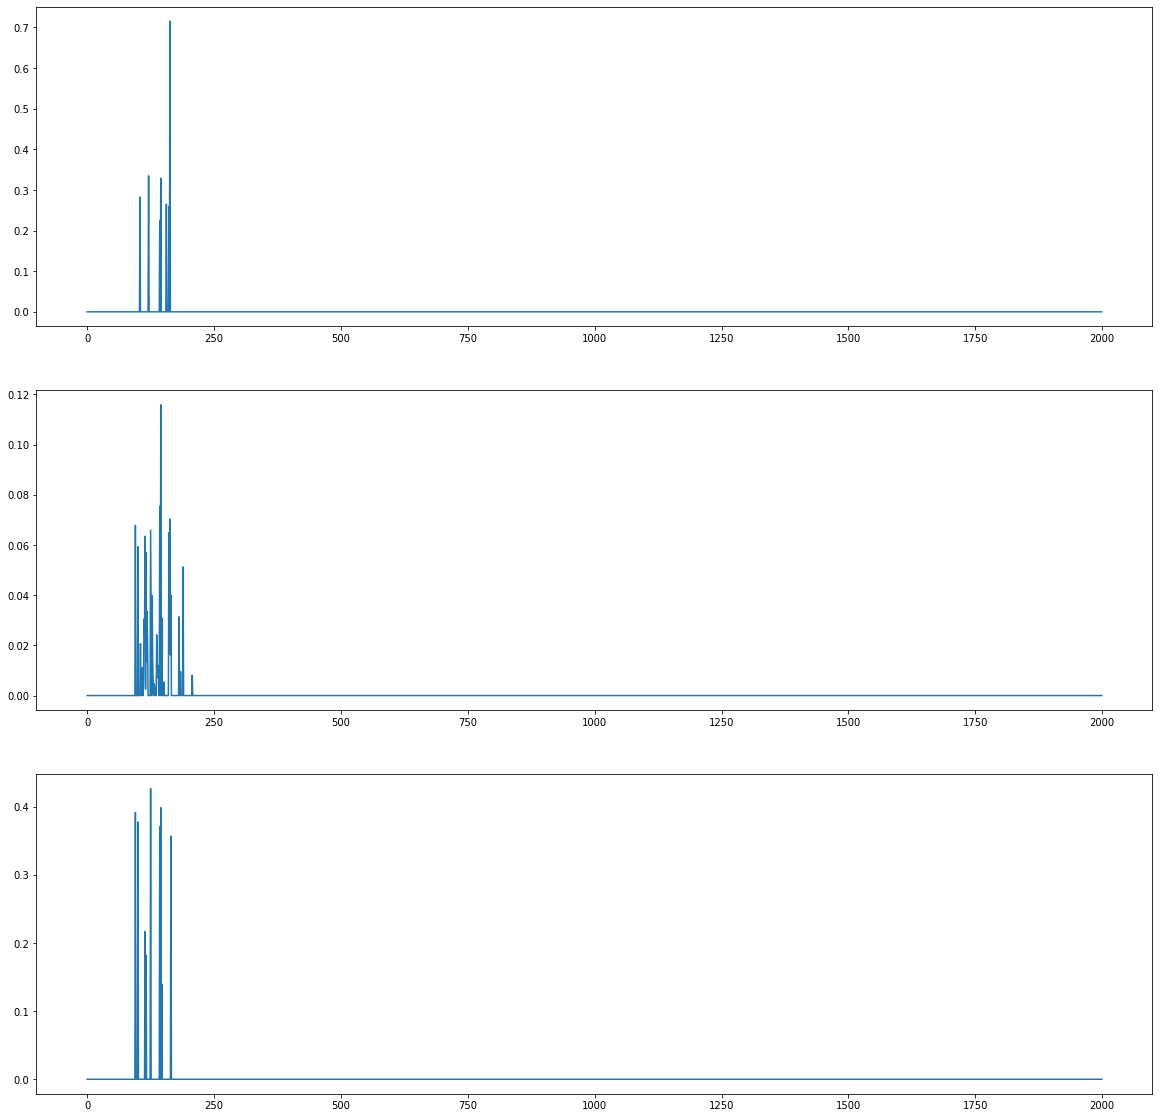

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20,20))
i = 10345
first = X_train[i]
second = predicted[i]
third = y_train[i]
top_max = predicted[i]

axs[0].plot(range(0, 2000), first)
#axs[0].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(first))

axs[1].plot(range(0, 2000), second)
#axs[1].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(second))

axs[2].plot(range(0, 2000), third)
#axs[2].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(third))

In [ ]:
f.close()